#Telco's Customer Data Exploratory Analysis

By Bruno Batista

Analysis of [Telco's](http://telco.com.br/) customer database, with information about the attributes of its customers.

The intention is to predict customers with greater potential to leave the company.

Source: https://www.kaggle.com/bbatista/telco-exploratory-analysis

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('telco.csv')

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Clean and Transform Data!

In [34]:
df.duplicated().sum()

0

In [35]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Nice! The dataset has no duplicates, and no missing values.

We have more than 7000 rows and 21 attributes (columns)

However, some data that should be categorical are saved as number. Let's fix this.

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


***SeniorCitzen***

It's originally 0 = No, 1 = Yes, would like to convert from numeric to object, so it would not do arithmetic operation.

In [37]:
# SeniorCitizen
df['SeniorCitizen'] = df.SeniorCitizen.astype('object')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Done ! Now the SeniorCitizen column, which indicates whether the customer is elderly or not, through a dummy variable (0 and 1), is properly saved as a qualitative variable.

We need to change the column *** TotalCharges *** to numerical as it refers to the total amount of revenue generated by the client. We'll do this using the _to_numeric () _ function of pandas.

The _errors = 'coerce'_ parameter turns the records into which the conversion could not be converted to values ​​of type NaN.

In [39]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [40]:
df['TotalCharges'].sort_values().head(20)

936            
3826           
4380           
753            
5218           
3331           
6754           
6670           
1340           
488            
1082           
105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
Name: TotalCharges, dtype: object

The problem is we have 'blanks' instead of null.

In [41]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The conversion generated 11 null values, we will fill them with the result of multiplying the tenure and MonthlyCharges columns. Since the first represents the number of months that the customer was in the company, and the second indicates the amount paid per month.

In [43]:
df.TotalCharges.isnull().sum()

11

In [44]:
df.TotalCharges.fillna(value = df.tenure *  df.MonthlyCharges, inplace = True)

In [45]:
df.TotalCharges.isnull().sum()

0

Problem solved !

Now that all the variables are ok, we can start exploring the data. Let's try to understand which customers spend more, which ones usually stay longer in the company among other information that may be interesting and lead us to some insights.

Let's start by observing a statistical summary of the numerical variables, which are:

* tenure: Period in months that customers stay in the company
* MonthlyCharge: Value of the monthly payment paid by the customer
* TotalCharges: Total amount paid by the customer

## Exploratory Analysis

In [46]:
df.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


* Half of the clients remain in the company for more than 29 months (just over two years);
* The average amount per month \$65.
* The average total revenue generated per customer is \$2280.


*** Let's look at how the relationships between these variables occur.***

Text(0.5, 1.0, 'Relationship between loyalty months and total revenue')

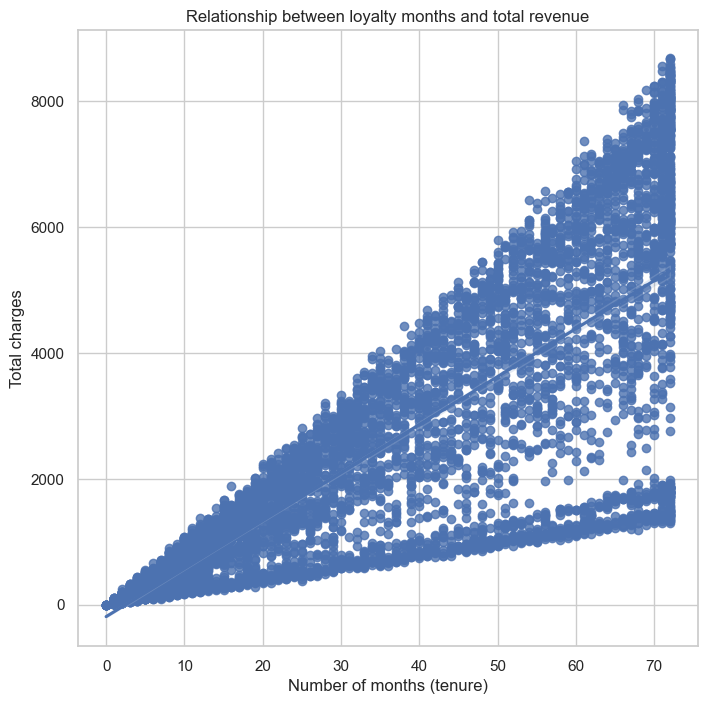

In [47]:
numerics = df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']]

plt.figure(figsize = (8,8))

sns.regplot(x = 'tenure', y = 'TotalCharges', data = numerics)
plt.xlabel('Number of months (tenure)')
plt.ylabel('Total charges')

plt.title('Relationship between loyalty months and total revenue')

Text(0.5, 1.0, 'Relationship between monthly fee and total revenue')

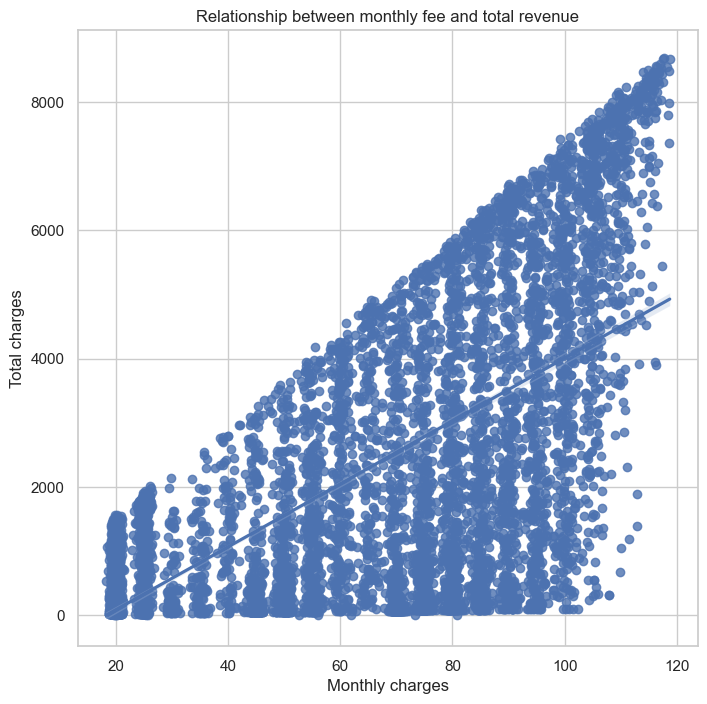

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))


sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = numerics, ax=ax)

ax.set_xlabel('Monthly charges')
ax.set_ylabel('Total charges')

ax.set_title('Relationship between monthly fee and total revenue')

But monthly charges are part of total charges, they should be correlated anyway.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

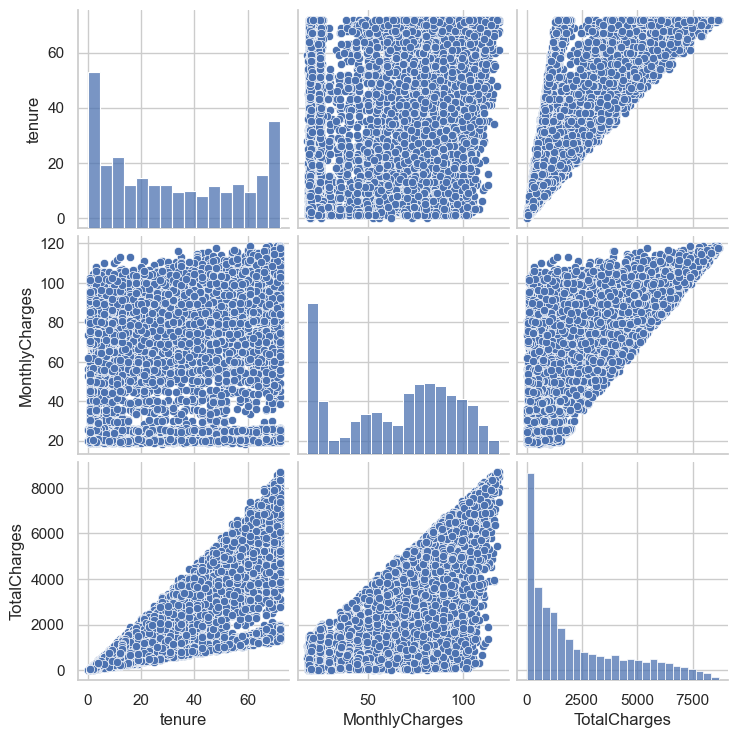

In [49]:
plt.figure(figsize = (15,10))
pp = sns.pairplot(numerics)

Text(0.5, 1.0, 'Box Plot of Total Payments X Months of Loyalty')

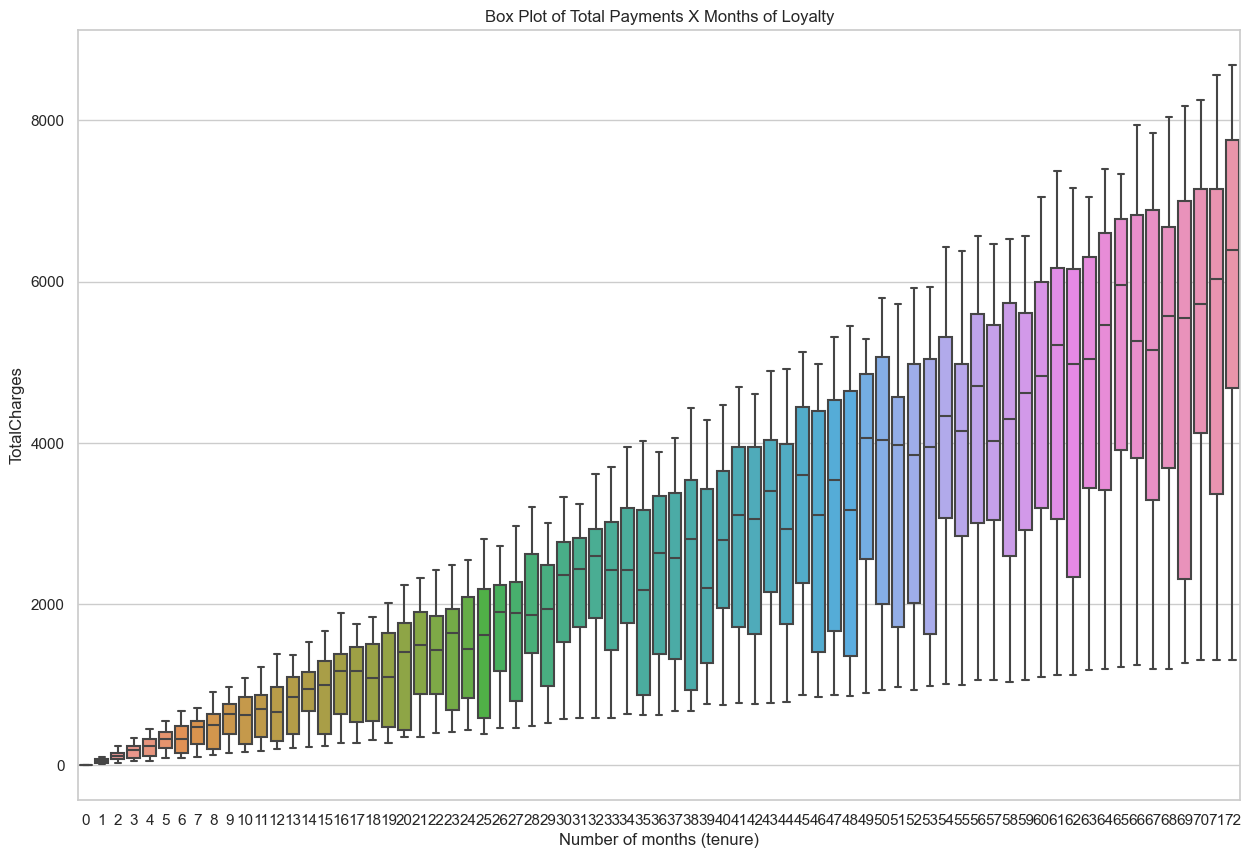

In [50]:
plt.figure(figsize = (15,10))

bp = sns.boxplot(x = 'tenure', y = 'TotalCharges', data = df)

bp.set_xlabel('Number of months (tenure)')

plt.title('Box Plot of Total Payments X Months of Loyalty')

<Axes: xlabel='tenure', ylabel='count'>

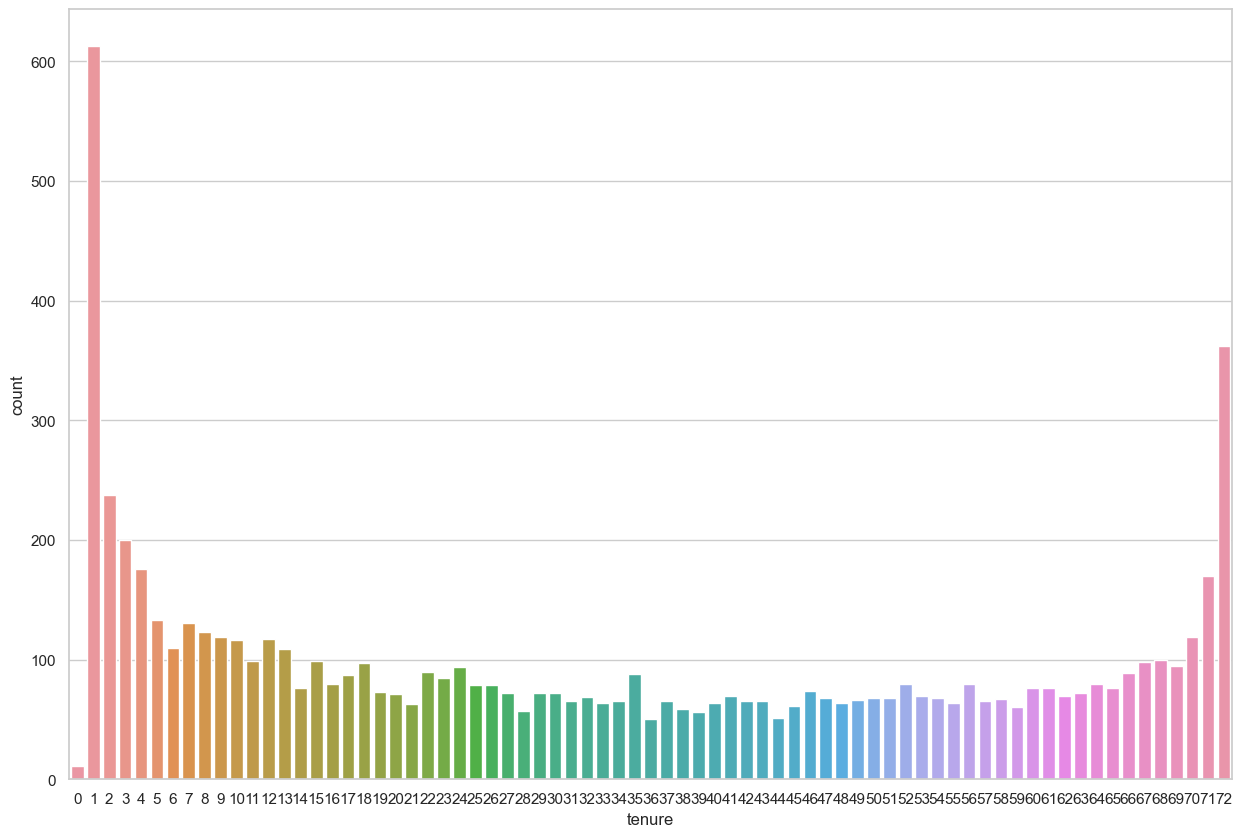

In [51]:
plt.figure(figsize = (15,10))
sns.countplot(x=df['tenure'])

Above we have just explored the relationships between the time of home and the total value of expenses. They are linear as you would expect. That is, the longer the customer stays with us, the greater your total spend.

We also observed the linear relationship between the monthly value and total revenue. Customers with higher monthly value, represent higher revenue.

We observe that there is no relation to the months of the clients, and the increase of the monthly payments. Many clients remain for a long time without switching to new services; in contrast, some already come with more expensive plans.

And through boxplot we have seen that, in general, the dataset does not have outliers.

***Now let's explore the categorical variables. From here, we'll take into account the variable 'Churn' in all our views. This variable indicates whether the customer has left the company or not. Our target variable.***

In [52]:
df.describe(include = 'object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Quickly, in this picture we can already observe:

* Most customers are not Senior;
* The most popular internet service is fiber optics;
* Most customers prefer not to receive printed accounts;
* The most popular form of payment is the electronic payment




### SeniorCitizen

#### Does the age group influence the escape of customers?

In [53]:
pd.crosstab(df.Churn, df.SeniorCitizen,
            margins = True)
# margins - Add row/column margins (subtotals)

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


In [54]:
pd.crosstab(df.Churn, df.SeniorCitizen,
            margins = True, normalize='columns')

SeniorCitizen,0,1,All
Churn,,,
No,0.763938,0.583187,0.73463
Yes,0.236062,0.416813,0.26537


<Axes: xlabel='SeniorCitizen', ylabel='count'>

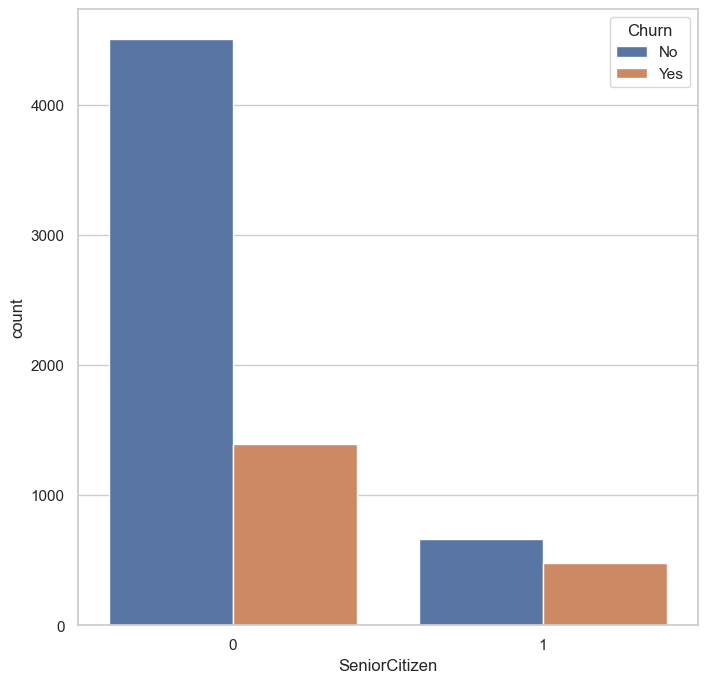

In [55]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')

sns.countplot(x=df.SeniorCitizen, hue = df.Churn )

Proportionally speaking, the volume of older people leaving the company is much higher than the volume of non-elderly.

Does this indicate a dependency relationship? Is it worth considering to investigate this relationship more closely? Or was it mere chance? A chi-square test can help us find out if this assignment is statistically significant.

Just for curiosity, what is the monthly average between young and old?

In [59]:
senior_mean = df.groupby('SeniorCitizen').mean()
senior_mean.round()


TypeError: Could not convert 7590-VHVEG5575-GNVDE3668-QPYBK7795-CFOCW9237-HQITU9305-CDSKC1452-KIOVK6713-OKOMC7892-POOKP6388-TABGU9763-GRSKD7469-LKBCI8091-TTVAX0280-XJGEX5129-JLPIS3655-SNQYZ8191-XWSZG9959-WOFKT4190-MFLUW4183-MYFRB1680-VDCWW1066-JKSGK3638-WEABW6322-HRPFA6865-JZNKO6467-CHFZW8665-UTDHZ5248-YGIJN8773-HHUOZ6827-IEAUQ7310-EGVHZ6234-RAAPL6047-YHPVI6572-ADKRS5380-WJKOV8168-UQWWF8865-TNMNX9489-DEDVP9867-JCZSP4671-VJLCL4080-IIARD3714-NTNFO5948-UJZLF7760-OYPDY7639-LIAYI2954-PIBKO9420-LOJKX8769-KKTPH3957-SQXML5954-BDFSG0434-CSFON1215-FIGMP0526-SXDJP0557-ASKVU5698-BQJOH5122-CYFXA8627-ZYGSZ3410-YOQBQ3170-NMYVV7410-OIEDU2273-QCKXA0731-EBJQB8028-PNXHQ5630-AHZIL6416-JNVRK5590-ZSKRV3887-PBQAO5919-TMRGD8108-UXRQN9191-MYQKX9919-YLNNG0318-ZOPWS4445-ZJNMU4808-YNLEU1862-QRWPE2796-NNUFI3016-KSVCP4767-HZZHQ7233-PAHHL6067-NGCEU9848-JQJTX8637-XJIVR9803-FTJCG0278-YXOOG3212-KXOCR6380-ARCEH3679-XASPY7123-WQUHX3192-NQECA6180-YBIQI6728-DKUCO9750-BOOHV8597-CWYHH2848-YXSMW0486-HECZI4549-ZDQYY5712-AHQNN5256-SKJGO3071-VBYPO9560-BBZXK5299-RULOA8402-OOOHJ9445-ZUEQE1091-SOZGA2928-HLDBA0404-SWRVG6497-TILVL7219-TLZHO4622-YNKIJ6734-PSBAW3930-ZGWVE2876-GZYZC6207-WIOLX8587-XYZSF3091-FYHKI2372-HWUHI7799-LGRDP7850-VWJUU3774-VBNXY6217-KDYWC4080-OGPJL1095-WGNGG2636-SJDOU5716-EZXZN6837-BJYDQ2135-RXIHG6440-DKQGE3466-BYAVD3780-YVMFA3874-EQOEP1679-JRFBR9073-ZZIAY3077-RSNTJ6551-GNYDG9167-APMXZ2749-CTKAJ6371-NZYEG7554-NEWDD8992-VONJD0867-MKZVY4482-EWFMI4648-YPBTM2907-ILJBN6345-FZOQH3376-BMGFE5997-OPVFA1159-WFSGR7654-YWJUF1875-QIVME6727-IOTLZ0691-JVSYA5918-VUKWP1744-JHKYS5947-SGKCL3712-PKXZA6317-YPKDH6582-OIVSP9367-WXLCH5524-KHNJP1918-ZBFQJ1024-GUALD4827-USJHP8167-GJLRN0956-SYCWG8017-UVSZU7100-FQPRV2472-OVKUP2984-RGEYA9680-NIAUV2146-EGVDT2604-IJPDU9178-JHUVJ6168-YBYNP7255-SSFBC3645-DEYGF9323-HGFWY8544-GOQSH3363-DTIVD7018-WBJNK9142-KZXOP7674-YTAFD6348-SNFUS1285-OKIPP7825-ECJRF1347-KTTTA7841-TZDMQ4195-NZGTA7157-SMCFK4709-LKHYG0699-NDKJM9286-BHDQG0230-WEQUW2040-LDIWQ6496-JDSSB9408-SSNVZ4443-EMBNA6469-MRVET0742-MOABM5961-VUSRV6778-JFCMK6341-JVQGF2232-DMLXU4811-JBUVU0945-TSONX2651-ZCBXV3316-UWXUY8937-RDTHP7083-MIOPC1984-GPTEH1251-KRREG0621-JFHOL9903-LYSAB9227-UAQFT7301-ABVAD6614-FHDBO7576-ASEJU0303-UNCIP0322-YINQP0959-WHOKV4075-JFPGR4629-NRXKX3282-ZISZV3675-YDUPJ4111-BNXIF7017-VFHAY6655-LHBYW4959-JOSRX7605-BDWDC1950-KSVVJ0123-CRBRT6292-TOSSS6323-AYBRX7014-ZZXAW7633-MVPUY6366-ZGQGL5940-AHUHD6432-TWQLB4484-GLZOU8645-KWHJO4130-MZLCC0314-TKOSI8229-MYEJZ2080-SRCDE9577-WJVCQ9512-UIBFX6202-DYYFX3808-HFKDE5583-SXDAG3580-REOAC3727-OWVYD2294-SALNE1563-IWQEX8203-XJZRC6556-DBKZF2985-JUUBZ6390-DSAZX0895-LMRSF8266-VBFQL8181-YHCMF2240-HSJQD1248-DYXUB4115-BNPJY4091-TVOCN1098-TDVUQ7277-OZCGZ1557-EMYVT7563-BIUPC5027-YOCXN3973-SKMLN2321-OMBXY6745-JEFZB9880-TDQAC8705-WZCYL7102-JJVTX8626-PTQGE4983-CLMLV9385-EHGDO9498-FIMXL2379-GYFLQ0122-OAHPZ2868-SNELZ4322-RCYMT6680-NENYN2088-IEBAU7982-VCELR1343-EHPYB6885-PKOAM7520-HQWJU9639-BUJXT5924-SNGKP2034-GDRCN8966-SNIZF6243-OZGFH0513-RBGPE5160-UXJED0219-YTZUE4572-DVCGN8984-EYLLL9833-TGFHX9294-TDIPC5229-DTFYB0104-PPXDV5176-LMJXE3583-KRKMD1010-DIAUQ9069-LGEUL7302-ZHMHP9571-EDEBV3520-FJGCV6563-VRERX0259-GBZSH6122-EFVKN2805-EDJPQ6862-CQUMB7156-MXBJE6158-HDPXZ9601-BRXPO2863-IMQDR5686-CMAWK5651-CRHKQ6905-NIQIN5167-ZFFMM6583-SZVGP1708-PBBOA8782-LKFPK5522-JBWMO3597-MVHJT9967-ATRFS2977-CEBSX6599-CEBNN5876-QMYLD2277-AXSDC9442-JTWDL0979-PHULV3067-SVMTC5495-GPSRW7606-BPHHN4742-DRORA4800-VHZKI7989-CHGTL4163-NCJAK5233-AOZUF5973-EJGDP7916-VCCPB4686-GEFRM5249-QYHEX0578-SKVMF2233-FAGXV5605-IYGFG7663-ZTEGJ3935-TBRZZ8111-BKVDS8734-DKSTZ4360-PNRQB6152-ONASV9063-ZGTUY7781-HVGMK2181-UAESM2957-LOLHO6048-NJXHX2320-SLKMB4980-URKXC4376-KFVRS5886-VLQVU3577-AMVUX0771-WLCLA0206-TBWLC2937-FTHUR1910-FMXJM7752-XUSCI4110-PFEUZ0732-OCQOC5168-MSWXT1090-ESELR8592-PLTMQ8847-GEOOQ0256-LTHVJ4785-FCIFB8313-NDOIA5149-CUZUJ0942-KOWSM4237-CLSMM1452-VOQCH4719-UMSIY6614-VBEGU0880-TKATG3811-VBYBZ2996-XAUVF5968-XQIVE8896-RAZCR4640-UHDOS3583-EKAPL1304-BCCFO4104-PVRPS9399-APLBT2359-KMGLI4431-EDMIQ0306-JAELE6227-HWPWX0486-LGCCH0447-BEMNG5168-MQQCA5949-XIKAE7971-HLVXI9094-AZPHK3649-JPUGY4472-LVYGI8372-JUXUI3552-CTCYF6778-YSNIH0388-EOPEX6579-JPICP8205-OTCHB4134-BSXLX0505-SPOOW7783-YKGDV4374-YMUSQ3957-HHLMR7803-XOCCZ5736-YEJAX8981-FJGLA7218-HKQFK4636-QRJKY1135-LMECX8535-SFUTN8677-HDZEE2475-MROZF9412-GHEEC3482-ABPKK7531-GQHME5174-ITUMV0913-XWSCN6825-UYPFK8397-MVTAZ0750-EBAIU3571-DPYUH7601-GNDYK8067-NIOYM1403-GYAFU4234-XTNEA9282-IZGQK5348-CAGXB0621-HJWXJ5844-QVTAT8905-IAZPF5394-MEITZ6859-QNXIQ2782-LFZVW2866-IKBTM1342-JPNKI2817-NTQDO7129-AZJDE6986-IJDHX2560-PPCHE8138-EALND3580-HYCSP1352-HNSAW2075-PUEPR1982-FEBTD5301-GAUUY5791-KAJFD2654-VBVPB1154-HYWWO2501-XWWTZ3716-UVSPD6815-ABQFQ7343-EOBEU3701-SFMUH6103-LIANB7319-VENRZ5846-NEQVZ6967-QIQRV5781-RFZRP0939-YAPAF0308-IVGOK7293-LSCDV5756-JYOJT4710-FDUIZ9548-LIGTA5150-LJNSR8270-RKSAP2640-LYMOV1218-VKFPE3627-FHKBK1423-BMPBQ2393-DIVAI4568-KNYWR8752-IMQOS0742-LAFQK0795-LAFGP0619-OLYUR5512-IDZEI0459-SPZHJ0215-BQKGS9244-ZVAPM0719-SYFRB8208-EUMTE5172-MIGPM1710-RCXUS0374-FIUCA5839-SUYVZ5173-ZXXXL1096-ADRUX2001-MCUUW2731-GJRDG4723-BEGSG6516-NKQBO8672-OAUPW8207-DMRVL6543-CPZMK4765-OXPPD2804-ETQDK7138-GIRSH9396-ZSFLL6464-KEXXH5240-CAOYT4059-IIEBK0516-UXRMT4851-BQDNX5148-HKFIR1009-IRMNA3003-CMDUU5016-IBERQ9931-KGHOA1775-KWJKQ7665-VIGUD9411-TPQQV7207-RMRDB7954-MLBUN2077-DDHJK0195-IESCP9574-BOSMD4580-TMHJU0970-ETWGE8404-VLQFB0887-HJGAR2391-IPLOP9576-ANLXO2024-BASKD5845-BZZIB1140-UKVZG5183-SNMJQ8100-PNJMH7838-LAZFO4464-JCOLN2085-JVGAD5650-VDUDS8095-WANWK3030-ZKIWL9565-FLVCG8755-OGKNA2800-VEQXM7538-GWHML5533-RJFTJ3859-CVCET0214-JHPFW5642-MHDQT3088-FVYWK3276-HDUEG9092-GDZKO2324-AALNO0822-GAVAP5760-IFJOZ2826-UWHIS1448-PWKYE7501-IWUNG4957-TREIR8040-MNRTF1536-HBSWP5313-FPXWG0946-FKYTX5076-YVXCM8262-COGGB6663-JOCQO9620-QJREV2276-YDAVZ2480-JZOSN0078-XZMHT5896-NPFWW8338-QIUNR1525-LNLOJ9450-TRJUU1766-GKNMI6942-LBFDP1456-TWCGB7133-VBDCG7596-ZYWBB3014-WJKSM3347-YJZZE1029-QFBEN7929-DMBCV9661-JALZV5433-KYGHE4312-KFRXN5575-TPIZQ0114-IGABW9944-AEXBM1853-ARAAQ4697-LUPSU8434-VGEQQ4952-YSOGZ1589-AGTLK4950-HKQTE6786-OBWQR2753-JMMCV6439-GTPCA6621-YOBKI1216-JWVUX7564-GHCVB1173-NOEYG7595-EHCDL6647-ZEDXT2521-NPUZR4381-MHQDC6923-JHPMP5138-WVKYJ4018-PPNDW1635-FJFCC6425-JWTDV8405-IGQFX8224-IVVPA9477-LGWQI1410-RSCMR3115-CZMZD0139-IVFJG5730-DBDSI0030-FNXPP2189-WWOEW5684-FJVYR4013-GUXND1894-IGFSG7379-POKDZ1266-NZYUI7969-FFOWG4718-DHSMV5175-WLYXL7817-OMJNA8728-SKJLR3137-NYQQI7706-DZNKK0236-HFWSV3900-AQPHZ5842-POCOP2037-XJFUP8823-RLPWL9505-SQFSW7314-OXENN3758-CKOQL0322-CHQRU5676-CFLYY7521-AFHAB0285-INHLN4678-DVQEO5125-CNDSP4992-LTJNE2202-OUTMO0810-BDHAW0229-LFJAF7131-ZQZNK3442-ZHHCC5726-CVNYA9871-ELEYA4257-GAESD5173-WXOQV2040-OBMLJ6286-ZHAOK3807-XHCJH3009-JWMPU1450-GALXR8859-AXJZP3174-AKMAS3138-BKYAV9926-PJHDQ7382-DFJTU2798-NYLMZ4289-DTDKW1820-TQVEV2239-JALAW4853-RULSV8098-TDCBU3551-GAEGL3196-NVXLZ6275-YDUVO0036-IHMOT0115-TFERT4178-EGMON4220-TINQT5318-YKDPV7975-TZMLR0295-QVKPB4335-BSMJS2311-QYMUQ9146-JRIOX3104-OWCGK5337-IIWKZ9101-BWFSS9650-VBUOG3487-EARAT2672-TGEFF8184-WMOFI6982-SSHFK6092-QZVPP4625-LAMOB0392-BZIUW1038-ZAGBI6549-NNDYT3027-ZTDHO0422-OHQHQ6916-HIJSE2316-ESMLS9778-OGKQZ7408-OFWXJ6007-TCTST2252-NKNSI8713-IGZSO7905-TVXTA7695-PKLCZ2382-BCKQJ8374-UULRV2207-NHRJK3224-DFQNQ5275-PMFUT4795-UXVCJ9777-IQHWP9944-HKVVB4124-MMETB3671-SHRSP0979-MOZQI2732-ISEZX3313-QKNKB0323-XWWTN1937-OTUKY1573-LGXBA1764-VUUMT5073-WXOYN4713-ZBURT3050-GBUSH0207-MDKNV7876-AEHIG7945-HLKEA9342-VNIMQ9851-KIELU3908-BLSYF3199-NPKCN5170-PTRKA4661-NJEUX0048-LUMLS7549-MYGPK5898-IGSLP3804-RVTGV9227-LUNBG7997-EASSD0730-KOAVE8975-SKGRX0678-RLHVP4315-MURBD2267-FPIMA1051-GEJLJ9734-YWGEX2719-BDAQO5285-MVEHD0379-DJQHR5543-QDCRY0297-RBCSG4694-PHWFW0835-JKADZ3865-YIOTT5993-BQHEA6024-RUGGH4079-WWQQQ6103-BOCOU5149-TGWDZ7471-WNSUF8942-DBMHZ4301-VVZKA9199-PWQVC5393-HJZSM9625-QSTYE0862-PRCBS8812-ZRHFP5146-CBVOE0454-OKRCT5787-KXGIY4198-VFOEA5709-LVOEQ6400-BWQKW2692-AQCPF0347-UBKUZ0835-DUUIQ0811-GSDTP7567-ECMCM6115-ZTBFQ6353-BRMMA6680-WKXRZ6231-WFGFH6169-PPETC8584-KMVXD8467-WYNSR0851-DFJKB5382-SOYZL9448-REEVD3261-CQXOL8388-FYNPZ4002-BQWPQ5651-YLPRD4378-BZYFP9117-SHLZX4541-RMRLG7764-BDPEE3429-IFLEM3158-MOERK7294-TMAOP5002-GCQFH0556-FJEGU0604-THJFP2834-JRTUA5875-YPQFJ5879-SESNB6461-PPAXN3318-ISQFQ1106-HRLKZ2483-XSSMZ8603-IJWDN8165-ZJRNM2604-XVDAM3717-OFRTN9046-JBFWA3280-NMUVX1206-EHBDD8361-LBRDI4883-KCPZJ9108-EQPNQ7277-KAMWT3842-IYKUE6641-XRPSU2545-LXYVJ3234-VKACU8357-EQXFO8120-JDCAM8917-FAEMR7047-YXDMZ9524-EGPJC6993-OHLXR8818-XYFCQ0929-HYQEW6614-YOLAC7426-RHZGU4065-JJAVA4695-VADHF3863-IUBJR7649-SIJJF9361-YNQWJ3748-FVMZZ9391-TTOYH1452-XRSJV3422-WJOYD7147-AYBAA6732-FZUGP8436-BJUMM8329-GWVPJ1352-VHKAJ2632-TACXW8146-QQKZH1767-CJKBA6445-TNRXS4581-LNWUM4869-EPIUS9948-YPTDG1915-OAKWD7296-PIXQY4883-QICIH3354-OADJP3524-WQDSG0810-DHDBD4026-SKKHW2829-HYVZP8329-IBCTI3845-JHAMY7013-PSXHK5669-SRAIP5981-ITEMU3486-NPGST6941-PMGEP1624-WOIWJ2074-GKOWZ0376-YMCJC6100-FJZDG1730-VFMWO7143-BQIBA3800-LYTRK0634-SZPQA9646-NMHXE7030-NJVDP5536-RTPWK6166-ILMNY3097-NNSPB7771-ZONAT0655-RBDUG2111-DWYHN4194-WHFCB4121-AGSIN4361-BKAXE0455-XFASS0301-KOBTQ4367-NUYAO9878-TNQGW9170-ARBTB7241-AJHFS4546-FOKWR9036-CSKBW5832-TRLPB8590-YFFQO8659-IOOPU1338-CECEE7439-DKZTW4646-QZXTF4607-CHPCA9742-XOKTS6921-OZMFH9578-FOMUK4712-UYOOI8824-RWFXJ7722-CVFXN8717-VCTXJ7363-QTBIW4159-NAAIX0971-QIFJK9397-TZSHA3391-JSQEW0343-QLUZP9763-PDTKK7627-JKIAZ3312-UUMZW1271-UODNO8461-EFQYM6900-RBKER6891-JPYFF1459-QNFQT1047-NNCBF3696-XRIEN4081-DYXAV0074-HDKDG8791-GFXLZ0927-LCSMG9330-DHBFL0098-BOWSO5859-HZYLF8257-RZAHR3156-QLHBO2208-NQBCT6621-NRZAK0831-JNISG0774-IFUVM9553-DLCLU1641-BYBTK2446-ZKVAF0841-NULXI3522-CDKHF1430-SFQSA0411-EZJZE7851-WZEKY8844-TONUD8807-ARQET8992-CEUEN4320-QMLLA8777-PVYGU8292-ITGYJ6870-ZWMNX0621-CXBKL5334-JLAXU5868-CZJDR9359-UGBTK0135-NMXAP6479-OAUSD7129-ACFOG4189-NAKJS5562-BETPV9127-FHJBZ6270-OMFIW0107-WESLM6994-ORCWG1346-UFHAX3992-YWPKO2933-XEUJM0125-LZQXK4835-YSJMR3164-YAXFY0887-WBJVH4660-IRIBM5673-FSSMF7670-ZBPOQ0080-OROZO3916-NRPAP6807-SIWJI8221-HVAYI1579-KLYDT5232-NXPAY8967-SZQAS0455-ENTCR8944-AILEF5542-NKVRU7126-RBHSD5370-IIVVL6789-HJBWG3927-NLNRY9087-EYCPR6791-YBNAK6358-LYNGM6077-BDPXA0013-MHZWF5494-HECPR8268-YDIXR9824-BEMCV1373-ORVIZ4291-SHSBH6980-IMXXE9866-QEVEE9897-KXHCM0040-HALCW0784-GTUUK7979-CORPM2294-DMMUS0872-JCPIB3055-MJDSB9091-WTUUY1618-CFHME3165-HDOEW6581-NQCBA7115-IRDHS8496-DMZUK2040-VZIKE9068-VPWQQ0178-SZBHO0384-RVBPI1689-MRZQR1299-AURJA4525-VZCZG5835-BEQEU2788-CJQAQ0319-QZTCO2120-SMPEX0096-FCPUF0668-OGMHD5552-ZNFSJ2223-KAGMX9408-HRXRK5593-SUAOO7321-PKUYW2833-SLKDQ6766-HFKLA7595-EUIVN7617-EYGLW2026-TGDHM4030-VPZBD2226-ICFDO5529-GIBVH9992-UJOEL4741-WWJQZ6625-UTXEW6244-BESBM2612-PHGOX2408-TZMJL8480-PPONV8780-IHCRN4598-ZADCK1257-SXUXQ7182-OVLBJ5095-ETBRJ4821-WQOYN4730-AWNAU3452-FLHYD9531-NSBMR6260-ONULR4389-UEFCZ8711-LOBKY8985-OOPOS8800-ZKRFW2616-FLVQC9968-FFVVH7993-PYKOF8390-FESFV3022-BEXHZ5027-XWQHA6248-TKCQV6198-ZFIOJ5989-OMNJE4566-QVRRW1291-CUOCY9795-SHUHB3230-IUALN0042-RLHYP4945-RVMTE0201-OAMXR1866-NXPSP7831-QGOXH6393-WRYZE3941-XTSKM1661-CZBAU6599-RCLCJ9831-BPFRI5158-RIVOP9788-YTFGE9277-JOOMO1907-YLNYW1725-MIMXW8947-YRTDV3161-ONRWK0114-RSRRW4565-NLZBV0031-PVLZI6682-VCIXC4791-QRGMF6475-VHUIZ3910-MRQOY0661-WCQNQ7537-RBWEA4656-CAURT0121-SNYRK4671-LXRDQ3733-LSYCE6265-FRMTQ1934-SJVJK3838-OZURD1371-DWPAZ9269-CQOOL2017-CCBLH7690-KPNCU0536-BGFMZ2293-IJWPS2845-HSJCY5469-NUJUR1184-PJVDB2625-TRCZQ4102-HLENU7266-GSSJX7722-VJRQD7073-QETQY9415-DPEWS5624-RYAMH0196-JTUQI7130-YXBRO9272-LSVYH7943-RQCHR3249-ZPQRG2568-BRGYX3084-DOWLE1084-MNSMJ7721-JXEAW7249-WBIYX6250-CGGUN5478-JJVZK7596-IIWYC9793-WECQC4291-HPAXL8999-YPYBV1839-FBNFR3164-AALRN3071-MVJCD1697-BCSHV0562-KBDVM1131-SUEKT3717-OEAUQ4538-WNTMJ3334-CTHOL4704-ERYFC9432-RUVSL8060-HIWJJ7684-XSZIY9089-UOWJG8039-ACLPL9885-AIBVB1934-MKPXS2592-YKDIF2272-JKMSI0471-LVHGK9518-RWHZL8714-CTZJW3569-EDBPQ3131-NWVFJ7521-YXVZY6240-EURKS2373-NTKOD1970-KKFWL6960-HVYXR9337-SRRNI0895-UADGO5678-VFNEQ5977-CKHON7861-UVUFT1830-GGFNM5302-BDJNT5223-UZAVK4859-ZSRDZ9350-VLHMB3498-LZGQZ8785-CJSHH3870-SPZSI0680-DFNNY7560-QRBXH7077-XJMET7767-UXAGJ4652-ODEVH6510-UPNKS6718-BDGHG9046-DQMTP6439-LAJXL1571-SAVHK9546-CQJSU1666-JZPZT5777-KJIRB7677-SJJJK3253-HKOKL7055-HNEOJ5514-YQENT3211-AAPKX8445-DNBAE2951-QOQTK2958-NHPPS1735-XMJVH6890-PFRQX5899-OUVKV8681-ICONS1621-YNCJH3473-XIIIT6362-QHAFM7893-IXHRQ3070-BDOQC2952-QAYZF6234-PFPXL9824-QCJPK4763-PGDPO4283-IVYCI1866-OBPNR8205-MQUGY8970-ANWXO9480-BQJEI5394-SVGJV6979-TNDEU9777-WJJPR9283-LZQOH7079-QRCBC9495-SKLKD5067-DGXLL5469-CTCWN9851-QXEEQ6281-FKEWS8898-KASCD9242-TKFSV0743-HNPFG5208-HFSBT5035-PGZXH8695-WDYEA6543-JXSOO8605-ITULD6416-YJTTB2667-WYLWJ4472-VESGY3195-TQDZX3128-YOVTD7041-TXQJH5014-GSOUQ5724-BIDBU1769-GRUIK8819-WFGGJ7427-AUFPY1092-GANHU7898-PDWQE9972-EWRJS9314-IJWSQ5799-JRCZO1921-KYSAY6198-RTPMF2924-KHUVI1925-GMVBW7881-EVUAD6184-DYUOB9207-ZPANB5766-XQXMQ9327-QSDED1656-DRSMG3012-VFFMN2984-AFWNC0640-YJTPY8096-LOIST9764-REAFF3703-VAVCL7107-UBYKY4881-GQJTW8519-QJGJD7876-DNYAP2882-WDTBA2091-GPPIQ6326-MTTXK5071-FBJFS2796-UUZZO2429-AYKKO9798-OPFEM0330-IVZHA3794-NFNCH5193-QLVZB7114-AEOZE2886-KEFUM5522-NYKPB4237-RLAQD6518-KZXCB2245-ADZFJ7776-QGYJC9313-QOLTZ9651-GTSAQ3186-BAXNB4672-FOTSD0637-YLETY9818-XQCUV7338-ERIVA1157-BQCUW8259-NFJTV6968-GMKPR4751-ERMAN1436-ZMJAN0799-DDIHE3070-FNFZQ2812-SFXMJ5014-WUQMG5312-TSZVC2003-CKLOR9254-RBFON1205-WNWPJ2782-JEEBU5127-BZENZ2720-FVBQP4522-XRWWI3766-EJLFL5939-SXWHM7643-RCHXS8246-SHFGA8387-MOJJT0620-XEFWH6485-QXWWE7321-VGNKU5327-CNLUQ7552-KEYGT5816-JMLGY2927-QRRQV6032-KRXXO7459-RRWQZ6265-SXWBU7941-RCJOW2387-KDZQY3584-WKTTW3399-BMLVW1971-DTCZB3092-IGHWF3374-PZLXD3813-DHBBB2812-REYAT6518-PPLMZ4939-KYYPY5930-GBIWP6022-KOUQO6352-TWCAU2361-UPSND6035-RIIOM2929-QNSRW1262-OPMFY9504-DSHWM5035-BVCXS3533-UVMOM1899-VXWXM1478-VPOAD9995-HOTOH2988-PLAHS1371-OJCEK4999-IEZLT8883-ANODQ2351-RRBUE5980-BDHPY1498-DQNRX9469-WEJBT3331-HQDTW2581-VKIRT5442-XSDCW2851-MMUTZ3049-NDXFL3307-TLCUD6625-FLENO2967-MXRAV7963-GQRMY8189-HBVRW4163-KIUHY1228-FZFRV3500-NSDOA1171-TYKUR2058-DCJBE5364-XYIRR4829-AUOAX1219-NNDDO8388-DMKAE4403-BWPAY9659-QEQSY5405-ZMYXQ1442-OKRJE4737-AQCPU9158-VCTQB2808-CHTDM6311-UEUME0793-TWELN3283-WCWXT5451-MHQOF4836-WNFNO9225-BZLNZ0354-VXMJC4422-QVIJA6839-ITVZJ8332-OSJDW4735-BJKOU0274-JKUJR5740-YHGTW8917-SZTTJ1696-MZVAU7359-WWYJV0375-HVGXO4906-ZHGPK8593-WHYHV3795-GWTRD1298-PHBTI6223-DHJGV6961-MJKBO6097-EQISJ4423-YLHDV8158-WPEZG0107-YHINA0727-BNRLG8640-SDGKB6435-SRWBJ9964-WBQDJ6303-KFWSL1702-CCFNJ8932-CZHRQ0386-CWRGM5515-RUGKN0404-AHASP7279-NMVJC2081-VEYEH4116-TZAQJ9060-HJJRW2587-YNLES7398-SKNQZ1958-RNRKS5136-RGMZO8345-MVDYC8226-BXGES3877-JRJIP1015-OWJKI7511-YMXVQ2040-XBAVJ7551-JOHTI8887-IPQNC8646-JCOMS9804-ICWBG1222-KJNZD0106-GHRQR5318-IXUZF3768-VHXQO8952-WCVCD2418-TPEUN3963-RYFNS3198-VELRD8540-ZQGEA4137-JOPHL9436-ZBZCT7801-CEDNV3658-QQJYD1803-BGNBD6950-TWMYB5848-FHRFC2243-FNMMI2511-MORQY5356-KZCKT9470-XCCEM6519-CFDBX3902-MIVLE0409-WTMPL8763-KIAFH3669-WHAFY3055-VTCGS3144-KMTWZ7198-GLXTC2007-QVGAW5207-PLSTK2155-AMQRX6181-AXXYF5091-HFAZW0516-VRYBW8380-PEFPE5687-DKDTV1568-LJSZU7530-HDYDS7416-CKTEP2586-CWXVV3096-IZETN2348-KCJLT8401-EMUWF4193-IBKSW5377-NDTOU5922-ABDVO2474-LCNUE0839-QNXME3506-OVLKD9172-ANCRX6650-VJONK2178-PMGCJ7492-TAFJD2773-MADBQ6016-LVTJQ7860-KSUGX8966-KZXXA6910-HADCM4816-LXZYW5149-QYTTU2085-BOJKI0817-HSUSE5442-PPTJY1927-QEWMY1663-MHLHE4450-MDZFX6701-DHKWQ7554-AKDQF4911-BANWH8496-EJAUI0794-YVSGE5423-BHIXO6908-VVYHM2959-EEXWB1839-UMACK3030-YDNRM7321-KKSDU8286-AFUYI8356-WUAOJ6365-MTGZX1349-WXNGG9350-ZXYJC6990-YNRIO8958-JPTRR6959-GQEGV3173-WSSUE1265-HVPZB4115-UMJFQ7369-TRPFD1098-KFQEC7190-XHTWJ0621-TWIEM2485-ITVKB3669-OYSJI1612-EOHDH5296-BFCYD9359-JANWS7517-SAWMO4143-HHPMK3279-DYZQM7054-LGEQW9575-IWCAZ7940-UQQUG0923-PNFUB3961-SXAXY7010-BRBUU3566-HJGPK3062-ICYZQ9938-PRCVK0973-KYVNF5129-HHMZC9637-CDTKZ3946-JEWRQ7873-CVMAW0463-WZZKO3494-JCHRQ6474-FVJLC4524-QCSSM5832-EXGTT2039-JONDJ7217-JYHOQ6695-FRVEC4547-LYTDD9894-QMIMJ8069-YQQAJ6770-XUAGN3466-WAESX9281-PKKZE3638-VBZTA7459-IMVYU8563-OYMQY0754-EEBDC5777-ZPQNC1951-IEYXM3318-NMQXL3143-ILDAL1022-RKXDR2361-FJWNO2272-UOINI8232-UTFOZ3750-YHRYO6637-KYRCV5668-MEISB0129-QMPDR7188-CBBBA5356-CSVSQ3221-CJMSG4720-VSTSI2801-NISEI3946-MHCZW4623-ZKHLY6732-VAILE8201-AAXCB7696-CFTAT2123-VSCOT6651-AZVTJ4566-GOLUK2484-DGXPZ2018-QKYGT2792-VPPET7409-JURKQ3247-MHJKM1964-SVLEA4587-NUKOX7297-DVYGA2239-CGBUZ0854-UYHZD7243-LCGGZ8267-KFGYD4890-VMUAV9261-WDCAF3764-MNMOI7442-YGZFK0420-BWTPW8229-BUJHX7449-HVPIV5504-WSIUR8183-ONMXC8466-PZBLH9614-RMGHA8735-IJJEG0564-MUUQK5054-IEXZT5834-ASPWA0701-RFGFI0019-EFAEP5619-PTMIK3737-XBQDD5882-CMAZQ5846-QFDFI4445-KWOKW3511-APPBJ7967-HYCDE2430-RRYUW3948-XHGNA0565-IYCGT5447-WZAFP5110-CHOPY5445-UTODQ4425-OWHWB7892-QVYKW9675-ICXCT1024-VRZHF4703-MQYKT0602-DDUML2208-MPXIO1960-UYCNN0348-SDKOL3190-FZATL7336-RLLRH4373-MAVJG8901-HJXTF7710-JSYOA5419-KLXBN9885-MFVSU0607-MVMGC3365-SAIGS9828-AOQLM8022-BECSI9993-LHIEB0266-CLZKZ7615-ESMYF3858-VOBET3977-QCRSL0017-DINOC1447-PJGGA8565-CLBZW9139-WQQDY0224-HJAPT8086-OVPWV9430-FRQOC7639-OPLNG3074-GQWYX1492-QGCLU6845-RGTYS7328-OWMOM4418-LZMSV5155-AZQPB8861-HGGKB1087-GRUYI7065-YUNRY7694-VLBWQ2546-KZAAT0181-RITDD5989-PGKJB8272-ONJLV1488-PBLJN3778-FOAQW4452-ROHMO6481-OGDOO3090-LETTY5349-AZPEW3753-TSEMP8305-VHZBZ9720-JJJOR8100-HZZLJ9172-JITSM6298-QDFNH7398-HPYZQ3546-GHEAE2550-QHZGP7519-JTWQH2538-OIMXF8543-MSDMF1170-SASML4872-JCVCA5346-BZCHP2038-LLMLM6173-ITPWD9734-UYXQI1216-BGTSP4138-NAXED2189-UXTKY0744-BIKKF7483-IQWIB5248-KWLAR4958-GZWIY7996-MHXLW7833-PKIHD7061-OVMIM5153-RTHKF1852-QSWCD9079-LWTFD6356-ELRKD8624-GIOUT3392-EHMNK5986-WWXDV3061-BCKYI7228-PAQPD3177-LASXD7746-QYVCO5804-HYIEZ5934-TSSAU3486-KHMLI4897-QSUYC1084-UQCHV2955-BJZHG3806-DXQOM6784-XYJAE3933-DQPWX6661-EIPZC8957-THMOA2251-PYLPB5555-RNPGT1057-FOGLZ9300-RENDD0761-AETCS8087-LGYHQ4137-BTIKL2190-BCXEC6227-FBDXH2153-MREFK2911-WDXMV3106-ULWFW0925-VYDLG4547-FZJWE7422-WNBTY0842-IWYCP3521-HTQTV3744-ZBHON3373-DIUUN8383-SGHJU7607-QKKTJ7707-PYBBH8984-HPEMB4349-GFQHK4139-DETXS9779-DPNEJ9805-FILKB5793-YOLJN0673-IGUQO4123-FCVCB8819-IMISP7802-EFKNY8311-UEUAB5858-EAFCZ8035-BUYVG1163-ONYEY9787-XVQIU8945-MUQUF5656-MJEFC6082-OQFBA8974-OVACP4010-YLMVT1379-FRVEB8612-GXIDD6288-CHQJB8160-HOWOX3023-GFLBR6648-INWPS4223-BKEOR1763-WQFUK1391-UBDAR8894-JVDCV2023-VQFDL1345-GKDZZ2014-MKGMH5628-FCGYG2560-WBWXF0248-IPDFW7978-DKUQH4335-UPJSI0524-IAVZO2737-YNGYW1784-EZDKJ9297-FVVDH8007-YYPWD7101-HRBLJ5159-YFPKQ6635-CPNUN5453-YBTWV5039-LZRQT6418-PIQSP8220-OCUFY3995-WFCSM1895-QTKDO2038-OEQZH1178-PZGAB7927-AUXBZ2626-VEEWG1657-DYMBM7311-MQJCH1136-XGEQU2530-FMFXO6844-DZKRF7619-ODSGN5970-GHJAW8879-XUAHX3689-MOZGR4195-PNGZS5003-XZWWO6922-NCEDI2514-GINMM9891-NQDBD6131-IUNXN8548-AWOFC9798-DRYDS8532-UEFWH6296-DDOOR7951-VRDVK4815-YOSUK2659-VXMWZ4285-GYRQC4365-MSDYN7036-TYDEC5802-ADBRC8076-FEZKJ5197-YPYBZ8337-MSSXB4312-GVYNH0839-JTCUD5494-WOZRZ2234-EOFPT8619-IJNDK8378-LKJAF8182-BJDSI1153-GNOLC3298-QEICA0788-DXBFY3496-LFSZU5242-UOWHD2482-CZGBB6479-SZPLM8097-VBQTZ4500-HKANN9917-KWRBE2212-LYASK1393-IMKZG8069-RHUXK2908-WGAXL3378-AJRAO0866-QLSIR6050-FFXES7181-BQYBV0362-RAOQO9554-DFKIC5527-ACHSO0829-DDVLK1399-UBQIU1813-JLKWR9537-VHDTA4957-TIALW2054-PJOCK9150-HEPMB9030-QGZNL6204-IEUXJ3126-WQMGH4529-CKBCL2506-CLAKW7176-WRTNX1583-IHQZE9239-GZHZE7205-BAIAD0151-ONTOV8064-RAVOH0219-QAERP0320-JDNQG7180-PISOG3571-RFHAR9578-VRMNM6140-QNRQQ8963-JLGJT4307-KTUMW2135-DQWAQ4056-QHXHZ7470-MCQTK7488-MXJIV7401-JIXNM9339-FIIJL2027-FECZV2672-DZUOY3870-MQAMG6670-MFRPK6177-PEVRA4800-CZMPC4813-HQMGZ7579-KKLOE7377-DMMRI8402-EIVQS4947-DSMXK7245-NIIWQ0002-ORFBO3324-OIRTO5414-OFQCB4967-WPNCF8499-BRXTD9154-QDGTH8197-BFWVU2577-GVSIL9367-OIUXP6770-UAYGJ6463-HHXJR7928-VJYAB1187-WILMM1306-RPWXZ8949-JTMAY3097-PYWXL2266-SJNAT2972-YDYUW1104-FEJAM2809-ILCYT5499-ECUTN4981-FLTMF3113-IWHLC3211-ILJTT4277-BWBML0234-TEVTT4304-TSPVK1552-AAGRX2637-FKFSY7874-ECPQJ0020-INWCK7089-RKVSZ2683-JXWQQ9548-ZMVTX8739-XNIKG9755-JHNMN3981-QSVQI2789-HQBOU9424-CMPOG5067-WJEUN3450-WXOAT9251-WNSOD6974-DAFLI2616-UUTFK7064-JHXCE5103-MHMHY7989-AWGEH4373-VVHQL4559-UWIHT0235-KGSLC6650-BWFRT9570-KYEUA6993-YGFJV2712-SYWAY0730-BGQGF5498-IBWPI9101-NTIXF9314-QDMDW9308-ANMVE2884-GBPFB3413-DHLPB7649-PHJVR6114-TCFID3787-TRIAL5156-UMKOW1247-QBVSH6734-GMPVK9822-OAOVB6161-ERDGD1226-JZNKR7318-EIVKO3771-PZOBW5136-KCKGI8231-BSWXX3722-WPXTK7389-KBFIT7176-WIONM5141-ZUVBH7623-HKYRK0310-SUCIN5197-PYEPU2929-ERCFZ7548-SEPYI8835-VSDSE6619-RPLQZ3275-RHRNE3503-TYDAY6901-GOGZG1623-NLDOT7021-XSNYE9621-OUPYD8982-NHAVY4307-KWMXE2450-ZKEED3694-DELSO3893-JRNFS1133-KXCGE5236-PERKL0142-GVYSN1049-FYSYG7854-FOKSF2519-FAKOD1821-BUCWY8314-DPQHL1465-WCZVT9481-SFCQY0567-GGCAC7089-IVVAZ8884-MRNSU2171-UDMFD9802-CAQUT0187-WZNAB9492-TOKRI1475-VWVDO1357-MVDOZ7602-MVRMB3325-FUYCG5406-KGRMX8481-YYXWG5968-HYJRZ7140-ADSMJ2230-XTUWL7706-YLMQA2585-KTFRE7994-UYIVZ2609-IAICY1740-CSDJP7717-BICXI6559-RAKOZ2636-OHFMN4716-MRVEN2143-LJULT1323-OOEPC3200-MNQTF6164-HXUGH5630-IXDXV0320-DWVTU9135-MGVPY1212-GLHMD7878-JGDKK1088-AUUZZ9588-OZDMQ6476-EPYZR9921-ZVRHG1174-FGIFN6620-HVDUJ4701-MLJPN1032-MAELW7641-TQFHN1552-TKMXS9206-GVPEQ8622-ZLFKO1596-BBVTG6188-UXBBR2333-KWEWW5702-SKUOB1134-YWTYF6061-GWWAV0679-TDGAK6585-WCEWR9067-YGSCA9067-SQTNS8433-WXGNA1776-SPBWV9668-PUGNU9405-GPBBG1926-QUZNN3707-GNWHM5829-NVSQN9565-AXSMR8869-LIHMK0447-RXSGD4927-WWOOZ5788-YPOEG0661-KBKPA9081-WWXKP0784-ZQJZX3133-PZNSR5766-ZJYBB8931-GJJIQ4277-PVRAN0722-SVSFK3612-YVGSJ5397-NSKQG8565-HBFNN0203-HHYIJ8670-ERCJH7758-UJWYS2050-ONYDQ7055-JCGNI0739-UUAJR4826-DXMUP0952-KMEEH7285-KLOTR0654-PQKDW7175-NTIXE7963-SHNDT0188-GWFLE8129-GMVGI2882-DDZPG3547-LQRIK5843-TTHGI1849-RJYIG8868-GAGIO4061-UKJWL5380-XPJNZ8263-QMNTJ8178-EYZUO3230-JCNZS0277-ORXQS3230-WYKIR7996-BPXHY3227-WLKLI0407-BDJKB2266-FUBDZ8237-ULIXL9600-UDOPK8216-AZUUZ9153-BTBVV4074-SJFFA5186-PEIZU1074-AMIOH4910-GMJOT4361-FEBGN0380-ZCSBI7145-FEJWU3969-JQABI9624-EGDEQ1051-EQPZR5849-ASHZJ5780-INQIK8384-FZBJK3750-RNQKR0962-CQPWQ3096-YXENJ1265-BCFEO5837-LXSDN5945-AZYHT8325-QRPZR6384-VMJHP2262-SLNVK7730-CLDSV1135-HIORI0164-APGRB6481-ESCNL1790-NESIO1550-EENBN4323-SADQS4446-BZKHU5202-IVJNU5976-JCJRH8198-RKSZG0137-OCGAB3351-NQLDI9297-EONCV7593-JNWRU4588-YBNIB1069-QJOEE7799-DSEWS8766-PAFNE3130-ICDUP0820-FNRNX0880-FVFWF4611-ANLQC4213-HKBJO2792-LSHWX5028-GZLDO0014-BMAQU9018-PCIOK4837-QUSFT6877-TJMBR9953-ZMKSM7665-NKLAV6769-DCQLI2433-KMEAS4391-LNRXK2195-ZRVAX3550-SAHFP2011-TRQYE8562-GHPPI5893-PYOLZ4986-MXSFP6131-FOYAS3027-YNWZU5609-IMCGG4873-ILOLJ4727-MCYZG9481-WHGWY2725-KXXWT9565-DJPIB4328-VUFWD3301-LSLWQ7473-ZBDSN3166-PNEOF5639-NTUPK8780-YRMTT8348-HFYIV5140-FOMCQ6242-SGYTS8414-OOEEL8454-AATJP6849-WLEYG4659-NZRUF4531-AUZNK4191-XOVOM2150-OEGBV8429-XIBUM4878-BUNFV1872-EBWSC2608-BHKFN7026-YMSBE7341-LXCAF6997-UVGOX9674-EHPPG9462-MJUAW8128-YVJRG5440-VHLUL5781-BKHOP5213-TWWJU1569-TTNYJ7629-WIXZF5445-GLVOT3976-HXHCE2466-NEJOJ0254-KCJGT5472-CVMDX6461-SZMCV8150-QUDFX2346-DJQTB1697-LYYYX1942-OQFRW4749-VFKVB9640-ZSLDC4231-LZUYM7598-UAASY7938-OUHIO3594-BDSOA0431-APWVY5133-VRSAB5996-DAOQL6838-YAUVY0484-JPBRU7883-ROJOC0244-LGNFY7274-CGTOD3426-NIYYL4635-EJYPD1866-ZSLJM4636-TVXVG4236-UJPWO9392-XBGTD3387-VATUS6402-SSEJG1143-NMNQJ1169-SAOCL1110-KYLGQ9929-PLVPA3518-PZXZQ2371-JUNGC5074-FBGHB2351-BKRZW4455-BFSPD0415-MOSGF3948-KXDUF2323-ARSVR0815-MFZGM5480-XTFFL8295-FHIVV2495-INZWQ9086-YJYXS1179-INLAT7909-FIOIY4139-SUGLD6857-VWJDT6351-SCJKT5468-BPMMO5624-BQSSA0197-PNKNK2439-QKJUL1194-SPVSP9534-NSXEM8929-KSWIH2250-IVBWA1810-MVMAI9506-UXUSK1229-RCALF3572-UOLYZ1429-UYJSV5577-OTWWW6100-QQHEB6366-XIVKZ3470-OBUET2770-NSVDG9375-MHRRS4860-YZGZM6599-GZWCM2691-NZETQ4404-HIBDJ7037-MTYVW4760-THGOT7295-JOMMD4016-BJKTZ6584-VQMYT9838-BFCQT2790-XUYMV0581-MDMPW5013-SBUIH1023-BQXZE9163-GHAYE3904-UKFRE5353-WILCI0058-EVZWM6023-YEBUP7209-JCUDS7009-PCARS0519-DRGTI1017-FBQMM1985-MBRYP6158-DWPZT9372-TXXPS3259-QMXUN1015-JPFYW6645-MXQJT5804-JMYIO3763-GCZHZ6484-LATFU7599-NTMDP0772-GYEQQ0536-ACXIP0936-NQLJU4831-EOBFE1575-KRZZE3251-YMVWZ9170-GYZJC4884-LEVMQ8857-CUPFQ7610-TVOPG3638-DIMPH1845-ZLLIG8559-WNQZS1699-UOTXU0635-WKOLD5993-JSUWV4518-FZBSX6988-CJEYV2002-MZHWP3097-FQTVJ5465-BUBFA7299-GNVPL9743-DQKQW1215-VFYVK9371-BITHB9093-FPDLG0541-FITGH6985-HAYWX7508-KBIMB6838-HVLXG1897-OKVMW5485-ITNPC0233-FTHAV4644-PIZRT8922-NPKBJ2740-TVLFN7771-CFQRQ9512-PHSMG2004-OCQXK5027-QPKTE4146-SVFUD1564-HJUVY3617-XLSGQ7517-LDMPS7244-KXYZN5226-NOZFC2672-HUYVI1400-WIVLL7508-MYBOG8148-NLEGT0148-DCDOS8347-GDTMP9992-RRAMN6746-WAUWT0310-MVLET0428-IKYCP2187-PKZAY4003-OCTMP6652-YFFJO7225-IILWY3170-GWYKC5696-QURRL9830-ECLEN0495-RVCBF2668-TZSPS7854-EDSSA8869-TORSS7446-SFAOA9522-ZSINC8234-GSZYK6505-OZNPG6164-HAQTX7765-LWVVH0953-LGOVU2115-BFTIW4692-NNQRU7742-MYPGI0611-DFXKO7780-OTDSO9619-GSATL5622-UEJFI9747-DDZOS6203-HBZPA0484-FFVBJ0301-FIDRB4139-JPIAM2181-TIDSV1936-CZAKF9453-PATOS0564-JJHGS3348-CFRNX4402-FTBXC1428-GTBJJ2931-XIQBR0106-UGRDO5542-TBBWB1930-QPBVZ2606-PKWJB5322-ZSMZY5220-AGAAX0208-BPQEJ9435-JMLSX3352-ALMCK5312-IRCFR5294-IMHHT6176-YJWAS5310-NOOVA4526-EXKKN5311-IHLEI3987-KQDDU3404-JNXAX5131-PONJI3489-VSFRD3345-JHUEO5815-HGGHV5260-UMPWX2249-YPRNG7410-YTJIK4626-GYCZP5649-RXQTV2674-MIAHT2576-HXMPA7587-AOVVU5590-BYNII6898-MDLZW3237-AJGEH4707-YNOQA9357-UJRUN1591-NFNLQ7663-CUXZB0258-NOKBL1163-VIPRI9348-ROUAI9443-JUBUO0596-BQCEQ1481-ZUWZA3043-TYBNO4830-FAXFM5906-BFOZT2960-NKRSO5598-IKHQQ0397-ZXWQF5266-PFRQK4674-HGNUA6765-MBQNU9786-IJYDL1303-SRDOK3769-MHZNV6295-OSINB3308-MHOOC2309-OSFEU4177-JPDFU2239-CFOUJ8046-DNVTL2209-XADXF6620-JDYNW4770-UEZOX1038-RQOST7613-LLQFO4568-TTZRT9513-DXHDA2640-PMGFL3801-HMYNL8084-OIVBS8896-BQTTI3352-RICWQ2160-GPFXD2065-MMKGR1498-NHTLT4484-CGXFK1402-PTHGN6214-EDAKZ5199-FPUSP6377-KSLXC1796-JANOW0238-WHBIQ8735-NBLWT6651-RLGGM6127-ISGTU1614-JBEBI8740-XLHDR1208-DNHLN1761-AEZZR5696-EXCYS5795-KTGUD7120-RFMVS4702-HDRKD8512-WIWYV7317-GGVPB1406-PUQVY1322-AGOQM5692-FPTAH9114-AAFQH8715-KKTFG1550-LOAHA1728-BQDMA0268-QKIWO0876-WDUUZ5117-ZSMHQ5151-HQRDG0960-HUWBM6465-GSRCL0617-FHSGK0263-FJTQO7319-ZNRTR2858-MOFSQ7503-EPSZW7089-XXAYG1666-JXLKU7855-DIWPO5133-POWUA5652-MSDEY7005-CCBKV1810-BOHSY1784-BXEFA7351-MHQVU9224-VTYID9500-IWPXQ5762-TJXGK4504-YOULA5569-IDSEY4250-FDVOU7284-ZZLOH2141-RRYGO1777-JYQPJ6376-GAHQE3401-URHDA1599-EAHXY8631-XVRZL5052-PNLOS3853-LYGAM6979-ZNSFF5751-USDBL5680-LQOGP2386-LAHRK8189-DUKMV6032-IGALN9931-DCEZH1898-JSNDC0315-LVCRK3911-RSNHI2410-CIYFZ5505-OVWQW7271-AJDTL1867-TJHTS0516-WJVXC4429-WYGFR2817-LVCPP5038-ETMLM5056-FIMPT4521-WFJAI6569-KTMDU8809-RIHDD8809-XKHMD0396-YCHWO0867-LDTTC4822-NGOCH2122-SZZZD3148-AOIQT6692-YQHXC3889-VWBID5222-JCXZT9754-CLVZW1432-FPAXX2739-CCZMB7080-TNUWP0496-AHOOK2468-SJFLM3181-VTHOE7168-HDQHG3884-HCSWG4567-AKPIA5077-DXTCG1142-WACZW7901-HXJVA4892-VLANZ5924-IFQTT7968-QUXNS2919-HBCJO4236-XPXAV8903-WMRNW2452-SNHFZ3629-WEAAM6029-CSMJE7993-NQLJE9909-DFRJA9099-FTUHS4962-CHQPW9467-ROOLM3030-YZADT7410-KTVFV2253-KPMNB1345-ZUKID6429-SHBCB2603-HVKCG1834-WULEG9097-ZUBYC5148-ORICT4893-GYUJU4578-PHJYZ7272-QDCKA8908-SLFCJ8393-DLHGA9766-HGEDE6968-MHOMU5044-XDPYX1814-WFGVS2834-SPCJV3721-WKIIL6734-CKRSM1265-ZFOSD6568-POCUI5197-LQXXH3457-PQBYH7682-AZNDK0587-DMGBH5384-ZTTWP3745-HRPHI1231-YNDEK1407-DIGZV0570-BFQHT4393-OBCRR3523-QRQLL8564-LDKFL3696-DFHHB0895-DQHEW4717-GHADL5501-TVMGM5879-HMFFH6772-WFQRD3810-DVDQQ6972-SNKKW3694-GLTJM8550-XSXUQ8149-RSOUN9055-MOJJJ4359-INNWN0585-EGDDA4032-RMHCI3481-JHUZH7250-EQKIY3594-IVHJZ6869-FGJJC3896-ZVNET8205-VSLRB5960-MVTUK6817-WTYHE3082-VQXNH4013-UBXWQ4931-TRZWN0750-EKNGL7669-LCRSD3567-PQTSO5519-NPHVG8043-PNYSD9938-EKRGF2703-AMTUL8173-RXAYP4825-XJGDM5402-HTOTQ6734-JDTTV7850-THJMU3890-RTCMS8849-GYOKR3148-BLQJT3717-FDJFU3665-JATSN7966-YOTQW0461-CVKMU8806-EAGWC8853-TZDGH4324-BZCKL6924-TDGMT1536-YHDOE8123-QBNAZ7711-YIJWC5482-VXSXJ7365-BVCJH9620-ENEJV4183-WCSEP2378-YIZKA5498-TXHLF0689-DSXGL6818-DJXAA9722-UJOJR0464-WJTKO8902-ZEOVF6778-EICRF2662-NNTDK4132-KALRO6772-KSATR7112-OPOTK2874-YXVVA1245-HARPS4210-QFJMF4323-ELYYB4293-ETKAP6064-PUPMC6504-VBLFL6322-PJJDJ0330-BGYZE1085-LDWAM7586-ZATGZ7197-VOJMM5828-AVIPD1843-TLSGD9626-VFRGG7075-BNDVQ9143-CANJF7284-BUYEC2041-JIJCI1086-LXKFY4900-MSOMT2229-VWQJH9194-GFVOI1336-EZFZY4282-MSACW1403-LKLIK7774-OJSXI7786-WBJYI9643-AVVWI0253-ZTEOB2706-QZIHY6061-PQHMK6137-MFAJN9122-UMROB4232-JGKIY2402-TAIRZ9139-TWBAS6685-GBWJZ5016-ETTFF3866-MDTUB3913-RDSJZ4203-QGNZA5043-TRZWM0697-ZMSWS9494-BDNNC1640-PLFMP5366-OBVMR7644-OMVMY7593-XFKDI4573-JKNAE0337-CNPZE9817-APLHW8380-MQINP0840-DFEZH1513-XNPPH8690-ZVLCL0384-LPITE4616-EWBNJ6347-DCUIK1335-HQMKX6923-AQONU0897-FEGMU7663-RGWBC1120-BMWUB9124-LHCJQ4536-PLEQY7029-IJEJK8871-JLMHM2235-ZGKPT3891-PUQOD5447-VYTKW3623-FQBOX0689-NKYLF3658-KIBGF3474-BAFSJ5519-YLDGW3865-ZFZIB1855-AGAWH7109-CQYUZ1370-GGAWX5307-UVGNB4946-EDSEW3642-BYHDO9629-NHXFW2696-RZVZW5766-FTRTS0396-HUJBP8879-ZKJOF6285-FTQBF8185-UPYBR4585-HETAI7526-BEZQB1474-JUWSM3530-CRZSB8498-XXGWA9617-INGJY0621-TSSMU7234-KMNRQ7636-PEPNS4683-WYDOU9052-DHNKM6794-HKIAJ5578-NKCXI1642-HMARX3096-WPXBT8434-PNQZX5950-AAAGJ4299-OPXEJ4951-UKAAQ9618-LFJRU6693-DJWTY0744-GKNGE6447-EGDIV2108-YKQTY4918-QLLIW4854-SSLTN5294-DMSFH4837-PZTIC1625-JAIIY0603-OLQDC3272-VUHPV4176-FXYBO1063-DHQJF8663-UPDGF6719-FGEDO1837-YQUCE2947-DOMLJ4112-LUEIZ0369-ZGOVK4510-HIMLV9919-KNPOO7872-BAAZR9391-LMANN2430-USGXP8174-TBVCF1698-XFZCI1877-HKBQX4450-DLLMH0428-AXXLJ2746-DIJLO5955-ERIHD3508-VLHCZ4086-ATNFV0468-YRPXN3739-YBWAB7047-FWEYA2000-MPKCA9762-YAQAA5949-EBSQK5473-KHBPS8950-MTZNV0326-VDYXE7274-RTAPZ0436-TWFFZ8566-YPRGL0311-UNPFF6609-MXJHJ2669-OIDSD8400-WZICQ3834-XUIFC9576-SYUHJ0410-IPFTY2831-EBWRN9430-NKQLY0247-SLUJI6483-OATDN1293-HHSHJ7599-FKVXZ8610-ZIKJJ7801-KICAO7673-LPRNY8229-TNIQA6060-QBMGV7339-POGZN2828-SLQPF4465-VDKIQ6221-AVQYL2558-BUOZZ9257-AZMTZ0003-MKNFE0975-UYDTX7743-EXURX4682-BLBUC0975-VOOVL5968-VXZLG5569-KGJHX5201-FRKKS7730-IUTDZ0426-TIRNE5443-SCMKX8295-KMENE6738-ISCBM9821-BESNZ3678-MNGZX1335-NTIUC2916-BQZLN4558-CGYCZ2368-GAKKQ8710-YGLWG3199-XGZCY3785-KTYSH4063-EIKNQ6993-YCOBK5206-HPJKM7587-RZNME0748-RDGGM8393-JMVMB6036-TTFYU2550-AEVRU0969-RGKCU0378-CJKPV3746-EUBYR2332-EFBJY1703-MGIAB4311-QTTAI9474-PHLYD4318-RAJVY2165-VOEGB3612-YUNGG2254-DLXRI5062-CJJKH9028-LIHRP2219-MVUSO1053-MXTTK1530-ZTDOZ1301-LOPVR0853-TWRVK8914-RBTSB6212-ATMLK8200-LGKSR0670-ANMUU6897-RWMUB0963-ZBDRN7594-RQHXR6999-CHVCF6134-KWTBV1077-HUUJM6331-EWIEB0895-LNKRC8417-GSODA5171-EPLKN4452-QIIEB5998-VVEJY7820-ZYGNY4317-VTEOA9677-AVKED1670-SVOWZ2227-JRSJX9847-HNVGP6696-YDAYZ8980-WQFWL6506-EYCNH4634-JLRJT9501-UKKNL2560-QTSBS7541-YLXCL4795-WRNVT6080-TCMYC0260-ZDLGK7860-UXCRM6357-JJPQT2292-XQWSV9552-TGUZV8722-NGNBH9643-YBLUR8734-FNWVH9447-YPTBX0133-BMFZO6128-CZOMY9540-JYROE9026-LHEVG3656-TKRVZ7011-CVEUC7925-PNRGI1552-CZCLL3038-PQIUY1501-SGHBW9313-CDOGY8148-BPLZQ2623-DRYAM9987-LUTYD3208-YPIOE4488-KQFDT2612-RANWT5693-PIPCS0491-KAPQG8039-EQPIM3209-ZPKFI6479-VDGRK2933-FILNV3569-JFODW1591-XWLGB0396-UKGAI3243-ZHOHY5186-EJEGL7527-QNRUS9986-BONCE2203-GHNWN5296-PSYVW6319-QSUSR4083-EUGRJ0487-CRLZF9451-WLYRI8219-VYBVI1991-VOPLL9738-QLWTP9419-IPPBE0174-QRVVY8106-GWQOK8751-EDEKA6878-GGDWG8450-LUGUK3604-WLABM0795-GMVQO2259-OUUSZ1142-IHLOO6410-LEFEN4633-MKHYU6257-RJOHI1545-JFUML3194-ORPIK1353-GHZOS2587-EKXTS5442-BXVND8816-VXNZD9378-FXTIZ1723-HKXJQ7825-GKXMW9753-OYLBX2364-UFROM6656-JWRQX6473-ULUHT1240-KNSEZ0836-SEYLU3716-BDVDB7688-AWMDX2842-BCQGE7244-QWYHG5899-MQZZL6849-OYAMU5312-UXESG6038-GCYEC2150-WLKUW7159-FVYPK7032-LMBHI1150-WFARN6088-BXMRG3144-AUDBS4821-SJHJV7346-MEDWM1137-DGOWI5616-PRTNT3812-LRZIR9483-GCPWE4227-OJHAL9220-CXRSC4993-JCRGJ9537-JALFH6698-OXETB2103-ZRXFN3724-BSCVH4877-TSOFF9209-NWPGU7306-YDSOI6688-UZPWD0655-YDGFJ8468-EHYJA6823-SIDFQ1097-FSPVW2839-RFSQE8328-SKJNO7010-ZMVBF5201-CBWYG0968-GSIKN1965-DDBWU9057-SIHCH6352-GIGGQ3635-QQRQD6771-XWBDM2897-DOVND3082-YVEKW0191-EQUUH3489-HHPFY2926-JEJJC8601-QACRS4950-BDEUX5789-LDFXO0508-OOLTO2984-TBYKU9822-WMWVG2391-SOORI9040-KZVWO2645-QTLMB4806-HIPDW1548-ARAGG6339-RZCBJ2522-AHJXR0412-UCCNP1816-FLZDK7096-UCLNH8443-ZRDBZ9136-ALYBR4615-PIVVU8885-QSQBX7479-NITWS8617-ENBDS9385-NXKDA0430-IHCDJ2959-MJHIC6674-KVJHG1814-DKOLC9351-HXDMR3537-HPKQT2129-ALKBS5821-MMEIL5960-WPXQM0684-AOSIH8260-NGFNY6968-URWQU4742-TXUEX9631-XEYKE1335-MXCSE8873-TMKGR8800-JOOCF1469-LBJQJ0064-YIJGF2386-OWURY1725-IQNIY0310-VQXAM6598-RFFVI3453-RTHJQ6278-FEPBZ4280-DLSHD1508-DFXCU8614-VGMMV7868-BGSZA2800-QQUSO2930-UOTMB7973-DZRKH7698-YFGEZ2533-QVMSK9773-PEQBZ8625-AZYZY7785-RDVIG9602-WCXPI2903-YYTBW3620-MWJNE8573-JGCZW6837-HAEVO6701-YVNQG9306-CPCBC9504-YAZWB8819-ZBYNA6174-NRBTZ6137-NICCO9065-ZCPQX6402-EJMWF3620-EHIMZ3213-VVOLG6870-ECSHE8747-UDCOI2656-TABEH4626-OZDTJ9169-BSVIN2325-ZUSFD8194-PEEBY6872-HXFNF3932-CMDTD7714-YXSMB8387-UGUSU1194-HVAIF3594-UVONA0004-TLHLJ1767-TGTKO8439-LTUGF8805-JNRAZ5089-IFSDP6418-HNFED0206-OYVOC7291-CDTMJ7128-GGCNO0237-YFUTL7691-KGKGP6710-HSJRD3675-EQOZA0840-DCNZE1732-FEKLD9862-KJTYK0479-HMSWA5854-KSRBJ0365-BZUWY4817-VYYWS5701-SVCWR3129-AAQOU4922-CVPDX1396-QWFBJ1357-BIJKI1099-BTKWT5299-SJCZT2018-PZKMU7340-KEFQE4570-QHXHL7392-YYPYJ2898-LSJGD2223-GDSHL7359-PTSXY9470-RTWDV2176-OSJUV9348-YVOMK8104-OSKWT4521-YEEHE4090-KPJIP4503-BDXBD6086-ESGRL2592-HODOV3886-CERTZ7995-ZHHNZ3824-RHKVR5989-AXPUC4979-HPRFL8590-OHDIW8015-IHCGW2332-TODQS8008-OTEZX2773-OVBPK5999-LCXAO5206-XZZQI4803-LBYPN5759-RCVCB6372-RFVNS2139-FQHLM1093-YSWCA8938-UMKPI0991-BRRFB3882-IYOIJ8749-TZYEC1755-FZQEC3115-JPJDD5600-KTXFM6319-IEJWJ9025-AOMKI6339-TBELP7964-YESJC5275-SQEIZ7716-YTYHG9938-ZREHM7950-XWOVN4390-KYULV4647-MUZON9702-AIUJO8849-PRIQJ8851-RAGOV5396-IZEPB1729-VLAZJ8285-ABVLB0701-TJSEF5712-VBOXD6629-LADHQ8945-GRKHX1559-DTODC4797-MIWUM6959-UWKHF4537-CIBHB3815-SLMEF5154-VEKBL4324-AHJKS4355-CVPVS4495-LHSSK5915-ANOEI9861-PDSZP6704-UTUKK4587-VVTOX2019-HDCZY4652-NNHNY8788-DOXSU7404-JLKQG7421-ZLUPA3274-NSDWE2632-IVXVF8915-NNTRC5914-GXMDA7463-IFMQU2920-RNCEZ2541-YGPKE8515-OCTJS5382-TEMLV3441-CGZJH9592-ERDKV5261-QSHQM4778-IZARL0432-CAJZV7008-LZVOZ8868-WOZGU9365-CSLBQ1334-FJSVR5884-FBCTL6242-FEGFD7625-XCQRH6194-HBGQN7634-WSWDB6986-IXNDM1731-TVIUK2987-BJXIK9769-TSBZE0618-XWMSS1395-WSWXR6023-GSSXW6752-APNJL7446-KQISO9823-EALYC0582-AVCLN5803-NQJZO2565-JSLRY2607-DHDAK1073-XXCZD0743-HRVFF4006-HKYHO3727-JEZTU8143-ETQTI6689-KXGBO9667-TKTVZ8570-KLJYJ7754-IXRMC9473-CBZOP2969-WGHQO6615-NGGZJ4255-DDUOU5863-OOKCL1686-STUHN1329-VHWNP2984-MIIZL0266-GMEAO5590-YRFJT5574-NXZIU0019-GFNTW4256-ZWTZI8309-PPCED5196-WPYOW4608-LCIMN1485-YDHMM4054-CUMIA0603-TPMIB2525-GVKQU8161-QYMTT9581-GVBXT5862-BRIXZ5404-GGUKR2126-GSEGL3677-TNKIO0440-QEXBZ2434-EEVDB6762-QVYJO8152-VETUR4676-WLUHT3329-WDIOK7980-MHFLQ2873-ZLIWT3415-TAILE0757-WCUUZ1629-DQQVB1915-IOFGU3045-XETSH0374-AACSZ7239-HZZCX4872-VXRIL9140-CZQZZ3423-HHXAO9938-TKDGL6537-QLGEX7683-CBDKJ3160-TYXLT1325-USMEC0628-CNQRM5606-AMZBO6199-IPCAO7665-TOALD0112-QWPNC2777-PHDEI5640-CAXOA2235-EZAIK3847-BAERP1196-AMORA4282-YMKNA1453-RZFON8263-OKETD0670-KDOMA2476-YGEFM8687-BAFGU0641-EVBOJ0829-XXPLX9974-JFBHQ5356-RHIPP6624-JDRDS0608-JDVEC9780-FKVVF1919-RTPQD5214-NLTIT3345-PBBFH5055-BRMNE2190-PHBHR2650-GYRYL0746-JTRFU5208-FVQKB7184-LRUUR6627-CFOSN3982-JGSFD1574-DYCWE7247-XOZPB2466-FCCPT6211-WWLTF4826-TZEVA6016-NXBNJ9138-EFSMO4632-XJMEX2716-GFZOR3724-UCSHY8626-XHBIE4628-CTTLA3192-LNKRK4439-YRNVD2876-VBBBL6834-NXDCA2208-UGTGR3005-TYFRD8670-MEFCP3079-BCHLN7777-UNYHB5597-GLBUC2748-MYRVK2969-VAPYH4822-YCXMX7181-OQCUT8474-UMLNT9821-POOTN9142-XMYJH6559-ILWKJ2649-HWLYB5214-CHIWJ4229-CZMLL2465-BLLEU1685-VAYJF8874-EJNSR5049-MUBWG0769-MURVM9253-VIFJQ7030-FZTFM9741-YLNTD5120-ZBLAI1194-BHJYC3663-MITLP0906-QVPMS9025-ZRPVR1905-OEILC7858-GTZSP3285-UCQVC6248-BSHKG4685-TFLLS3470-BTGQO1209-VFFOC4553-DVPZG6917-IAYHD8620-RJPZN7572-KPVKK2642-MAWLJ7103-ZGVNT3737-GCSPV2027-WKXMW7137-NAXML2428-ZMCTB2961-VNFKL6963-KQYQB5934-RMPOV1207-BLKSA4088-YLDSU8316-BBQAY1166-PQLGG3146-JTQHR4291-YZODP6427-FEFIG0017-IUDMW8706-HRADD9955-QOPOY4385-ZKVNW5797-APWZC3683-QKIUE4228-ZGYUW9031-ZVQPT2990-IAJSV9027-YFHQJ5176-LDKUH4644-OBGFZ7926-IJOOU6480-YAGIY4029-HPFVY7602-DBTOU5345-BMKWB3519-ZKXGG5457-COLHT6416-TVAIH5108-ADXWO7998-WNZEM3066-RRJIO4664-NJCMS0307-BCOPK2542-HYGIQ6715-OFDBP5016-LIPDW6481-LXPWL1567-DSCIC2150-UWTFY6124-ACRHJ9362-MWODR9975-GPKZU9625-RZFUK5153-LXKDT5161-UBZXI1020-JPQOW7919-ZODZZ0565-JUPYD6867-ACCZI5939-XAIXZ9054-FOWNV2683-BPJSO2157-MXBJS8207-VVMYB9732-EQMWY1087-UDSIH5269-NRGDP6195-MELTI2121-JAFOM5445-PZWGX1227-UDMZR5198-HQAEN9170-CCKOU2167-FQSTQ2819-GWENI1043-YCUTE3814-MLAXC3572-UUHRS2692-PFYTJ1226-UDFZR5955-EPOAZ6821-JPCDC8815-LMFLX9135-HSWOC8582-KRHPJ5811-IWXYM1506-YJTYT4123-DVHPH5442-UTCVD2228-BZDEE7734-DBOAI2789-CZANW2114-MGINA7596-LDUXP4489-SNOJF2192-OZITF5651-CPDND1131-ALZWV7729-XBTWX9134-WYRVP3284-SVCRO9732-OUYRN0559-CKHUS2931-SVLTV7504-UWHNB2582-FFFZR8908-NMQTX2187-LZGPL1431-AIDJQ6288-LBEAR9019-QVLZD8413-YNHNV5808-TOTXO4369-NYSCF6333-YDVLT5324-KTGCG7394-LWLYN3707-LRWZD6873-UDNLD2700-LUEVA1455-ESIQH0958-YHXGP1101-SSWAG2979-SXESE4013-TLDHQ5743-KHMNA4194-FJARJ5325-UWTWJ3969-GYXEL6992-TKNYO4468-YDOVK2200-DSAAL4302-ZYFEL9351-LZYGF4366-CTOUZ6121-VZNQB1518-OMDIK6671-NGWON0595-ITUDF6996-KNSML1955-IBMMB0096-BXERS3806-YAZOV7998-ZLXWN6253-WRFHY9133-AYJZG8680-CGLTP8430-TWCBX5018-GWURO6741-QRLUP4737-HOBAX2592-SEIFQ8200-KLNYW3372-CDXFJ4781-ZXYGU7632-YUTXB2718-YSKCS9896-UYMIE0853-NWIFK8212-CRQXP6980-CDGFC7691-XVTZH2520-SGTTA1088-CNNKB8642-GVWRF1930-BZLHI3400-ESFUW5868-YTYKS3525-DVKFN1482-OXZSY0377-JBKKT5778-BVOFB3373-YZZYM2057-ZBLPD0228-MAUWC5502-RLUYV7663-YJHSN4915-BFSXL3086-RUCRN5215-LNLDJ9039-RBEEE0257-KXZGU1307-ATKGB8417-FMLZI3714-XPXBW1850-AKQEP2824-DXNKN0848-ZGQIJ3621-CHYVB8042-RNLKO5372-FBKBN0420-TXVSG6217-TOWGS0515-YPMCW0378-XSZPU1045-LTCYT1544-JJMYL4636-JGAAI6874-SGLHU5951-AOFIH4729-XKASR3059-NGMXB8652-YHIYU5278-PNYOX5449-FIBXJ3486-HOOGQ5061-PBXFW8630-FJLIB3891-NLXJB4749-OJKQU0577-WHMEV5453-AXEPF3639-XJHKQ3716-LRGXK2263-SFSQZ9950-MTGYX3397-AVTKU4825-FUREZ9837-BMCLM2672-OJQZP0137-UDEUO3134-DSHVC7821-DPRQE2001-EWBQU4925-LMHOK6695-AMZUF1455-UGQVH8410-BGQXN8280-MQRQN1619-YWUBB7611-YKYTC2037-SGXHH3178-FESZO0365-GXEZS0082-OQIQY6087-MVHJH4603-JANFB3018-TFTSU3606-SBKRY4806-KEXQR0667-NSRGI7083-YNSKY6893-ODYYE8242-JSVBO9541-ZPSEA1139-WUOAH4693-VWVBO7434-SHXLS6937-GCDGQ0988-JRWWP5075-JSDKI7908-QCBCA8644-XYTSV6711-FLDFB3873-WOSBC7465-ZZRVX7975-JMZNT7251-XFOIL4116-IQRFR8259-DZLIZ7853-WNZSY3120-FAZKD8606-OEGQZ0225-ZORZP4702-IOQDC9489-JMTTN0967-BMLBD6178-KFNHS2830-LEWOA5006-MXVRN1264-BYWMS9658-WYUFB8327-WKMIE6917-FIJHC7797-EJMDP3530-VWVGU2013-SGDXK6368-NWMCE3633-CDBUW3956-MGXOG9274-UARKJ4077-HWUYD0103-CSITQ3506-LCJDC8671-KKKOS7305-ZWMAJ3934-HXCFZ6578-KRMAW4860-IJUDE7666-WKRON9688-YGXVR1945-XISKS4910-AQFFX2154-KVJFF5360-LJCNJ2607-FBDFF9647-ERGBE3428-XZMAZ1100-DDVRV0378-TOVMS4355-HBJHH6728-WYQBC7216-KAOID0318-QUUOB6145-NNPNO5520-FVEWJ5339-TJFEK5572-ZDXHY2074-GUHPQ4625-XMOYM5827-MWCZK1385-TQOZW5914-XRFQB4329-YPDDQ4804-NCPET3750-CKVKH5944-UGLLK7787-BNTZM2252-ISRNH9415-TPKRV5322-TEUJK4547-KQRTM4877-EVATK1866-DIOQZ8375-KVTHK2697-NQBPF3709-OIJEA7639-SUPCW1386-ZIKUV0599-XNYDO6377-WHAOX6855-VLGOS8746-OQQRW3181-MIZBN7766-CLTIC5650-YLIBA0825-CPPQH9084-OAYKL6122-LJADA2400-XIWIO7569-NMZYQ5201-USSQZ2105-PHWON1494-EJZDW8003-EWNDZ1897-RCFUM9256-JTBNZ4658-HCOHW2211-RMNHO2432-TFSMK3440-JPSCL4929-ROART1834-ABKHQ1741-WTPON3932-IJWDZ1240-HCBOH3594-KADLU3796-ENZGF1734-ZMNTZ2853-CWQFQ0813-TAXXS2519-TWKFS2889-FPWRM0626-QXNGV6723-CEGQI4732-RRJZC9499-XPZXM4338-EYCER3007-FDPEA4290-BSXUX8513-OLYGY0311-QYWSS8705-DWKTI0325-XBFAC3680-CTHUH1202-KKGFU6112-KTHFQ1852-XEMDW2462-XIIJB4760-XOHVN1820-DJFPH9426-SXNHE9068-FHQHD1269-FOYWN7817-BOQPW1853-UDXBW9895-VFOXH5458-CQJTA1230-QAJDW5701-ZIKJE5219-YIPTK5032-MIYKT7396-VJUZB9717-QEBGU5172-RKOCB6509-TSGWN3540-RZJYU3178-CIFOT2091-MJTFX4530-NDRKU5985-TBABQ9800-ONTFE6743-HHQPF8455-HIRAQ6616-AALSR0883-EIBTI9415-ZNBSX4018-KJYUY7571-YXDAD3884-UEBXB8780-RSYYU5537-UXXVS1791-PQHBB8701-DGLVH8741-LQOBK3393-FMZPV8082-GHXOP0980-FEXWF7486-KSRVI3011-WQKSZ8443-WVPSS3006-XIMLN8218-FFJDS9360-OMDZZ6305-YLBMM0345-XMMUG3647-GMGDH2832-SCUCO7036-ZZKBD0265-PSUAE0463-TXOAK0594-UFTUL9509-MPYOD9128-CPXKI0129-KPTWJ5855-EIBDE5365-LLFYV1928-BXYIV5760-FXFVO6595-COKXZ0961-ZWLVI5181-OABFK7816-VGHTO5871-DGTXZ7550-WIQVA7544-ZVIKX0016-QLJIS7508-DQAKK5176-OLSKT9356-AXGMP3556-BVQGL0362-ZBZWJ4211-MMAZN7581-EBBOU4274-OWWYO5073-RZGBK1541-ETJZO2192-CKRLV3154-HMWUU6119-SPUDB6522-OIQSX8748-HFWBO1052-QJIBV1319-YLZJG4106-HADHQ0723-FDLAY3050-RLLXC9298-WGMRW2369-UAPKZ3088-LHEFH8544-JNBOX6681-ZSEXG6116-RFVHN0637-KVDLV8884-FEEWR3125-RAHBV6633-MPWBS0373-AIVNJ8785-EPNCG1682-VCOIO5729-KLZAR2072-ZVJJX8849-AYPTR9518-IMLHK1582-RAFML3646-ITDGM8740-CRYFY3569-VLDHH8224-KDLKN4001-TSBTV2962-XPMCQ8727-XDPUD1043-UXOVO1064-FBXNK2878-DHMIN7762-ONLJY1678-FYZOW5795-BKOYE8627-EHGIP7402-PWYJJ5480-TBGPH0018-NYROU7501-VTYLJ7608-RGIRO0480-BIXDE5895-QSXOD9814-AOUDH6175-IRFIT1622-HSHSF8854-CCVSQ6749-UTDVX5542-DHSXL9102-OXKFY0511-JTEOY7808-DVWEP2284-VFLKH0366-NQSHS6532-YLWSI3807-BPOMJ3892-NXAZG4182-BGSIQ0988-AADSA9972-NKTFD3717-LNXKW5734-EJKXG2207-RYYRL6729-FZWSY9695-IDRZR8144-DGHXP7814-LEEVE5175-AOBHI5174-RNGBH8631-WUXGY7270-BDIOA9565-JSNFM5906-DVAPM6654-QGBZZ0607-DAAHE5641-DMBFJ9200-NLNPD2664-XJZNO9732-KPKBW0921-OHLVP9560-ARGQJ8350-NYMVI1600-DILPE0536-ESJEP4654-GGUII6478-HRRCZ8510-BBWMU6857-TKDJV2360-RDGRO0584-BJQGZ5134-IKDAY1360-XFJMR9058-MJLZC0902-XKXPN5177-RVZNU0056-EPFBG8993-IZEUX5380-AFSSK8190-ZTQFB0931-MHTEM0440-UEDAI1337-BOZWO0868-VJRDR8714-EUHJO6344-SFJVH3950-VPYJB7321-ZNSLA3721-CNEYS8727-JQFHV9475-NNDGC1355-KUSBG3688-FTHLT0899-LIIBW2568-OIADY1384-RCUXW5825-XJOCM6848-YLDFR8125-QPFJD2320-YKQBO1193-RTSLK5923-GXUOC4973-RLZVI7869-ZYDST1215-EXRMO2305-MRGLV8404-VIOMB2359-KLTEK2673-ZALNP9184-GALIL4393-RYCRE9746-MDMBK3162-ZJZFU8404-GFGCZ4432-ADRLB3521-MNKLV2533-TIBIX8993-PHFWD1565-RHDJD3765-JXVKY5092-STPKP7330-WZLNC0114-PEGZZ3359-DSRKA8639-NHQEI7161-DFHUF3720-DBRWL6635-MYYYZ4994-OBRSZ0562-FGDCR2436-QBZFP3420-YJLQT6040-CGACY6582-PLFUU8242-PDSGJ0264-CNITK0089-IIQKO7839-NUIAA6075-QMNRR5378-IKEEG5966-EMAZU0440-EKDCF4774-HHGGS8180-AKMJV4298-OYIFC5566-SOEZD9842-EFSYY2272-WUSPA0930-EHUZA6413-XKKPU9975-SKRNR1449-XQEMT2626-URJFX4973-MGTON3682-YEUWS1223-UNPKS2612-RRIDN4735-ASGMA3446-QDSZF3669-LVWZB6892-EZDTG7379-FNIUJ1627-AFWVJ9725-SCPZG5884-GCYMI4486-EFAEB0060-FUALY7853-GVUDZ6954-OOYZZ7088-FBAWU8313-AFGBW3943-KDREE9239-ZBZZV3097-IDVPU4398-HSCJH2303-PJYHN9795-VOWON1237-WIYYZ1987-AUELQ4430-UZIPO4822-LPTYJ8165-CBKXO6527-PZFPV4855-SNKMY9593-CVZKR8008-HAWED5236-XMZJY4827-DPADN2694-CIUMO5846-ABOBJ1439-LCGVL0909-SDHNU4647-XXZAM1502-XFCVR7740-KKCXF5360-XGYAZ9692-TUSXH7912-SYRQT3557-HTYWR1699-TLDLZ5600-PDUJF8292-TYSPY0567-XRHCU1867-BDVFH2067-QYTCF2359-QWQUL9103-TCIHJ7407-SUJIZ9150-KPBJQ0052-DCKON3654-ARMGP9367-TCUYN0708-SJDIS4140-WJAWW2073-QBVBI6928-ONTRW5231-FIQPA6617-WLBQC2599-CIPQE6653-CBBOM8774-GSBUN7326-RIGQZ1401-FTHFQ0254-FNMCI1848-LBZHY6101-IMRMM8118-TJAFG5429-LWCMV7298-IZWLY3955-JBZZM8943-URTMR4815-TUMEQ9909-IDLEK4092-OFQZS1561-BWHIN9927-DSWDF9500-LTVBP7252-NTGSS8149-AIQCG2955-PSXOE7762-URZQH0899-WZRSD3255-GRXMG4828-FAZPK6094-ZIVKX3262-EIDHV7354-OIJLX1376-HHBDV6907-NZZIJ6133-OZILE2911-UREFD3744-ZRRDZ5673-TIYIB7191-ADRGF5018-LXQQG6892-BOGQE1602-IJQQE4628-WQCQQ1746-TGTWV8050-WYBND2821-WARNZ4879-GZLFH1644-IRKSF8314-HTWVE9402-ROUMJ2507-QZPQS7159-NOKYQ5707-ZMDJP8779-YIQQA7136-IHZJA8966-OIQHG7074-STDCN3705-PSNGL8739-QOTTN1399-OUPJN0277-BKSQP2606-RMDHZ5774-XZTQC2676-SSLTO6266-QHOJZ7269-JISCY0363-SVHYR8547-NSBBO6861-OKBCE9940-RHLFB6591-QGOYB9070-BCKQP6421-SZVEM1328-EUZHC8878-RYUKI9633-DENPU7811-JIVPF7113-HIPFI8541-QVFKM1383-EZRWL9258-CNWAC6374-AFWOX4759-TRPLW5317-FLPJF7621-VPNET6034-YMTOB8563-IIOXK4903-CNOZC4353-HYOJD7267-FRMJW2982-VPSGI4188-FRABG8199-ZLLSA0620-DLSLK4625-EWPTF5980-NOPLP3850-OKINF1156-ZFYDO5549-ZGHFB7577-SWIFR0303-WMMRN6408-OTUBZ5204-HMGYF3727-OVPRY3797-FKOGQ7622-NXQZR6196-HBOBZ3970-XGJDU7017-VFULY5562-YJQGT8807-OPMBM9874-QLCLH8294-UIMBA8109-YUOHE5840-NVDCG8092-NLTGF5928-QLDHB9840-EFJQB0696-UKTOX4801-KFYKL3472-OAOOR6135-OZQVA2252-JHJGE4188-PCPIG6000-APYLU7105-BENQF7721-DVEKZ3566-VVORZ9507-HSMMZ2480-SQIOB0947-IDHRQ7813-TKCVO0128-MKWSG4350-ZTLPI9048-JVYVF0361-HJRDX5727-MYATE3823-KYNQY7570-WELNY3021-VLNRJ6907-FLBER5982-PSMKW3507-GASNP7096-ZNBZI1902-XBTFB1676-MQAOA7566-DSRLQ7245-JMTTQ6050-IJRHS6202-JVYEU8591-TKMZH0734-OXWBT0365-TRTPY7349-ALMUX6502-KUGLL1841-YSJGV2794-XIMMO8382-SHQEH3511-BFTJW2983-ZANRP7845-URHJN3034-ZBEQN5018-HEKFO2923-ARZLG3976-NLDEZ2282-YGNOR6854-EXGSF1241-EZFMJ5376-PCKNB8044-BGWPI4060-LDNLU3589-PPVKW5887-IKKYO1755-RMCXH0302-JOIVN3858-XHYJO4299-SIMNS7025-IWFHT6261-LHRTG7841-FCRQD2056-EVGZL7753-USQYQ5366-IJEQJ7661-CPURM6233-HXJMX5902-WBLSE1981-INRFU4971-PUYQO3239-TPHPZ5115-GZDEL3338-CVVEH4393-GEADV8486-AYEQH1527-SXDPN8634-CILSZ2495-KZNFB4560-WQAQW4274-DRSQT2027-DNKIV2885-HIJDH5424-RLQLC6682-QJDGB6507-DTJZV8780-IXSTS7673-BQGKU9530-EHPOH2725-IWWBA0345-HKJVM1061-PNTHC0394-YONDK6574-MCOEH7399-QHBJS3049-SOLAY0997-YTLNY9479-HYNYL3235-ETOOB9708-KFDBY8058-INTPH3642-GKTCT0774-RMNUW1334-PDUKM0756-MPZRL2242-MFOTG2927-CVULT8745-PVESG7647-GYYKX8821-XNHVZ2082-OJVTK9700-ISPUP9839-ETQOE9027-TMATR5940-NFXKV1941-HOSAM9110-HSGTV0704-VCUMB6171-ZTVYB8053-WWDRO9564-KCLHR1935-IMVBB2535-PBCGC2082-CEFLT1470-PSXNM1213-NGCUN2498-XLDZR5338-YHWYT7718-UPSKJ8731-WBBMB1448-CYWKC7901-IIDQV2690-DVRVK5688-KZTSN1270-XKUCC0334-ZFJSR2894-QOJRX5583-EJXRD4565-EVZMJ3143-JQEGI6386-SZZKH3327-YBAKM9441-QHEVC6705-LNMDD2580-ASVVY3370-GQEAL5032-USPKF3521-SYVOR4254-QPEDE6283-GITPX9526-JAWYF0771-CHWSK9788-HNGUT9495-REDIY5375-XLDOF1172-VIYBP5649-VUKMC6559-PDZLR8992-OBVDG4273-MBHYA4724-WXVWF5701-GUXDC1460-UZPRJ6082-GLJIX4919-IKATY2495-TTHBQ0485-ZBSLN3810-PJUHR9050-QLROH0847-HGRML8232-CTLKO9227-YBAXE9860-LISIZ0112-QAWRZ0877-SDMBN4043-MKDTV8065-YKXKD9637-EIHEQ9229-RQABD8313-KTIHG5320-BRKGK6284-KMNUF9689-PTNPG9465-RWMXL6229-UOLQL2362-IBOOY3137-LUPIX0843-WTBXE6143-JQKEA8676-OOQEJ5515-IDEJJ9701-CDXHR8124-NZVGJ2162-FRZAA5376-DEQCP5118-MUEYH9095-HFAFX5627-TVBPP2379-ENZGV3936-QQFLL2589-AYCRP4067-HLYQI5124-EOGYE5057-RKGLH0292-WEGCH8910-ICHIU4097-YODCF9715-WZCLW9786-YWNHU6407-GSJNL4049-ZPALD6833-JMZYP2722-VOJQL1310-QRITU8961-QDZZJ9715-SBVSU7929-SKFGK2300-RQGOI3563-SVYLG5228-EXCET4998-IKFSE8630-QSGXK2455-USLMV7394-FKDNK9488-FVZCC6331-LWDTQ5995-WWKKG1597-FZREH7879-CGSFV9921-EZKBY7432-FFVAR7246-ZGQDF0727-IWKVK4456-RHSNB3512-IZIKN2481-SBOYW7109-MFBYV1833-TCXKK1832-PEUTS6141-OOXUQ8660-BUETV0580-PIQHM5696-CEIQJ7503-ZGUZJ1696-HXOWK3026-ATZYV4012-YCFAI9970-QBCDA8718-PTMEZ9496-IVVRP2207-OBZNX2657-VPXTA6551-VLJMV1221-GHZEP9289-LBQVU6142-VSJQO3458-IDMFK6933-FHBZC0221-NAUXK9770-KXGQU6437-UKHMV6538-POCHL3002-WQZWT4277-UDIEF1208-NBVFH4912-PIGUY1114-CENIM2725-TTRIQ3374-TTZTK8990-ZXLSU2275-RBYQS6289-CPNLD5536-SLHPM4419-UJMUS7794-JASDG7609-YBPXG5519-TEEUH0804-XBFBV2676-OXPPQ3703-TTEPD2799-TSLAG8837-VVWLQ2696-NARTR2208-NKVVH7614-QVWQL7139-JZFVG4987-GQWPO1757-TCATG4776-XSKYQ8048-DSDFQ5753-QQWPW6010-DDPPW1809-DMJHQ6693-FRIRW6586-MYGKD3173-NVMPX0623-GDISB2892-GESUL6923-EFPNL9574-RKJIF2043-WVTQJ8034-RYTVV3863-QSTYI2619-WFQWU5044-LRQAQ1716-LSAMB1333-PBMXB6546-OPBBH9127-QRZMH5919-VCZYM9644-KVCNC2137-DQMEV8174-LNWMW7964-VEXDG2404-JIBFC0778-NELLA4614-NUVZD4632-PAOYU3803-KMQFW6804-GDMOI2990-OGYTD9572-MTILT7880-XSOJX9611-CTWIH4589-IUAJB0329-GTIAJ8457-XIGKN6072-NUQCB6629-CZTTH8838-GPHZP8750-QWZAJ5364-EVNIB6918-UMQCG0675-NCDYU6339-DKLMK1346-PJWTK5088-QZLRL4397-FRLTA3057-VJJQE5087-SUURX2302-OUZXB2270-CHBFN5982-FPVQN9107-UKCKY4654-ULTTN5546-BYZSM1492-KGETH4929-BSTRX4163-HFTUK8215-NGSPE2225-ZRGSG8859-YSTWS5271-YNWVR7601-DHFWZ6330-JKLPC4667-OHGKG1998-VHJHK1660-HSOOQ7253-UVNDW0487-VVUVK7228-OMTPN5063-IUOKK4508-OEBEY0027-KWYKW2308-STERM5982-XMDEX6051-PTVNS2344-JMOGN3799-ISUZQ2877-VDUER9152-AMKAK1794-HBQTJ9432-VOFYX8049-WJCLQ6586-PSJOX9705-ZJBCG4818-DRBQT1320-HTRDR9670-BPNXF3913-FCUUW3301-VKTGC1493-AMTIE9555-SAHUZ0816-TSPHQ9932-WBWIK5286-YHCVC6424-ELEYH4391-RESHN9115-YQHGA8963-MQVYN2458-EOMRE6821-BUXUX9801-GDWGV6542-LWGXJ5567-GZKQY1222-LRYKO2320-JRSDE2087-QAREY0601-WZHJF4423-JWZJN5143-WMWOG6490-FGZAT5393-RXQSZ7452-FOLON2320-TZRRH0231-LXVAP9444-JTXHZ4942-VZZOM5510-BOIUJ7502-BNYGS6147-CBCRA6047-SUHPR4471-KXAUH9752-ZNQUT7638-QVMVY5666-MBJPT7312-XSBAT3096-GKWEB2371-JQHZZ0674-GCDXG1121-QSIVB4396-KLSEH3244-DCJWY2824-MYYBN6345-HOVES8318-LCNBW6469-QJKZW7812-FZHPE6370-ZVHDV5915-DGNVC6260-XLACS3566-CAAYU4983-CCWMC9103-CXVOK2896-TBNBE4797-AXPXK5229-PRWKT3841-CONLJ5057-LCOUI4475-NVTLU9386-LDCZR9585-KKMFD5399-ZIMKF0336-KXKFK5619-XZZKR3948-FVVRP0983-TATYJ1813-JYWTO0156-FVPTA1984-FCOWB0654-HMSHN6719-OXYBR6476-YHMGA0168-XZKBB3785-NRHYR5196-SGOAK4537-DKTAL5602-BVFMK6297-NOOPG8204-TIFGJ6108-OQZDQ0363-QJVFX8903-XEBGX9840-DVNDC1089-XZWHH2325-WINES6064-ZATLR7824-PANSQ8042-JVNFH9648-BCHKM2888-ADFAO8707-HOEDG3374-LXDEV4072-IPYLT7167-PCEYD4936-YPJNK4817-KEQSP6408-WHTEF9251-AWQGT8749-CLJXC7989-VCQOH5049-GLYVG8882-TLVRW5883-GTGVD3580-GICBM4817-QRJSX9730-DRTMJ4686-UXDML0932-YIXYU7480-SPLEF7636-XUHWW1431-CYWMH6349-JDHQP5847-MXBEO9985-MWVIX1116-FRYVH9633-XQABV1183-CANVH1972-XMUWV8679-LZBMD3407-JMJQQ6252-DFGTK1539-LNKHM8645-KOMJQ0289-IVARM9761-XUJWD4057-FKCZK4291-TPNFG6087-YPWHO3090-QFUVD2237-ZFSMY1722-LDZJS1818-ESQMW7401-RUBNK0506-YLVKJ8661-BOYNW6711-VTNRE4815-GBTCD2805-AUFQN0980-PVMRC7233-DRTRF3873-NFTGI7048-GXDAY8571-ZCMCX1169-WCVAK4548-SDBKE8066-POXGX7129-CAKJW3570-YUEKJ4143-OOBWZ1555-HAPSU7854-EKTJL8464-EETCQ2419-FSORS8132-YPVBX9102-IAYHT6754-LZUKA3422-LYEPQ8099-MZPUJ0787-LHDYT0374-IOEGQ4361-JEIVL3197-NNYNB3396-DKDEL1752-OZXFY9066-QRSDU9867-NNXLC5321-NTRKC9507-EXLTT3161-GETRM0402-OAMEN6933-VLYFX6754-WKSHP9846-GKXAS6017-PPLPX5055-MGMGF4641-FROLU2862-JVEOY2969-QWUBZ9822-BIIGN1534-OULXE2971-SGAFL2905-KFQUV4581-SSPWD3370-HXOPH9391-YZEJW9958-MEKUC0281-CNTZX9114-VEPUF7876-BEUTG2338-BQEZT9873-MNDKV0378-NHQXU8241-JUIQO2194-IIQOF4512-ZUIYL9631-RXVJM9584-EXCDZ7969-AULMZ5093-FEGLU2621-UDNLU7526-IVLYU9214-EKVXR3410-MHHUM0568-ONFPC0733-VUNUW4550-EVXNY2122-YWVYA2968-SSGAA2296-DKZFP6777-TGHTM8909-BOLNL6603-YRDCJ3538-WZPHD3229-USWAR2138-VFAPZ6131-JLWZM0269-XFESX1709-EJDOX4316-XCSLJ8610-WFCJF0383-CLDDA4905-JEFDW2709-UQGNP3549-ZTMNH7881-INRLC8033-ATFAS0562-HKHML8277-RVRSV0117-LFRMW6172-FECYY7054-ENNGU1455-HFBXA9402-CXWPL1628-BIZYP0082-LDZUE4786-UKSNZ5343-SGUBI0856-NAOES1976-AZZPJ6156-UZDLF3099-OONVS9500-WBGRP5183-KLYEM5144-PQCDZ8514-VZHEB6625-IUTTT0068-FIGTF5965-GGPRW8035-PWSEV2236-HILPA1840-BIUOG1356-MKYSK6080-LNESI1830-IPXVJ8398-TBIYD4192-GORJT9418-RUKPH4712-AUQZO9711-FJTBX2908-ZTPNF7240-ETPTR2202-CUYXZ5995-OIGLP6261-RCVNS7951-QKZPL1414-YADCW8756-RDDLT2862-PFNIK5816-QVHRX4430-YHXGG6888-SBYAI7395-XWZOY7169-YWAMK3640-PHQXK6859-RKMZJ2729-VNVAP2049-BAFNW3842-QTGDL7163-OCEQI9782-LGXMC5975-BAICR8019-ENHXU9033-EOXWV4673-KKSLS4853-OITSN9800-OUIGR2324-EFHVG7094-MSZAO1522-VVDMG6907-CQGPN0780-XNZFN0239-OXEXL2675-IJRGJ7049-GKVZY8577-QSOCG3721-CNZHX0212-ISBBF9185-TQCVP3585-YNADK1099-GODLO6828-HMKWP1472-TNCWL8063-RJYNF0687-ZVTHB2080-GKCWQ9661-ACXBS2193-SFWQW5656-JAMLX3462-BJQQA0442-TDYUO6733-LRIZX9503-XJUME4367-NHWMM3727-RJMEO3779-OSWCF6736-DHUQI1360-RCYRT2724-FJDYW4451-RWASJ3460-TJBWI5917-HBSDW5685-IIXLY0956-ACVZC2325-NBPZG4250-ZBWLV4482-FTFFX8859-DZTGQ0440-MOGPM0020-JDNXP3752-CQSJI5025-GOOKI5095-AESKG2887-JPYLU4770-QAZXN4896-CPRPF1871-MOWRM9714-EDSUC2027-OAQQC7353-YOWFP8008-ESFLK1555-DJEQW0519-XUZJU3363-EWLGO6338-AVWCY1689-YQBYY4487-ZYJZK2959-FENLU0708-LGSMF7634-HLQJR0487-RPVUM4079-ULGFR2516-XSJKX0057-QBUQH9445-SZLCH6599-SFQVE8331-ZXFOE4003-FUSHP0356-ERHVT7325-ENZFI3920-HIHMQ0613-WUXUM7568-PODML4458-KVRBJ5349-IECLD1397-XKKWR3945-GFWQL8097-OMULG6013-BHCAW0401-WDBXM3387-PLKUI6096-EGVTU3797-VTIDR5081-NWSUP2580-ATZSQ8085-MSNLK9691-HKOVS9881-VCZEP9526-BIHHD8757-TFHHJ4523-WXCEF5119-KEPFY8364-TRMMK0916-KNFAJ8319-QBEHW3063-QFSZL9625-QNLUX4024-CSNBY7110-BDTWG7493-GVFIO0690-SRQID9114-DPSIA4700-UBQMV7711-GQBZC9795-NREXC8573-CGOCC7356-AYNJP9249-FXSCK5493-SDRDQ6286-SUUWT4819-HJPIW8654-DHAOW5438-QMDDL9812-GHVRI1228-ZLNBX4226-KKDON3831-YCPUO7445-WMRBW3308-DGHKL9924-JPRMC0080-EMYVY6218-KNUBD7337-CINUD7609-NRNCA0623-EJQEG7153-CHRBV0871-URUWO6198-PNNSZ3317-VLGQT4132-POCZS5614-DNZCE3896-RCYYE9638-JIQYA3726-TBHQT3190-ITQXP0870-VEMYL3039-MJSLN0178-CIIKR3982-XWFZQ5774-QPLTF5010-IPEAQ4009-ALQFH8990-YOZLV3069-SSVSN5222-IMUKT3627-FCRDW7562-GSUHK6685-XSHHU8901-UPRHR4903-UYAVB6776-TLWOI3845-FXCYS5857-XRECV0725-CXOTM4343-EJVQB3427-GGZZI4077-CROMM3154-CFSZG2868-MZAGQ4847-QNOKA2220-IAHLS6379-RXJRQ8650-RHRKE4377-VDHYI0475-RIJEP1260-TTRXI4937-QPZPO2925-VDZHY6981-TDRFT3413-CSSTH8033-VCZGH4789-KWMXN0224-NIJLP7542-CYDDM4718-WXBGI2867-UIMSS5716-LIBJC2868-LLSKM8111-RKSPX2988-QRAJY1585-MQSSU0071-NDAFP7328-ZJAJO8559-CIZFV1090-PYKCI3058-WQDRE7547-EKNFS2279-AXJJK0909-SELIE3417-TSCIC1042-HFUCW4439-JMPMT6537-OTKMY8999-EXMNO6725-TPKJO7162-WPHPM1599-MMYRQ8821-KVZKQ6434-TTGJP0042-JVWOJ0130-SXOUN2575-GFSOE2330-PQGDQ1452-UZOSF2097-YVPKN2842-JTCCU8597-CTXVJ6631-HMANX9962-BFPDU9681-OXGVC6394-HHHZM5995-LFTLE7153-OANIO0665-XHDJU6521-YYTYI8878-HMWBV8265-HKSOW3544-FBCAS4759-PXTAN7054-DMVAS3428-MMGUB6549-BTYPG7823-JSOAG3705-RHRFR9374-YOLBJ9074-KGVOX6128-DAFVY9933-QRGTX3751-KTZEL5066-GFJMM2661-GKBTK0458-HEUZG7268-WNTCP0824-VWDPO8409-WQJUX2578-JQPHZ3278-FSIXX0328-GRPMV9746-UGFAC2946-KIQSP0625-AFOHS4636-OLWOE4685-ERGHK0885-HMGPY5003-OKNNK4195-SMMNX7208-PSIHR4012-ZTHBR0489-WMEMG7435-ZNUYY1354-YZFNB6956-SMUCM2985-FMWYF2812-ENYMO2717-HVIZY3223-WZWJM3422-GALYP9053-JZFKV2530-ENDWQ2890-WFBHU0327-WFZSY7977-HXJKU6615-ZGEDR7033-CLAMM0864-FVJNJ7356-IWLFW9541-PWTWO3967-VQOGC9250-WYPLL6308-CQRBU2754-XBHTB0186-CAERR3043-SUDUA5442-BHQNG2169-RRLFW5872-OEQNH7055-VKGDA0754-UKWQP8873-GLDMH5696-JVVQY8946-BFWSG7493-TPUWZ0547-HURJB8845-LWKGE1577-HKTFG8752-STIVR0691-NIKRI5022-JNQEQ4558-FANTW3249-VHRIP3736-BLEPA4701-LKOZD6603-QWSPR9921-QFQUL1929-ZCBHE4378-MYPGO4129-LYCOI7798-JVXYM8647-SDTWQ2696-ECXKC2081-KJSQF7623-TRNQN3323-CPBWR9330-IJWIO3384-CTMSF0902-RFHOF7718-RXDGG1025-FALIX3451-VAWLI3407-QGWLG1842-EZJMK2347-WKKAE8735-DCXNF3214-IYUUQ1936-UAFEH3587-PMCOY8079-XRJRS1027-LKKQQ7148-XZPHA8073-IJDCM5309-TAIKL6856-RAURS8778-LMWTJ9717-IOAAF2845-KDHVX0848-SOMKO2869-ADAWR1535-VTJOQ6368-TZZDT0943-ZQPXH1293-BSEUN9894-EZEWG1302-TPUBN7851-FLGGQ0637-UBJRP0940-OUQEC0927-CNGRH8608-OZTLB2335-GSODA1952-DVVSW0702-PGIBZ6656-GULJQ9853-JFZDU1963-VAUKV3777-XROBG6994-FGRHH4000-VGMQP3999-WRNGR3466-RITXD2680-XKKNJ3058-HJCUY3259-FDWOY2101-RANCD7921-BEPCI0807-ZABDG8510-TMWYB3258-ZKPAI1428-IEDPR4450-YOOHP6728-CZFEI5748-RNCJT3653-NCRDJ6519-ZHPXP7739-LAXOG3472-QPRCH8224-UAXBZ9610-WCESF2486-WYVVE1422-DGUBX2999-AANRQ8668-KNZTI0480-KYJVA6034-ZRYCV9746-YKGXB3926-YZVVX6000-UKLWI2079-FBMZK6332-FBZRI2096-XOTMO3266-FTKHB8221-EQDGL2346-LOCWC6608-QQLVK0298-XACET7560-QJAVJ2995-YWTCD9137-UIYPG2809-ZMYOQ5084-OOVCJ0254-WWRKD7727-SHVZV6302-JGYRJ5339-PXDVH8782-NUUOL3685-YLCMQ7601-WFVZV4609-KNNWG9529-OFXHY2669-QVCRG2478-EEWWM9174-IHETN2233-TXSIU9644-UMGQA8761-NSOBC0419-YAAPX8413-VONUO0872-CASZJ8164-OCKUJ3094-JOJAI9494-MRNYX2599-CZABP7945-PRBVF4544-RXFMG0859-YGKFW1150-FTQGN9223-UCPVT7196-LIWRH5448-VWNAM1177-XZBJL9330-VOFSZ4351-QLCSU0939-EREMR9389-ACWBI5419-JPRRN3644-QXEHN2911-IJORQ5921-NGYRH2100-BDNSN5998-DZLYR0488-GSLFR9318-NKNFC3985-HOYPM9728-FTTVZ9548-LERKT6576-FBXOJ4310-KEDTB7254-IQWOZ4062-HBMOS0742-NXBGR2676-ISHSF9236-NDUCW4753-PADAS6103-QCKFX7781-EWARA6110-OHIHY7018-FPXHH5889-LFOLL5708-EVONK8708-XPXHZ0572-ZJKLT5135-RDDQL1353-LJWEM1794-SWWKL6166-YIPFO7016-BPGEU6876-ADESB9332-GYWLO1963-SVUCV4184-VODJZ0220-EBGCE1092-WPIVQ7233-IOQNP2834-JKOOW2754-VDLTR2400-FEQME3190-XFANI7551-DACSP4957-SREEC4923-ADWXJ0520-FDVVT3439-GVUSX1444-VVSGW5712-PTIWW5949-HGVJL5203-XEHAX1635-HDGFT3315-TOTBP8050-XGRVL1518-VOWAV9828-QHFBK5012-YSPJJ5909-ECHUI1309-BXVOQ6728-VOIFY4891-NLUBA2856-HYAPG8969-PRHFK0661-KQHNK8709-KRDVL4488-PSYCG1427-VERSM9801-NOSHQ6339-YPSAH6906-ANDWJ2159-TURXX1548-FEHVL3795-CAWEX6215-NQCPY5647-URDKA2229-DPMBI9626-WEQRM2188-SXWVT6258-PVZWJ1094-BKOSX2978-XXSOG2342-CKIAO6953-PBDIN3898-BSJYF3938-YFPXD7696-AMHOD9558-IHEZX9617-UDPEU6340-DACFT4955-VCWBI6813-GZQCG3389-KTRXV3118-UHVVQ1031-IIDEO5832-XKAES3205-MXZRA4701-AHWMW8317-BVKSO5702-KVQRD0083-PIVIK9210-IAHGH6169-PGNCD0023-XUOPT4592-IWTJI4657-FWVFY2257-BOVXD7729-JTEEC6518-LGAOV7242-QZLXF4576-CSAJH1000-AJSLD9696-RMYBA8690-UPCZI1062-LHZOD9770-LXDBK4086-WITJG8344-WFMFH9600-NAXZN8822-KNBHV8404-FYDIB2791-SFVEW6457-USBER6762-NSODU4662-EKDPQ9888-ZCUMM1074-WVEVG9979-RGMZT2108-GLPQB9259-PACGQ4415-IJZTP1465-VINDH5474-LAMUQ3468-DRVQJ1122-YJBCS4990-ALDGW4816-OKWNX3315-IKYZQ2810-FTLEM4747-LCAQL0898-XCGTF8006-PYCSW8249-THVEC8722-PRFDV2164-SOQXL4020-KIUDI5850-BDWCY2038-YSEZE0827-ITJPH8799-OXZMD1925-TIBLE1705-GUHPV4779-ZGICK0048-PIHNL3967-KXAPS1447-GIQMR3704-IEAXF6810-VCAEX0674-EYYZV4480-MBMLB1395-OFUWC0872-NXJYS2832-KJCRD4075-WKNIU5090-EMGTC2346-CZYIL6258-NGCNG4186-ZBUEW5274-XHAKY1442-BQPVU3978-YNKDD4940-KHCWD9412-ARGBX9589-ABEPT9388-ZEYVT0305-SQECB7605-SNLQG4670-TABXH0064-SUDOG8561-NMTBD5161-XEUVX8292-FRFZQ8591-NXRCV7895-VONWT4526-RMTLL6253-GNHWH4566-NECEV8080-POTJR6906-MPARY3662-FXJFO8107-RZLNV0516-OOHAR2027-CWDNU2737-WFVYW9912-OMZDS3733-ZEECP7878-RTCZG7103-IPXPJ4342-HFXWS3545-CNWRG1785-BPHTP7315-WYOAW1173-XZPYF9850-OWRHQ8676-TRMJS2509-TFPJU9530-GRMJG6898-RBTLU2068-WWXQZ2061-VVFST2380-DAMQP2256-YLYLP1272-ILHFG0164-XAIRP5666-CYCYZ4011-ARPHK8182-PNAGI6365-HITVU7558-IMLMT9488-FYQAU3590-TCXTB6994-KERXL2180-DXNEG1960-UOTYM2740-JFBOK6500-JVEGC5515-AKOAJ8976-OQHGT5245-VDBUR8469-SNFFH2144-ESWKO1241-FPMOF9928-BZVLZ4114-QMKVN2775-SEFEE9003-CPATH5294-CDGWY7956-XQWGU5295-PCJOO2369-FEVNO9863-JZAIC7660-HDPJV5115-SQAAU9845-QOMAD7672-VFMXZ9739-JLPQJ9916-AYHTC3855-ONCAR1488-SYSFC7931-PXHFC0970-QXPXW9572-WUKSB5893-KCLGT0076-LVEPS3640-JQGJG4919-MOAVT1596-OQSPS9867-XOBQA9546-KDTRB3090-HAWSU9820-RMCQV3174-RKMOW1760-CAZHT7839-QRKXN8441-SHIPE5204-QZXPU4597-ELFTS1320-GVNHT1047-RNXZV3541-ZNUHK8450-JOVAH8725-JEDFD7562-UXTPG8071-SBTRN1113-IUJYX6668-CNMFP5626-MGTUK5681-LLOEI8212-DJRCH4933-BSAIP2030-BTZRO1116-DXXDF7758-XKCBS8992-JQYUN0617-AQNWT0270-THENM2446-PLQVO4707-MAXGU2710-WYVXG6300-BWMJX8784-CGILN7009-LGECI5022-KVDQT7976-CICYS1036-GUDCL2005-DWQZJ8148-WOCMK7815-PDTHL9451-LPGOO9173-IVZVP3635-JBPSG7964-ZRKKG2025-JKFWI4078-SAYYN1724-IQWNM8217-QYOHV5546-QUERU9940-HPQPG6897-UUBNU6618-RYATB8930-XOTDP5916-QEWPT5060-TQUQN0531-XBKMM8465-SBRXP2408-PSJVE9079-YEXQJ9700-ZCLOT8738-JOKAR4534-WGCIR1930-WNXSB2685-SREOM3508-CFVZL0402-CQAJN6692-UDPJC0657-DOGUM8792-AOROI0295-PPHDO5146-YYFRZ1195-OIYEJ5906-CVLHP3452-SRFEG4070-OKWVH5297-MDOIR6369-MCAKO4926-UMJZD6848-HJTXY6341-AEVKX4501-EQDRN2990-HWIML0682-USIXD6976-BWGLQ7078-NVFAM2133-TSRRM7384-GHBPI7603-USHJS2511-ALLCS3191-CSNMG7952-OBOYL7470-DYNOE7853-OETYL1545-ACTAS5876-HZVZM5126-RCXYW3085-QUOZK2363-BJLSL1956-YIFGE3926-CUQZX2925-MXLSX9609-BENEA4459-BBGHE9945-PSVIP1041-RXHRA1750-CSKKM9108-EJFJP0530-IJVDB0508-SQWPL2215-ZAFGX8213-TAZPM1304-SEGFY7242-EDTYC2904-GGUAZ8267-ZNYVZ5136-GFPMB2595-KIWPV5243-SAOTC9398-MMQTO7619-PLRLP6457-GIRWB6508-NJYRO1450-SKCVI4710-NKCAW5306-BVTKJ0357-NVCRI5570-PTWEH2371-KFUOG0463-ZSDNT6502-MJQAE6257-DTAYD4616-ULAOA7693-LCKZL7746-AWNQW5996-EBTKM2758-RNWXS2314-TNDJQ2405-LBMUW0032-PGELS9039-ZVJDC6797-LNAQX9013-AQORL2898-MRKPI2750-BJLSB3648-GZPHF2075-RMJIK9588-YRFHY6394-MFYNG9364-YKUVW5392-AKEMH3914-FDRHP3078-ZKNTS1024-KPRBB8155-IBNHG9547-ITEFG1264-FUHCX6598-KELSS4745-LSPLO8083-YTZES0422-UXFAP1904-WAJAA5130-YPIRV2843-CQMEG6439-PKTRR5351-QESIO5568-DMXZS8468-FZTOE6633-SYEUS6447-GORXK6967-PEJLL3976-BWUCK1684-FLBGS1389-WNUIB0376-OIWME3585-ISXZP0218-QNVAS0804-YGEQV7164-BPTUT4174-LPGTI2523-EWWZL0928-XUTSN2108-XWMPY0052-YNYOT6304-IJFSQ9586-JGQKH4501-VCPFK6075-SLNIL9347-AERRL0093-XWZFY7703-ZEKEF5482-NUPNA6691-CCIHA1685-BQULA9053-EJUNL1471-GIQKQ4807-IZYOZ1122-JWTJW9710-NJERN9837-FWLCH1699-HPSBG7203-OYKCT7398-LXGYX2823-LKABH8775-CEBBJ0550-DCXLH9281-CEDRU0871-OPBXW9767-FFLEM0639-TSIQW8456-QDAVC7750-EYXWZ2569-WGERO6840-RESVB2234-XADUH4801-JZAZL3186-AJIEK to numeric

Text(0.5, 1.0, 'Total Revenue by Seniors and Non-Seniors')

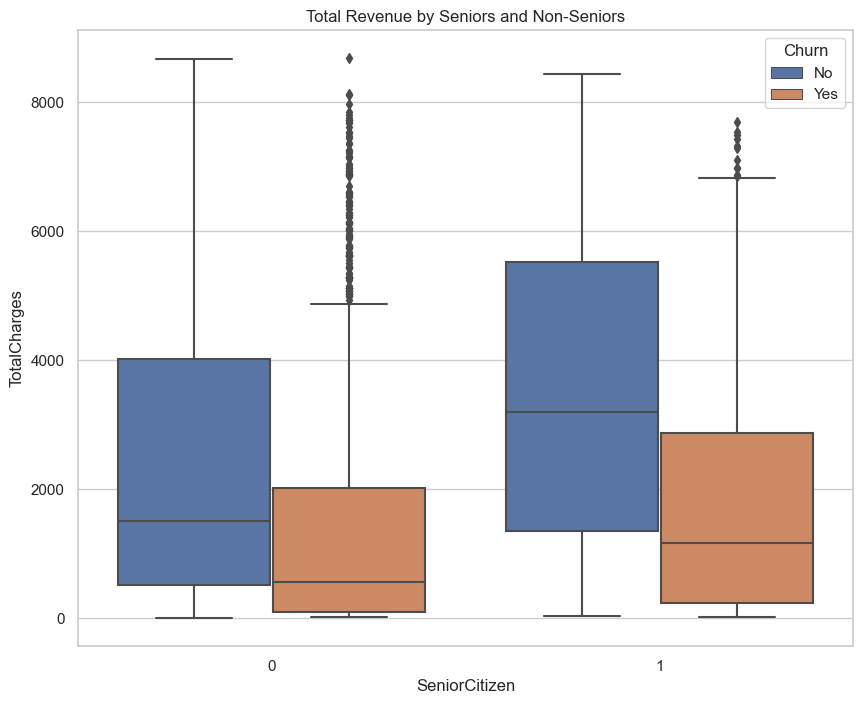

In [ ]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df.SeniorCitizen, y = df.TotalCharges, hue = df.Churn)

plt.title('Total Revenue by Seniors and Non-Seniors')

In [57]:
df.SeniorCitizen.value_counts(normalize = True)

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

Based on the above comparisons:

* Although they represent only 16% of clients, the elderly spend more in the company: It has a monthly average higher, leave more revenue and has a higher fidelity average. However, as we have seen, it has a much higher rate of churning than the young public. The graphic makes this even clearer.

These numbers make sense. Older people spend more time at home, because they are retired or taking lighter lives, so they consume more television, which leads them to sign more complete and consequently more expensive packages.

Based on these data, we could recommend a deeper analysis to understand the reason for this churning rate and propose actions to increase retention of this public and to attract them.

This analysis has already shown us some very relevant insights and this considering only the variable relative to age ....


### Gender

<Axes: xlabel='gender', ylabel='count'>

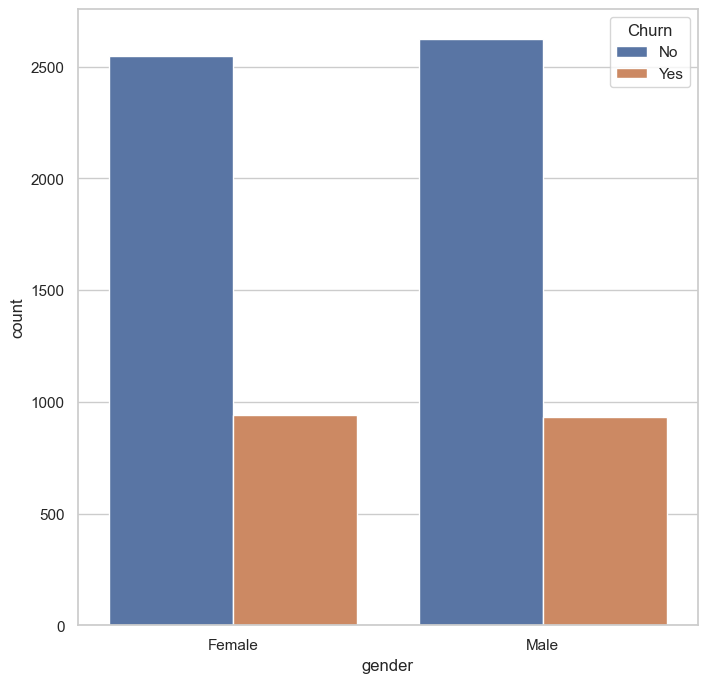

In [58]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(x=df.gender, hue = df.Churn)

In [60]:
gender_mean = df.groupby(by = 'gender').mean().round()
gender_mean

TypeError: Could not convert 7590-VHVEG9237-HQITU9305-CDSKC6713-OKOMC7892-POOKP3655-SNQYZ8191-XWSZG4190-MFLUW4183-MYFRB3638-WEABW6865-JZNKO8773-HHUOZ3841-NFECX6827-IEAUQ6234-RAAPL6572-ADKRS8168-UQWWF9489-DEDVP9867-JCZSP4671-VJLCL4080-IIARD3714-NTNFO7760-OYPDY2954-PIBKO8012-SOUDQ9420-LOJKX6575-SUVOI7495-OOKFY4667-QONEA8769-KKTPH3957-SQXML5954-BDFSG0434-CSFON0557-ASKVU5698-BQJOH5122-CYFXA3410-YOQBQ3170-NMYVV0731-EBJQB5630-AHZIL2673-CXQEU6416-JNVRK5590-ZSKRV3887-PBQAO5919-TMRGD8108-UXRQN9191-MYQKX9919-YLNNG0318-ZOPWS4808-YNLEU1862-QRWPE2796-NNUFI6067-NGCEU8637-XJIVR4598-XLKNJ3679-XASPY5386-THSLQ6728-DKUCO9750-BOOHV4549-ZDQYY5712-AHQNN4846-WHAFZ5256-SKJGO9560-BBZXK5299-RULOA8402-OOOHJ1091-SOZGA2928-HLDBA6497-TILVL7219-TLZHO4412-YLTKF2876-GZYZC6207-WIOLX7799-LGRDP7850-VWJUU3774-VBNXY0390-DCFDQ3146-MSEGF4080-OGPJL1095-WGNGG5716-EZXZN3780-YVMFA1679-JRFBR3077-RSNTJ6551-GNYDG9167-APMXZ8992-VONJD0867-MKZVY4482-EWFMI2907-ILJBN3376-BMGFE1159-WFSGR1875-QIVME0691-JVSYA5918-VUKWP1744-JHKYS2656-FMOKZ2070-FNEXE5947-SGKCL6317-YPKDH6582-OIVSP1918-ZBFQJ1024-GUALD0956-SYCWG8017-UVSZU2984-RGEYA9680-NIAUV2604-IJPDU9323-HGFWY8544-GOQSH7674-YTAFD7825-ECJRF4195-NZGTA4709-LKHYG0699-NDKJM6496-JDSSB9408-SSNVZ4443-EMBNA5961-VUSRV6341-JVQGF2232-DMLXU0945-TSONX7083-MIOPC1984-GPTEH0621-JFHOL0094-OIFMO7301-ABVAD7576-ASEJU9058-HRZSV4522-AKYLR4075-JFPGR4629-NRXKX4111-BNXIF7017-VFHAY4959-JOSRX5046-NUHWD7605-BDWDC1950-KSVVJ0123-CRBRT3197-ARFOY7014-ZZXAW4385-GZQXV4484-GLZOU4130-MZLCC0314-TKOSI8229-MYEJZ2080-SRCDE9577-WJVCQ6202-DYYFX3808-HFKDE4847-TAJYI1563-IWQEX6556-DBKZF6390-DSAZX8098-LLAZX8181-YHCMF1098-TDVUQ7277-OZCGZ1557-EMYVT2799-ARNLO2321-OMBXY5020-ZSTTY9880-TDQAC7102-JJVTX4983-CLMLV5701-YVSVF5804-LEPIM5697-GOMBF2739-CACDQ9385-EHGDO9498-FIMXL0122-OAHPZ2868-SNELZ6680-NENYN2088-IEBAU7982-VCELR6035-BXTTY6885-PKOAM7520-HQWJU5924-SNGKP0021-IKXGC2034-GDRCN8966-SNIZF6243-OZGFH4654-DLAMQ4115-NZRKS0623-IIHUG4572-DVCGN3351-NGXYI5229-DTFYB5176-LMJXE7302-ZHMHP2805-EDJPQ7156-MXBJE9601-BRXPO2863-IMQDR5651-CRHKQ0533-BNWKF1708-PBBOA3597-MVHJT0224-RLWWD9967-ATRFS3951-NJCVI2977-CEBSX6599-CEBNN5876-QMYLD2277-AXSDC9442-JTWDL3067-SVMTC4800-VHZKI4163-NCJAK5233-AOZUF1996-DBMUS7916-VCCPB5249-QYHEX0578-SKVMF5564-NEMQO2233-FAGXV5605-IYGFG8111-BKVDS2055-SIFSS8734-DKSTZ6152-ONASV9063-ZGTUY7781-HVGMK2320-SLKMB0771-WLCLA5628-RKIFK0206-TBWLC2937-FTHUR1910-FMXJM7752-XUSCI4110-PFEUZ0732-OCQOC8592-PLTMQ5760-WRAHC0256-LTHVJ4785-FCIFB8313-NDOIA0942-KOWSM6614-VBEGU8896-RAZCR4640-UHDOS4933-IKULF9399-APLBT4431-EDMIQ6227-HWPWX0447-BEMNG4612-SSVHJ5168-MQQCA5949-XIKAE9094-AZPHK4472-LVYGI6778-YSNIH0388-EOPEX0505-SPOOW6235-VDHOM7783-YKGDV4513-CXYIX3957-HHLMR7803-XOCCZ5609-CEBID4636-QRJKY1135-LMECX5956-VKDTT8677-HDZEE3482-ABPKK6705-LXORM0257-ZESQC6825-UYPFK0356-OBMAC8067-NIOYM9282-IZGQK0621-HJWXJ5844-QVTAT8905-IAZPF5394-MEITZ6859-QNXIQ2782-LFZVW2866-IKBTM2560-PPCHE1352-HNSAW1982-FEBTD5791-KAJFD2654-VBVPB0939-YAPAF0308-IVGOK7293-LSCDV5756-JYOJT6030-REHUX1218-VKFPE3627-FHKBK2865-TCHJW1423-BMPBQ2393-DIVAI5192-EBGOV0719-SYFRB1096-ADRUX2731-GJRDG3419-SNJJD4765-OXPPD6689-VRRTK9396-ZSFLL7134-MJPDY5240-CAOYT4059-IIEBK0516-UXRMT5148-HKFIR1009-IRMNA3003-CMDUU6797-UCJHZ2469-DTSGX9931-KGHOA9411-TPQQV7207-RMRDB2077-DDHJK4580-TMHJU4908-XAXAY8404-VLQFB5644-PDMZC9576-ANLXO2024-BASKD1140-UKVZG4160-AMJTL5650-VDUDS8095-WANWK8755-OGKNA2800-VEQXM7538-GWHML3859-CVCET0214-JHPFW5642-MHDQT3276-HDUEG2324-AALNO0822-GAVAP7501-IWUNG7251-LJBQN8040-MNRTF1536-HBSWP2276-YDAVZ2682-KEVRP2480-JZOSN6942-LBFDP7133-VBDCG7596-ZYWBB7929-DMBCV9661-JALZV5433-KYGHE0114-IGABW1853-ARAAQ4952-YSOGZ4950-HKQTE6786-OBWQR2684-EIWEO6439-GTPCA7564-GHCVB1173-NOEYG6647-ZEDXT7503-MIOGA4381-MHQDC6923-JHPMP4018-PPNDW1635-FJFCC2499-AJYUA3966-HRMZA8405-IGQFX8224-IVVPA0139-IVFJG0030-FNXPP2189-WWOEW5684-FJVYR1894-IGFSG1266-NZYUI4718-DHSMV3900-AQPHZ5842-POCOP8823-RLPWL9505-SQFSW3758-CKOQL7521-AFHAB4678-DVQEO0691-IFBQW2202-OUTMO0810-BDHAW7131-ZQZNK5726-CVNYA9871-ELEYA4257-GAESD6286-ZHAOK3807-XHCJH5671-RQRLP1450-GALXR3174-AKMAS9926-PJHDQ8098-TDCBU3196-NVXLZ6275-YDUVO0036-IHMOT4220-TINQT4335-BSMJS2311-QYMUQ9146-JRIOX9101-BWFSS3487-EARAT2672-TGEFF9231-ZJYAM0727-BMPLR0392-BZIUW1038-ZAGBI6549-NNDYT0422-OHQHQ6916-HIJSE2316-ESMLS7408-OFWXJ6007-TCTST7905-TVXTA7695-PKLCZ2382-BCKQJ3224-DFQNQ9944-HKVVB2732-ISEZX1937-OTUKY5073-WXOYN3050-GBUSH0207-MDKNV7876-AEHIG7945-HLKEA3908-BLSYF3199-NPKCN5170-PTRKA2123-AGEEN1258-YMZNM7549-MYGPK9227-LUNBG7997-EASSD0678-RLHVP4315-MURBD1051-GEJLJ9734-YWGEX5285-MVEHD4694-PHWFW0835-JKADZ7508-SMHXL3956-CJUST6103-BOCOU5149-TGWDZ9199-PWQVC4824-GUCBY5393-HJZSM7074-IEVOJ9625-QSTYE0862-PRCBS8812-ZRHFP5146-CBVOE4750-ZRXIU4198-VFOEA6630-UJZMY5709-LVOEQ6400-BWQKW2692-AQCPF0347-UBKUZ0835-DUUIQ0811-GSDTP6115-ZTBFQ6353-BRMMA6680-WKXRZ9904-EHEVJ8584-KMVXD0851-DFJKB3261-CQXOL5651-YLPRD4849-PYRLQ3429-IFLEM3158-MOERK7294-TMAOP0604-THJFP5879-SESNB6461-PPAXN3318-ISQFQ2483-XSSMZ8165-ZJRNM9369-XFEHK2604-XVDAM1206-EHBDD8361-LBRDI4883-KCPZJ9108-EQPNQ3842-IYKUE6641-XRPSU1374-DMZUI8357-EQXFO8917-FAEMR2858-EIMXH9524-EGPJC6993-OHLXR6614-YOLAC4065-JJAVA9361-YNQWJ9391-TTOYH1452-XRSJV8242-SOQUO7460-ITWWP7868-TMWMZ6732-FZUGP4184-TJFAN8329-GWVPJ4145-UQXUQ2632-TACXW8146-QQKZH4581-LNWUM1915-OAKWD7296-PIXQY3354-OADJP3524-WQDSG0810-DHDBD8329-IBCTI3845-JHAMY7013-PSXHK5669-SRAIP3486-NPGST6941-PMGEP1624-WOIWJ4829-ZLJTK1730-VFMWO3800-LYTRK0634-SZPQA6166-ILMNY3097-NNSPB4194-WHFCB4121-AGSIN4361-BKAXE9845-PEEKO0455-XFASS9170-ARBTB4441-NIHPT8999-BOHSE4546-FOKWR9036-CSKBW8659-IOOPU4646-QZXTF4712-UYOOI7363-QTBIW4159-NAAIX0971-QIFJK9397-TZSHA9763-PDTKK2176-LVPNX7627-JKIAZ8461-EFQYM6891-JPYFF3696-XRIEN4081-DYXAV9330-DHBFL8257-RZAHR5293-WXJAK2208-NQBCT1779-PWPMG6621-NRZAK9553-DLCLU3522-CDKHF0411-EZJZE7851-WZEKY8807-ARQET8992-CEUEN8777-PVYGU8292-ITGYJ0621-CXBKL5268-DSMNQ5334-JLAXU4086-YQSNZ6242-MBHPK9359-UGBTK0135-NMXAP4782-OSFXZ7129-ACFOG1641-RQDAY6994-ORCWG1346-UFHAX3992-YWPKO2933-XEUJM0887-WBJVH5673-FSSMF7670-ZBPOQ8089-UZWLX0080-OROZO5232-NXPAY8967-SZQAS4468-KAZHE5542-NKVRU7126-RBHSD6789-HJBWG9087-EYCPR6077-BDPXA0013-MHZWF5494-HECPR1373-ORVIZ6980-IMXXE9897-KXHCM2294-DMMUS1618-CFHME6581-NQCBA7115-IRDHS2040-VZIKE1299-AURJA5565-FILXA0319-QZTCO0668-OGMHD2223-KAGMX9408-HRXRK5593-SUAOO7321-PKUYW6766-HFKLA7595-EUIVN2026-TGDHM9220-ZNKJI4030-VPZBD2226-ICFDO0723-VSOBE5529-GIBVH4187-CINZD4741-WWJQZ6625-UTXEW6818-WOBHJ1251-STYSZ4598-ZADCK7182-OVLBJ5095-ETBRJ7005-CYUIL4821-WQOYN2388-LAESQ9531-NSBMR4389-UEFCZ8985-OOPOS8800-ZKRFW8390-FESFV6248-TKCQV6729-GDNGC6198-ZFIOJ5989-OMNJE4566-QVRRW9795-SHUHB3230-IUALN0042-RLHYP4945-RVMTE0201-OAMXR1866-NXPSP7831-QGOXH6393-WRYZE9831-BPFRI5158-RIVOP9277-JOOMO0114-RSRRW4565-NLZBV0031-PVLZI7206-GZCDC6682-VCIXC6475-VHUIZ3910-MRQOY7537-RBWEA1768-ZAIFU3733-LSYCE1371-DWPAZ2017-CCBLH0536-BGFMZ2293-IJWPS2845-HSJCY2625-TRCZQ4102-HLENU9415-DPEWS5624-RYAMH0196-JTUQI7943-RQCHR3793-MMFUH3084-DOWLE1084-MNSMJ5478-JJVZK7596-IIWYC6567-HOOPW1839-FBNFR1697-BCSHV0562-KBDVM4538-WNTMJ3334-CTHOL4704-ERYFC9432-RUVSL9089-UOWJG8621-MNIHH8039-ACLPL2592-YKDIF2272-JKMSI9518-RWHZL8714-CTZJW3569-EDBPQ3131-NWVFJ5419-CONWX6240-EURKS1970-KKFWL6960-HVYXR5678-VFNEQ5977-CKHON7024-OHCCK7861-UVUFT4859-ZSRDZ5651-WYIPH8785-CJSHH3870-SPZSI7560-QRBXH6510-UPNKS6718-BDGHG9052-VKDUW9546-CQJSU5777-KJIRB0506-LVNGN2480-EJWYP3253-HKOKL6806-YDEUL1621-YNCJH3473-XIIIT3070-BDOQC4763-PGDPO8970-ANWXO6979-TNDEU7079-QRCBC6048-UWKAL6281-FKEWS9290-SHCMB0743-HNPFG2277-BKJKN5208-HFSBT5035-PGZXH6543-JXSOO8016-ZMGMO8605-ITULD2667-WYLWJ4472-VESGY3128-YOVTD7041-TXQJH0481-SUMCB1769-GRUIK2811-POVEX9972-EWRJS9314-IJWSQ0661-XEYAN5799-JRCZO1921-KYSAY6198-RTPMF1925-GMVBW7881-EVUAD6184-DYUOB5766-XQXMQ1656-DRSMG3012-VFFMN2984-AFWNC8096-LOIST9764-REAFF7107-UBYKY8519-QJGJD7876-DNYAP2091-GPPIQ5071-FBJFS9798-OPFEM0330-IVZHA7114-AEOZE2886-KEFUM2245-ADZFJ7776-QGYJC9651-GTSAQ3186-BAXNB0637-YLETY9818-XQCUV8259-NFJTV6968-GMKPR1436-ZMJAN0799-DDIHE3070-FNFZQ7675-OZCZG5312-TSZVC0993-OSGPT9254-RBFON1205-WNWPJ7108-DGVUU5127-BZENZ2720-FVBQP9906-NHHVC3766-EJLFL8152-UOBNY7351-KYHQH7643-RCHXS8387-MOJJT6485-QXWWE7321-VGNKU5816-JMLGY7459-RRWQZ1971-DTCZB2812-REYAT8017-LXHFA6022-KOUQO6352-TWCAU2361-UPSND6035-RIIOM2929-QNSRW1262-OPMFY6267-DCFFZ4248-QPAVC1478-VPOAD2988-PLAHS1371-OJCEK8883-ANODQ2351-RRBUE1498-DQNRX3331-HQDTW9490-DFPMD2581-VKIRT2851-MMUTZ3049-NDXFL7963-GQRMY8189-HBVRW3761-FLYZI4829-AUOAX1219-NNDDO8388-DMKAE9659-QEQSY5405-ZMYXQ9158-VCTQB2808-CHTDM6311-UEUME0793-TWELN1060-ENTOF4836-WNFNO4422-QVIJA6839-ITVZJ4735-BJKOU0375-HVGXO3795-GWTRD6223-DHJGV6097-EQISJ4423-YLHDV4918-FYJNT4854-CIDCF6435-SRWBJ9964-WBQDJ6303-KFWSL0386-CWRGM7279-NMVJC6407-UTSLV4116-TZAQJ9060-HJJRW2587-YNLES7398-SKNQZ5935-FCCNB8345-MVDYC8375-DKEBR7551-JOHTI8887-IPQNC8646-JCOMS5318-IXUZF8952-WCVCD2418-TPEUN3963-RYFNS3198-VELRD8540-ZQGEA4137-JOPHL2057-BOYKM1803-BGNBD0134-XWXCE5848-FHRFC6519-CFDBX0409-WTMPL8763-KIAFH3669-WHAFY3055-VTCGS7279-BUYWN2007-QVGAW2155-AMQRX5091-HFAZW0516-VRYBW8623-ULFNQ5687-DKDTV7530-HDYDS7789-HKSBS7416-CKTEP3096-IZETN2348-KCJLT5377-NDTOU5922-ABDVO2474-LCNUE0839-QNXME9172-ANCRX2773-MADBQ6016-LVTJQ6910-HADCM4816-LXZYW5149-QYTTU2070-XYMFH1927-QEWMY6701-DHKWQ7554-AKDQF4911-BANWH5423-BHIXO2959-EEXWB3402-XRIUO8356-WUAOJ9350-ZXYJC8958-JPTRR3173-WSSUE1098-KFQEC7190-XHTWJ3537-RYBHH2485-ITVKB1612-EOHDH4510-PYUSH9359-JANWS7517-SAWMO7054-LGEQW0523-VNGTF7105-MXJLL7940-UQQUG0923-PNFUB3062-ICYZQ9938-PRCVK0973-KYVNF5129-HHMZC8840-DQLGN4547-LYTDD9894-QMIMJ6770-XUAGN4193-ORFCL9281-PKKZE6689-TCZHQ5777-ZPQNC1022-RKXDR2272-UOINI6637-KYRCV5668-MEISB7188-CBBBA5356-CSVSQ4720-VSTSI3219-JQRSL1845-CSBRZ2123-VSCOT2484-DGXPZ7409-JURKQ4587-NUKOX7297-DVYGA2239-CGBUZ0854-UYHZD7243-LCGGZ8229-BUJHX5504-WSIUR8183-ONMXC0564-MUUQK0701-RFGFI0019-EFAEP5619-PTMIK5882-CMAZQ5846-QFDFI4445-KWOKW5447-WZAFP5110-CHOPY5445-UTODQ4425-OWHWB7892-QVYKW0602-DDUML2208-MPXIO0348-SDKOL4373-MAVJG8901-HJXTF7710-JSYOA5419-KLXBN9885-MFVSU4514-GFCFI3365-SAIGS9828-AOQLM8000-REIQB0266-CLZKZ7615-ESMYF7020-OZKXZ3977-QCRSL1447-PJGGA9139-WQQDY9430-FRQOC6845-RGTYS7328-OWMOM5155-AZQPB8861-HGGKB7065-YUNRY5989-PGKJB4795-KTRTH1488-PBLJN3778-FOAQW4452-ROHMO5349-AZPEW3753-TSEMP8100-HZZLJ8309-IEYJD9172-JITSM7361-YPXFS7519-JTWQH2538-OIMXF1170-SASML4872-JCVCA5346-BZCHP2038-LLMLM9734-UYXQI2189-UXTKY7996-MHXLW7061-OVMIM5153-RTHKF6356-ELRKD8624-GIOUT3392-EHMNK6179-GJPSO7228-PAQPD3177-LASXD5934-TSSAU4897-QSUYC8290-YWKHZ3806-DXQOM6784-XYJAE3933-DQPWX6661-EIPZC8957-THMOA1057-FOGLZ0761-AETCS2190-BCXEC2153-MREFK3106-ULWFW0925-VYDLG0842-IWYCP3744-ZBHON8383-SGHJU8984-HPEMB4139-DETXS9779-DPNEJ5793-YOLJN4123-FCVCB8311-UEUAB8051-HJRLT8974-OVACP4010-YLMVT6288-CHQJB8160-HOWOX3023-GFLBR4223-BKEOR8894-JVDCV2014-MKGMH0248-IPDFW7978-DKUQH4335-UPJSI0524-IAVZO2737-YNGYW9297-FVVDH8007-YYPWD7101-HRBLJ5159-YFPKQ5039-LZRQT2931-VUVJN6418-PIQSP8220-OCUFY3995-WFCSM1895-QTKDO1178-PZGAB7927-AUXBZ7311-MQJCH1136-XGEQU4695-WJZUE3689-MOZGR3988-RQIXO9891-NQDBD6131-IUNXN9798-DRYDS6296-DDOOR7951-VRDVK4285-GYRQC7216-EWTRS7036-TYDEC5802-ADBRC5197-YPYBZ8337-MSSXB4312-GVYNH8495-LJDFO0839-JTCUD5494-WOZRZ8619-IJNDK8182-BJDSI3298-QEICA3597-YASZG9917-KWRBE1393-IMKZG8069-RHUXK3398-GCPMU2908-WGAXL1013-QCWAM0866-QLSIR6050-FFXES7181-BQYBV0362-RAOQO5527-ACHSO0829-DDVLK1813-JLKWR9537-VHDTA4957-TIALW2054-PJOCK9030-QGZNL6204-IEUXJ3126-WQMGH4529-CKBCL2506-CLAKW9239-GZHZE7205-BAIAD0151-ONTOV4140-MUHUG0093-EXYQL9168-INPSZ0015-UOCOJ2754-SDJRD9578-VRMNM2135-DQWAQ4056-QHXHZ7470-MCQTK7488-MXJIV7401-JIXNM3870-MQAMG6177-PEVRA4800-CZMPC4813-HQMGZ7245-NIIWQ0002-ORFBO8552-OBVRU8197-BFWVU6770-UAYGJ6463-HHXJR9776-OJUZI1306-RPWXZ8949-JTMAY2774-LVQUS3097-PYWXL2266-SJNAT0869-PAPRP4238-JSSWH2972-YDYUW2809-ILCYT5499-ECUTN4981-FLTMF4612-THJBS4094-NSEDU0234-TEVTT4304-TSPVK1552-AAGRX2637-FKFSY9796-MVYXX7874-ECPQJ0020-INWCK8739-XNIKG9755-JHNMN9251-WNSOD6974-DAFLI5103-MHMHY1846-XWOQN0235-KGSLC6650-BWFRT2712-SYWAY5498-IBWPI0013-SMEOE2884-GBPFB6114-TCFID5156-UMKOW1247-QBVSH9822-OAOVB1226-JZNKR5136-KCKGI6486-LHTMA4083-BFNYK7389-KBFIT7176-WIONM5141-ZUVBH0310-SUCIN5197-PYEPU2929-ERCFZ7548-SEPYI8835-VSDSE6619-RPLQZ3503-TYDAY1623-NLDOT9621-OUPYD9898-KZQDZ0141-YEAYS2450-ZKEED1133-KXCGE5236-PERKL1049-FYSYG0023-UYUPN1465-WCZVT9481-SFCQY6360-SVNWV0567-GGCAC7089-IVVAZ9050-IKDZA9802-CAQUT1254-IZEYF0187-WZNAB9492-TOKRI9221-OTIVJ7602-MVRMB1197-BVMVG5406-KGRMX8481-YYXWG2230-XTUWL7706-YLMQA2609-IAICY4716-MRVEN2143-LJULT1323-OOEPC6164-HXUGH5630-IXDXV0320-DWVTU9588-OZDMQ9921-ZVRHG1174-FGIFN1032-MAELW1552-TKMXS8622-ZLFKO6188-UXBBR5702-SKUOB9067-YGSCA1776-SPBWV8735-SDUFN9405-GPBBG1926-QUZNN5829-NVSQN8922-LIEGH8869-LIHMK8245-UMPYT5788-YPOEG9081-WWXKP8931-GJJIQ4277-PVRAN0722-SVSFK3612-YVGSJ9825-YCXWZ2000-DHJUY2050-ONYDQ7055-JCGNI0739-UUAJR7285-KLOTR0654-PQKDW7175-NTIXE7963-SHNDT8129-GMVGI2882-DDZPG3547-LQRIK5843-TTHGI1849-RJYIG5380-XPJNZ3230-JCNZS7996-BPXHY3227-WLKLI8237-ULIXL8216-AZUUZ9153-BTBVV4074-SJFFA5186-PEIZU1074-AMIOH4910-GMJOT0354-WYROK7748-UMTRK7145-FEJWU6463-MVYRY3969-JQABI9624-EGDEQ1051-EQPZR5780-INQIK4526-ZJJTM8384-FZBJK3750-RNQKR0962-CQPWQ3096-YXENJ1265-BCFEO5837-LXSDN8325-QRPZR6384-VMJHP2262-SLNVK7730-CLDSV1135-HIORI0164-APGRB6481-ESCNL1790-NESIO1550-EENBN5202-IVJNU8198-RKSZG0137-OCGAB3351-NQLDI9297-EONCV4588-YBNIB3336-JORSO3130-ICDUP4611-ANLQC4213-HKBJO2792-LSHWX9018-PCIOK4837-QUSFT0907-HQNTS7665-NKLAV8250-ZNGGW2195-ZRVAX3550-SAHFP8562-GHPPI4986-MXSFP3027-YNWZU5609-IMCGG9481-WHGWY9565-DJPIB4328-VUFWD3301-LSLWQ7473-ZBDSN3166-PNEOF8780-YRMTT5140-FOMCQ8454-AATJP4659-NZRUF4531-AUZNK1855-CFULU1872-EBWSC2608-BHKFN8128-YVJRG5781-BKHOP8628-MFKAX7629-WIXZF5445-GLVOT5472-CVMDX6461-SZMCV9508-ILZDG2346-DJQTB1697-LYYYX4749-VFKVB9640-ZSLDC4231-LZUYM8510-AWCXC3594-BDSOA0431-APWVY6838-YAUVY7883-ROJOC0244-LGNFY4295-YURET4236-UJPWO6402-SSEJG1143-NMNQJ1110-KYLGQ9929-PLVPA3518-PZXZQ0924-BJCRC2351-BKRZW4455-BFSPD0415-MOSGF0815-MFZGM5480-XTFFL7909-FIOIY6857-VWJDT5624-BQSSA0197-PNKNK2408-WITXK1229-RCALF3572-UOLYZ1429-UYJSV5577-OTWWW6366-XIVKZ3470-OBUET6599-GZWCM4404-HIBDJ4760-THGOT7295-JOMMD4016-BJKTZ0581-MDMPW5013-SBUIH9163-GHAYE5353-WILCI0709-TVGUR0058-EVZWM0519-DRGTI1017-FBQMM1985-MBRYP9372-TXXPS8433-WPJTV5804-JMYIO7599-NTMDP0536-ACXIP0936-NQLJU1575-KRZZE9170-GYZJC3638-DIMPH2454-RPBRZ5993-JSUWV5387-ASZNZ2002-MZHWP3097-FQTVJ5465-BUBFA7299-GNVPL1215-VFYVK9371-BITHB2265-CYWIV9093-FPDLG0541-FITGH6985-HAYWX6838-HVLXG1897-OKVMW0233-FTHAV7771-CFQRQ9512-PHSMG2004-OCQXK3617-XLSGQ7517-LDMPS7244-KXYZN2672-HUYVI8148-NLEGT8347-GDTMP0310-MVLET4003-OCTMP6652-YFFJO5248-RPYWW3170-GWYKC7409-KIUTL1732-VHUBQ0495-RVCBF8869-TORSS7446-SFAOA6505-OZNPG0679-IDSTG7765-LWVVH1658-TJVOA4692-NNQRU7742-MYPGI9619-GSATL5622-UEJFI9747-DDZOS0301-FIDRB9453-PATOS3348-CFRNX2931-XIQBR0106-UGRDO8059-UDZFY0208-BPQEJ5312-IRCFR3404-JNXAX3489-VSFRD5260-UMPWX2249-YPRNG7410-YTJIK2674-MIAHT2576-HXMPA3237-AJGEH4707-YNOQA8648-PFRMP1163-VIPRI9348-ROUAI0596-BQCEQ5598-IKHQQ6765-MBQNU9786-IJYDL1303-SRDOK3769-MHZNV2207-QPJED2209-XADXF6620-JDYNW0516-QREYC6022-UGGSO8084-OIVBS3352-RICWQ2065-MMKGR4484-CGXFK1402-PTHGN6214-EDAKZ1796-JANOW6127-ISGTU1614-JBEBI3923-CSIHK5795-KTGUD7924-GJZFI5897-ZYEKH3677-IYRBF5692-FPTAH9114-AAFQH8715-KKTFG1550-LOAHA1728-BQDMA0268-QKIWO0876-WDUUZ5117-ZSMHQ6465-GSRCL2858-MOFSQ7503-EPSZW1666-JXLKU7855-DIWPO5652-MSDEY1784-BXEFA7351-MHQVU9500-IWPXQ5762-TJXGK4504-YOULA4250-FDVOU5277-ZLOOR2141-RRYGO6979-ZNSFF5680-LQOGP8189-DUKMV6032-IGALN1898-JSNDC3911-RSNHI5505-OVWQW7271-AJDTL1867-TJHTS0516-WJVXC9174-FKWZE2817-LVCPP5038-ETMLM5056-FIMPT6569-KTMDU4822-NGOCH9391-DXGGG9844-FELAJ5307-DZCVC3148-AOIQT8679-JOEVF9754-CLVZW1432-FPAXX8336-TAVKX7168-HDQHG4803-AXVYP3884-HCSWG4567-AKPIA5077-DXTCG2919-HBCJO4236-XPXAV8903-WMRNW2452-SNHFZ3629-WEAAM9909-DFRJA9099-FTUHS0581-BXBUB9467-ROOLM2253-KPMNB5148-ORICT4893-GYUJU8908-SLFCJ9766-HGEDE5044-XDPYX3721-WKIIL6734-CKRSM1265-ZFOSD6568-POCUI5197-LQXXH9907-SWKKF3457-PQBYH0587-DMGBH5384-ZTTWP1407-DIGZV6397-JNZZG0570-BFQHT4393-OBCRR3523-QRQLL3696-DFHHB4717-GHADL5879-HMFFH3810-DVDQQ6972-SNKKW3694-GLTJM8149-RSOUN9055-MOJJJ4359-INNWN4032-RMHCI7250-EQKIY3594-IVHJZ3896-ZVNET4013-UBXWQ4931-TRZWN5519-NPHVG9938-EKRGF8173-RXAYP4825-XJGDM7850-THJMU8849-GYOKR3665-JATSN0461-CVKMU8853-TZDGH4324-BZCKL9710-ZUSHQ8123-QBNAZ4827-LTQRJ9620-ENEJV2378-YIZKA5498-TXHLF0689-DSXGL6818-DJXAA0464-WJTKO4132-KALRO2874-YXVVA1245-HARPS4210-QFJMF4293-ETKAP1085-LDWAM1843-TLSGD9626-VFRGG7075-BNDVQ9143-CANJF7284-BUYEC2041-JIJCI1086-LXKFY4900-MSOMT2229-VWQJH9194-GFVOI1336-EZFZY1403-LKLIK2636-ALXXZ7786-WBJYI9643-AVVWI0253-ZTEOB2706-QZIHY6061-PQHMK9885-CSMWE6137-MFAJN2402-TAIRZ9139-TWBAS3866-MDTUB3913-RDSJZ8058-JMEQO4203-QGNZA5043-TRZWM1640-PLFMP5366-OBVMR0337-CNPZE8380-MQINP0840-DFEZH1513-XNPPH8690-ZVLCL6015-VVHHE1125-SNVCK4616-EWBNJ1335-HQMKX2545-EBUPK2172-EJXVF0897-FEGMU1120-BMWUB9124-LHCJQ7029-IJEJK8871-JLMHM2235-ZGKPT3891-PUQOD8659-HDIYE3658-KIBGF5519-YLDGW1370-GGAWX4680-KUTAJ5307-UVGNB4946-EDSEW2516-VQRRV7580-UGXNC3642-BYHDO9629-NHXFW0396-HUJBP8879-ZKJOF4585-HETAI1474-JUWSM3530-CRZSB8498-XXGWA7636-PEPNS5578-NKCXI1642-HMARX3096-WPXBT8434-PNQZX4299-OPXEJ4951-UKAAQ9618-LFJRU6693-DJWTY0744-GKNGE6447-EGDIV1167-OYZJF2108-YKQTY4806-DXQCE5294-DMSFH4837-PZTIC1625-JAIIY3272-VUHPV8663-UPDGF6719-FGEDO1837-YQUCE0369-ZGOVK9919-KNPOO7872-BAAZR8174-TBVCF1877-HKBQX2746-DIJLO3508-VLHCZ4086-ATNFV7047-FWEYA2000-MPKCA5473-KHBPS0326-VDYXE6773-LQTVT0436-TWFFZ8566-YPRGL0311-UNPFF6609-MXJHJ2669-OIDSD8400-WZICQ0410-IPFTY9402-ORRAH1293-HHSHJ4840-ORQXB8610-ZIKJJ7801-KICAO7673-LPRNY8229-TNIQA7339-POGZN4465-VDKIQ2921-XWDJH9257-AZMTZ0975-UYDTX0975-VOOVL5569-KGJHX9799-CAYJJ0426-TIRNE5443-SCMKX8295-KMENE2368-GAKKQ3199-XGZCY6036-TTFYU2550-AEVRU0378-CJKPV4706-AXVKM5889-JTMUL1703-MGIAB4311-QTTAI9474-PHLYD4318-RAJVY2165-VOEGB2254-DLXRI1053-MXTTK1530-ZTDOZ6212-ATMLK7594-RQHXR1077-HUUJM2045-BMBTJ9677-AVKED1670-SVOWZ2227-JRSJX8980-WQFWL1730-ZMAME6506-EYCNH4634-JLRJT2560-QTSBS4795-WRNVT0260-ZDLGK6357-JJPQT9447-YPTBX0133-BMFZO6128-CZOMY9026-LHEVG2260-USTRB3656-TKRVZ7925-PNRGI1552-CZCLL3038-PQIUY2623-DRYAM9987-LUTYD4488-KQFDT2612-RANWT8707-RMEZH3346-BRMIS6479-VDGRK2933-FILNV3569-JFODW9544-PYPSJ1591-XWLGB3243-ZHOHY9986-BONCE2722-JMONI2203-GHNWN3878-AVSOQ5296-PSYVW6319-QSUSR7579-OOPEC0512-FLFDW0487-CRLZF2107-FBPTK9451-WLYRI1991-VOPLL9419-IPPBE2900-PHPLN0612-RTZZA8751-EDEKA6878-GGDWG8450-LUGUK3604-WLABM1142-IHLOO6410-LEFEN4633-MKHYU3194-ORPIK7826-VVKWT5442-BXVND8816-VXNZD9378-FXTIZ7825-GKXMW9753-OYLBX6656-JWRQX5899-MQZZL5312-UXESG9488-HGMJH6038-GCYEC2150-WLKUW7159-FVYPK7032-LMBHI1150-WFARN6088-BXMRG3144-AUDBS4821-SJHJV7346-MEDWM1137-DGOWI3812-LRZIR4818-QIUFN4227-OJHAL9220-CXRSC4877-TSOFF6688-UZPWD8468-EHYJA1097-FSPVW2839-RFSQE7010-ZMVBF0968-GSIKN9057-SIHCH6771-XWBDM3082-YVEKW0191-EQUUH7134-HBPBS3489-HHPFY2926-JEJJC8601-QACRS0508-OOLTO9822-WMWVG4806-HIPDW1548-ARAGG4415-WNGVR4615-PIVVU8885-QSQBX9385-NXKDA6674-KVJHG1814-DKOLC4201-JMNGR3537-HPKQT2129-ALKBS5821-MMEIL8260-NGFNY4742-TXUEX8800-JOOCF1469-LBJQJ2386-OWURY6712-OAWRH6278-FEPBZ8614-VGMMV2930-UOTMB7973-DZRKH5914-DVBWJ0650-BWOZN7785-RDVIG9306-CPCBC9504-YAZWB8819-ZBYNA1833-VGRUM6137-NICCO3620-EHIMZ6870-ECSHE8747-UDCOI4626-OZDTJ2325-ZUSFD8194-PEEBY6872-HXFNF3932-CMDTD7714-YXSMB8387-UGUSU1194-HVAIF3594-UVONA1767-TGTKO8805-JNRAZ5089-IFSDP0206-OYVOC0237-YFUTL1732-FEKLD0479-HMSWA4817-VYYWS5701-SVCWR3129-AAQOU4922-CVPDX1396-QWFBJ1099-BTKWT7340-KEFQE4570-QHXHL2898-LSJGD8104-OSKWT4521-YEEHE4090-KPJIP3786-WOVKF6086-ESGRL3886-CERTZ3824-RHKVR5816-SCGFC5989-AXPUC8590-OHDIW8015-IHCGW2332-TODQS9278-VZKCD8008-OTEZX5999-LCXAO5759-RCVCB6372-RFVNS8261-GWDBQ8938-UMKPI3882-IYOIJ3115-JPJDD9025-AOMKI7964-YESJC7716-YTYHG9938-ZREHM4647-MUZON8849-PRIQJ8851-RAGOV1304-NECVQ1729-VLAZJ8285-ABVLB5712-VBOXD6629-LADHQ8945-GRKHX4537-CIBHB3815-SLMEF5154-VEKBL4324-AHJKS4355-CVPVS4495-LHSSK9861-PDSZP4505-EXZHB4587-VVTOX7404-JLKQG7421-ZLUPA8972-HJWNV3274-NSDWE2632-IVXVF3692-JHONH5914-GXMDA7463-IFMQU8515-OCTJS3441-CGZJH2860-RANUS5261-QSHQM1200-TUZHR5884-FBCTL7625-XCQRH7634-WSWDB1731-TVIUK2987-BJXIK9769-TSBZE0406-BPDVR6023-GSSXW5276-KQWHG0420-HLGXF0582-AVCLN0743-HRVFF3727-JEZTU8143-ETQTI6689-KXGBO9667-TKTVZ3657-COGMW8570-KLJYJ7754-IXRMC9473-CBZOP2969-WGHQO4255-DDUOU5863-OOKCL1329-VHWNP5590-YRFJT0019-GFNTW4256-ZWTZI8309-PPCED4054-CUMIA0603-TPMIB2525-GVKQU2126-GSEGL3677-TNKIO0440-QEXBZ2434-EEVDB6762-QVYJO6199-IWKGC8152-VETUR9667-EQRXU9522-BNTHX3329-WDIOK7980-MHFLQ2873-ZLIWT3415-TAILE1629-DQQVB1915-IOFGU3045-XETSH0374-AACSZ9140-CZQZZ3423-HHXAO6537-QLGEX0916-QOFDP5606-AMZBO6199-IPCAO7665-TOALD0324-BRPCJ2777-PHDEI5640-CAXOA2235-EZAIK3847-BAERP4282-YMKNA1453-RZFON8263-OKETD0670-KDOMA2476-YGEFM0829-XXPLX6624-JDRDS5055-BRMNE9189-JWSHV2190-PHBHR7184-LRUUR6627-CFOSN1574-DYCWE2466-FCCPT4826-TZEVA3452-GWUIN4439-YRNVD2876-VBBBL6834-NXDCA3005-TYFRD8670-MEFCP7777-UNYHB5597-GLBUC2748-MYRVK8450-UYIBU2969-VAPYH8474-UMLNT9142-XMYJH7733-UDMTP6904-JLBGY6917-YACBP0769-MURVM5120-ZBLAI3663-MITLP1905-OEILC7858-GTZSP3285-UCQVC5482-PLVPE4553-DVPZG4902-OHLSK8620-RJPZN2642-MAWLJ2357-COQEK7103-ZGVNT3737-GCSPV2027-WKXMW2961-VNFKL1768-HNVGJ6963-KQYQB5934-RMPOV1207-BLKSA8316-BBQAY1166-PQLGG4291-YZODP6427-FEFIG0017-IUDMW5446-DKWYW5797-APWZC3683-QKIUE5176-LDKUH7602-DBTOU3519-ZKXGG5451-YHYPW3066-RRJIO4664-NJCMS0307-BCOPK7629-WFGLW2542-HYGIQ2150-UWTFY6124-ACRHJ9362-MWODR1020-JPQOW7919-ZODZZ6867-ACCZI5939-XAIXZ8207-VVMYB9732-EQMWY9360-AHGNL1087-UDSIH2121-JAFOM8818-DOPVL1227-UDMZR2167-FQSTQ2819-GWENI3814-MLAXC2692-PFYTJ1226-UDFZR5955-EPOAZ6821-JPCDC5811-IWXYM8189-XRIKE6425-YQLLO2228-BZDEE7734-DBOAI2789-CZANW2091-RFFBA2114-MGINA7596-LDUXP4489-SNOJF2192-OZITF2186-QZEYA1131-ALZWV3284-SVCRO9732-OUYRN0559-CKHUS6899-PPEEA2582-FFFZR2187-LZGPL6288-LBEAR9019-QVLZD5808-TOTXO5599-HVLTW7394-LWLYN3707-LRWZD0958-YHXGP1101-SSWAG2979-SXESE4194-FJARJ3969-GYXEL9208-OLGAQ3244-CQPHU2674-MLXMN5792-JALQC7130-VTEWQ2200-DSAAL9351-LZYGF4366-CTOUZ6121-VZNQB6671-NGWON6996-KNSML0096-BXERS3806-YAZOV7998-ZLXWN9133-AYJZG8430-TWCBX5018-GWURO6741-QRLUP1704-NRWYE8200-KLNYW7632-YUTXB0853-NWIFK8212-CRQXP6980-CDGFC7691-XVTZH2520-SGTTA7481-ATQQS2277-VWCNI8642-GVWRF3525-DVKFN5778-BVOFB2057-ZBLPD5502-RLUYV7663-YJHSN3086-RUCRN5215-LNLDJ7576-JMYWV0257-KXZGU3714-XPXBW2824-DXNKN0848-ZGQIJ3621-CHYVB1792-UXAFY5372-FBKBN6217-TOWGS1045-LTCYT8652-YHIYU5278-PNYOX3486-HOOGQ5061-PBXFW8630-FJLIB4749-OJKQU0577-WHMEV3639-XJHKQ2672-OJQZP0137-UDEUO3134-DSHVC6543-XRMYR2001-EWBQU6695-AMZUF8280-MQRQN1619-YWUBB3178-FESZO6087-MVHJH0667-NSRGI7083-YNSKY2665-NPTGL4693-VWVBO7434-SHXLS0988-JRWWP5075-JSDKI7908-QCBCA6711-FLDFB7251-XFOIL3714-JTVOV8259-DZLIZ0442-ZXKVS8606-OEGQZ4702-IOQDC9489-JMTTN0967-BMLBD6178-KFNHS5006-MXVRN9658-WYUFB6917-FIJHC7797-EJMDP3530-VWVGU2013-SGDXK6368-NWMCE0707-HOVVN8580-QVLOC3956-MGXOG9274-UARKJ2012-NWRPA0103-CSITQ8671-KKKOS7666-WKRON9688-YGXVR1945-XISKS2154-KVJFF5360-LJCNJ9647-ERGBE0378-TOVMS9058-CBREO9029-FEGVJ6145-NNPNO5520-FVEWJ5572-ZDXHY2074-GUHPQ4625-XMOYM1385-TQOZW8063-GBATB9415-TPKRV5322-TEUJK4547-KQRTM1866-DIOQZ7639-SUPCW0599-XNYDO6377-WHAOX8999-XXGNS0471-ARVMX7766-CLTIC0825-CPPQH2400-XIWIO1069-XAIEM7569-NMZYQ5201-USSQZ2105-PHWON1494-EJZDW4884-TVUQF8003-EWNDZ1897-RCFUM9256-JTBNZ4658-HCOHW2211-RMNHO3440-JPSCL1834-ABKHQ1240-HCBOH1734-ZMNTZ0626-QXNGV6723-CEGQI6987-XQSJT9499-XPZXM3007-FDPEA0311-QYWSS4480-QQRHC0929-PECLO1202-KKGFU6112-KTHFQ4760-XOHVN1820-DJFPH9426-SXNHE9068-FHQHD7817-BOQPW9895-VFOXH5219-YIPTK5032-MIYKT6509-TSGWN3540-RZJYU3178-CIFOT2091-MJTFX4530-NDRKU5985-TBABQ9800-ONTFE8455-HIRAQ6616-AALSR0883-EIBTI9415-ZNBSX0722-TROQR7571-YXDAD3884-UEBXB8780-RSYYU5537-UXXVS1791-PQHBB8741-LQOBK3393-FMZPV6402-ZFPPI3006-XIMLN8218-FFJDS0504-HHAPI0345-XMMUG8024-XNAFQ2988-GBIVW2832-SCUCO3791-LGQCY0265-PSUAE9509-MPYOD9128-CPXKI8166-ZZTFS5855-EIBDE5365-LLFYV6595-COKXZ5181-OABFK4007-NHVHI7816-VGHTO0016-QLJIS7508-DQAKK5176-OLSKT3556-BVQGL7581-EBBOU5073-RZGBK2192-CKRLV6522-OIQSX1052-QJIBV3050-RLLXC9298-WGMRW3088-LHEFH6583-KQJLK6116-RFVHN5729-KLZAR3646-ITDGM4001-TSBTV1043-UXOVO7762-ONLJY1678-FYZOW5795-BKOYE7402-PWYJJ5480-TBGPH0018-NYROU7501-VTYLJ0480-BIXDE8760-ZRHKE1622-HSHSF5542-DHSXL0511-JTEOY5216-WASFJ7067-KSAZT6532-YLWSI3807-BPOMJ4948-WBBKL4182-BGSIQ0988-AADSA9972-NKTFD5734-EJKXG9695-IDRZR8144-DGHXP7814-LEEVE1112-CUNAO5175-AOBHI5174-RNGBH8631-WUXGY7270-BDIOA5906-DVAPM6654-QGBZZ5641-DMBFJ3389-YGYAI9560-ARGQJ8350-NYMVI1600-DILPE4654-GGUII8510-BBWMU0584-BJQGZ5134-IKDAY1360-XFJMR5730-RIITO9058-MJLZC5177-RVZNU8696-JKZNU5380-AFSSK0931-MHTEM2055-PDADH0440-UEDAI8714-EUHJO6344-SFJVH6941-KXRRV3721-CNEYS1355-KUSBG3688-FTHLT2568-OIADY8125-QPFJD2320-YKQBO1193-RTSLK2302-ANTDP4973-RLZVI4501-UYKBC8404-VIOMB2359-KLTEK2673-ZALNP9184-GALIL1394-SUIUH8993-PHFWD1565-RHDJD3765-JXVKY5092-STPKP7330-WZLNC0114-PEGZZ3359-DSRKA8639-NHQEI7161-DFHUF3957-LXOLK6635-MYYYZ0562-FGDCR2436-QBZFP3420-YJLQT6040-CGACY0264-CNITK0089-IIQKO7839-NUIAA6075-QMNRR5378-IKEEG2718-GAXQD8180-AKMJV9842-EFSYY2272-WUSPA3898-GUYTS0930-EHUZA4973-MGTON3446-QDSZF6892-EZDTG1627-AFWVJ3217-FZDMN0060-FUALY7853-GVUDZ7088-FBAWU3943-KDREE9239-ZBZZV4398-HSCJH2197-OMWGI2303-PJYHN1237-WIYYZ1987-AUELQ4855-SNKMY9593-CVZKR8595-SIZNC7124-UGSUR1862-SKORY5236-XMZJY4827-DPADN2694-CIUMO1439-LCGVL0909-SDHNU4647-XXZAM1502-XFCVR9692-TUSXH7912-SYRQT3557-HTYWR1699-TLDLZ0567-XRHCU2067-QYTCF2359-QWQUL9103-TCIHJ9150-KPBJQ3654-ARMGP9699-UBQFS9367-TCUYN0708-SJDIS4140-WJAWW2073-QBVBI6928-ONTRW5231-FIQPA6617-WLBQC6653-CBBOM0254-FNMCI1848-LBZHY5429-LWCMV7298-IZWLY9758-MFWGD1268-ASBGA8943-URTMR4815-TUMEQ4713-LZDRV9500-LTVBP7252-NTGSS1360-JYXKQ2955-PSXOE4828-FAZPK6094-ZIVKX6925-BAYGL3262-EIDHV1376-HHBDV6907-NZZIJ6133-OZILE4135-FRWKJ2911-UREFD5018-LXQQG6892-BOGQE1602-IJQQE8050-WYBND2821-WARNZ4879-GZLFH1644-IRKSF8314-HTWVE9402-ROUMJ7136-IHZJA8966-OIQHG8739-QOTTN1399-OUPJN5774-XZTQC6266-QHOJZ7269-JISCY6861-OKBCE9940-RHLFB9070-BCKQP6421-SZVEM1328-EUZHC2995-UPRYS8878-RYUKI9633-DENPU7811-JIVPF8541-QVFKM1383-EZRWL9258-CNWAC5371-VYLSX5317-FLPJF7621-VPNET6034-YMTOB4353-HYOJD8020-BWHYL7267-FRMJW2982-VPSGI4128-ETESU0620-DLSLK5980-NOPLP1156-ZFYDO6408-OTUBZ5204-HMGYF1078-TDCRN3970-XGJDU7017-VFULY5562-YJQGT8807-OPMBM9874-QLCLH8294-UIMBA5840-NVDCG9840-EFJQB6135-OZQVA4188-PCPIG7721-DVEKZ3566-VVORZ0947-IDHRQ7813-TKCVO0128-MKWSG4350-ZTLPI0361-HJRDX8988-ECPJR7570-WELNY3021-VLNRJ3776-EKTKM2080-CAZNM5982-PSMKW7096-ZNBZI0786-IVLAW7566-DSRLQ0643-OKLRP7245-JMTTQ6050-IJRHS0365-TRTPY9381-NDKME6502-KUGLL8382-SHQEH7668-XCFYV2983-ZANRP7845-URHJN3034-ZBEQN5018-HEKFO2282-YGNOR5336-UFNZP6854-EXGSF9233-PSYHO8327-LZKAS0302-JOIVN3858-XHYJO6261-LHRTG7841-FCRQD8777-MBMTS6233-HXJMX5902-WBLSE1981-INRFU4971-PUYQO3239-TPHPZ8485-GJCDN8486-AYEQH2495-KZNFB4560-WQAQW4274-DRSQT8780-IXSTS7673-BQGKU6723-WSNTY0345-HKJVM1061-PNTHC6574-MCOEH7399-QHBJS3049-SOLAY0997-YTLNY3317-HRTNN9479-HYNYL8058-INTPH3642-GKTCT0774-RMNUW1334-PDUKM2927-CVULT2144-BFDSO8745-PVESG7647-GYYKX5647-FXOTP5569-OUICF8821-XNHVZ9700-ISPUP9027-TMATR9110-HSGTV0704-VCUMB8053-WWDRO2535-PBCGC1213-NGCUN2498-XLDZR9866-OCCKE7718-UPSKJ8731-WBBMB1448-CYWKC1270-XKUCC0334-ZFJSR2894-QOJRX4565-EVZMJ3143-JQEGI6386-SZZKH3327-YBAKM2580-ASVVY5032-USPKF2982-IHMFT3521-SYVOR4254-QPEDE5649-VUKMC4273-MBHYA5701-GUXDC5143-EGQFK2495-TTHBQ8232-CTLKO9227-YBAXE6168-WFVVF9860-LISIZ0877-SDMBN2786-GCDPI8065-YKXKD9637-EIHEQ5320-BRKGK6284-KMNUF3137-LUPIX9701-CDXHR8124-NZVGJ5376-DEQCP5118-MUEYH9095-HFAFX5627-TVBPP2589-AYCRP4067-HLYQI5057-RKGLH0292-WEGCH8910-ICHIU9786-YWNHU6407-GSJNL6005-OBZPH4049-ZPALD7932-WPTDS6833-JMZYP1310-QRITU8961-QDZZJ7173-TETGO2300-RQGOI4998-IKFSE2455-USLMV7394-FKDNK9488-FVZCC5995-WWKKG1597-FZREH7432-FFVAR7246-ZGQDF7000-WCEVQ4456-RHSNB3512-IZIKN2481-SBOYW8660-BUETV0580-PIQHM1696-HXOWK3026-ATZYV2506-TNFCO9970-QBCDA8718-PTMEZ9496-IVVRP2657-VPXTA1221-GHZEP6142-VSJQO6933-FHBZC9770-KXGQU6437-UKHMV6726-NNFWD3002-WQZWT4912-PIGUY6060-DRTNL2725-TTRIQ8990-ZXLSU2275-RBYQS5536-SLHPM0804-XBFBV2799-TSLAG0196-VULGZ8837-VVWLQ1976-CFOCS4776-XSKYQ5753-QQWPW1809-DMJHQ3173-NVMPX0248-PGHBZ0623-GDISB2892-GESUL8034-RYTVV2619-WFQWU5044-LRQAQ1333-PBMXB5985-BEHZK9644-KVCNC8174-LNWMW9279-CJEOJ2404-JIBFC4614-NUVZD3803-KMQFW6804-GDMOI2990-OGYTD6646-JPPHA9611-CTWIH0329-GTIAJ8838-GPHZP8750-QWZAJ6918-UMQCG0675-NCDYU6339-DKLMK8023-QHAIO4397-FRLTA5087-SUURX8133-ANHHJ2270-CHBFN0013-EXCHZ5982-FPVQN5550-VFRLC5546-BYZSM4929-BSTRX8215-NGSPE2225-ZRGSG7601-DHFWZ2657-ALMWY1998-VHJHK1707-HABPF7253-UVNDW0027-KWYKW2308-STERM5982-XMDEX6051-PTVNS2877-VDUER1794-HBQTJ2460-FPSYH9705-ZJBCG1320-HTRDR6847-KJLTS9670-BPNXF3913-FCUUW9555-SAHUZ4619-EVPHY6424-ELEYH8963-MQVYN2458-EOMRE6821-BUXUX9801-GDWGV2320-JRSDE2087-QAREY2320-TZRRH7502-BNYGS4291-HYEBC6147-CBCRA4471-KXAUH9752-ZNQUT7638-QVMVY1121-QSIVB3244-DCJWY2824-MYYBN0875-CABNR6469-QJKZW0147-ESWWR7812-FZHPE6370-ZVHDV5915-DGNVC3566-CAAYU4797-AXPXK6982-UQZLY2522-WLNSF3841-CONLJ5057-LCOUI0193-ESZXP0983-TATYJ1813-JYWTO1984-FCOWB6476-YHMGA0168-XZKBB5196-SGOAK4537-DKTAL7072-MBHEV5602-BVFMK6297-NOOPG1891-UAWWU8204-TIFGJ6108-OQZDQ1089-XZWHH2325-WINES6064-ZATLR3096-JRDSO9648-BCHKM2888-ADFAO8707-HOEDG3374-LXDEV4072-IPYLT4936-YPJNK4817-KEQSP9251-AWQGT2384-OVPSA3580-GICBM4817-QRJSX4686-UXDML3349-ANQNH2398-YPMUR0932-YIXYU1431-CYWMH6349-JDHQP5539-HIVAK9985-MWVIX1116-FRYVH9633-XQABV1265-XTECC1183-CANVH1972-XMUWV3407-JMJQQ6252-DFGTK1539-LNKHM0289-IVARM3090-QFUVD2237-ZFSMY1818-ESQMW4871-JTKJF1415-YFWLT7401-RUBNK8661-BOYNW6711-VTNRE4815-GBTCD2805-AUFQN0980-PVMRC3500-RMZLT8571-ZCMCX4548-SDBKE8066-POXGX7129-CAKJW3570-YUEKJ1555-HAPSU7854-EKTJL8132-YPVBX9102-IAYHT0374-IOEGQ3396-DKDEL9066-QRSDU9112-WSNPU9867-NNXLC9507-EXLTT0402-OAMEN9846-GKXAS5055-MGMGF4641-FROLU2969-QWUBZ1534-OULXE2971-SGAFL2905-KFQUV4581-SSPWD3370-HXOPH9391-YZEJW4118-CEVPF7876-BEUTG2338-BQEZT9873-MNDKV0378-NHQXU8241-JUIQO2194-IIQOF4512-ZUIYL9584-EXCDZ7969-AULMZ5093-FEGLU2621-UDNLU9214-EKVXR3410-MHHUM4550-EVXNY2122-YWVYA2968-SSGAA2296-DKZFP4844-JJWUY6777-TGHTM3229-USWAR2138-VFAPZ6131-JLWZM1709-EJDOX8610-WFCJF0383-CLDDA8033-ATFAS8277-RVRSV7054-ENNGU9402-CXWPL1965-AKTSX5343-SGUBI7248-VZQLC6156-UZDLF5183-KLYEM9355-NPPFS0068-FIGTF8035-PWSEV1830-IPXVJ8398-TBIYD9912-GVSEQ9418-RUKPH5383-MMTWC2908-ZTPNF7240-ETPTR8421-WZOOW6261-RCVNS7951-QKZPL8756-RDDLT5816-QVHRX4430-YHXGG3640-PHQXK2729-VNVAP2957-JIRMN2049-BAFNW9782-LGXMC9033-EOXWV4673-KKSLS1324-NLTJE0239-OXEXL7049-GKVZY8577-QSOCG0212-ISBBF3585-YNADK1099-GODLO9661-ACXBS3462-BJQQA4367-NHWMM3779-OSWCF6736-DHUQI5917-HBSDW5685-IIXLY5671-UUNXD0956-ACVZC2325-NBPZG0440-MOGPM0020-JDNXP3752-CQSJI5025-GOOKI4698-KVLLG5095-AESKG2887-JPYLU4770-QAZXN2027-OAQQC0282-NVSJS7353-YOWFP8008-ESFLK1555-DJEQW0519-XUZJU3363-EWLGO4750-UKWJK1689-YQBYY4487-ZYJZK2959-FENLU7634-HLQJR2516-XSJKX0057-QBUQH9445-SZLCH6599-SFQVE8331-ZXFOE7325-ENZFI4884-ZTHVF3920-HIHMQ3055-OYMSE0613-WUXUM3945-GFWQL3387-PLKUI6096-EGVTU5081-NWSUP2580-ATZSQ8085-MSNLK9691-HKOVS9881-VCZEP4523-WXCEF8364-TRMMK3063-QFSZL8775-LHDJH4024-CSNBY7110-BDTWG9605-WGJVW7711-GQBZC3565-UNOCC4627-MIHJH9795-NREXC7356-AYNJP9249-FXSCK8654-DHAOW5438-QMDDL9812-GHVRI5553-AOINX3831-YCPUO7445-WMRBW0080-EMYVY7337-CINUD7609-NRNCA7153-CHRBV6198-PNNSZ3317-VLGQT5614-DNZCE1095-JUDTC3896-RCYYE3190-ITQXP0870-VEMYL0178-CIIKR3982-XWFZQ5010-IPEAQ4009-ALQFH6383-ZTSIW8990-YOZLV3069-SSVSN3627-FCRDW7562-GSUHK8901-UPRHR0118-JPNOY5857-XRECV0725-CXOTM9000-PLFUZ3427-GGZZI4077-CROMM4847-QNOKA2220-IAHLS1658-XUHBX3719-TDVQB6328-ZPBGN0201-MIBOL8495-PRWFH0439-IFYUN5716-LIBJC2868-LLSKM7328-ZJAJO6458-CYIDZ1090-PYKCI1042-HFUCW4439-JMPMT8999-EXMNO2446-BEGGB8821-KVZKQ1496-GGSUK2575-GFSOE9962-BFPDU3296-SILRA9681-OXGVC8265-HKSOW3544-FBCAS4759-PXTAN6549-BTYPG3705-RHRFR9374-YOLBJ6128-DAFVY9933-QRGTX3751-KTZEL1977-STDKI5066-GFJMM0458-HEUZG0824-VWDPO8409-WQJUX3278-FSIXX0328-GRPMV9746-UGFAC2946-KIQSP0625-AFOHS4342-HENTK5003-OKNNK7208-PSIHR4012-ZTHBR0489-WMEMG6956-SMUCM2985-FMWYF2717-HVIZY2530-ENDWQ2890-WFBHU7033-CLAMM4023-RTIQM0864-FVJNJ9541-PWTWO3967-VQOGC7872-RDDLZ9250-WYPLL6308-CQRBU2754-XBHTB1597-LHYNC3043-SUDUA5442-BHQNG2169-RRLFW5872-OEQNH3162-KKZXO8873-GLDMH5696-JVVQY8845-LWKGE1577-HKTFG8752-STIVR0691-NIKRI5022-JNQEQ4558-FANTW3249-VHRIP4701-LKOZD6603-QWSPR9921-QFQUL8651-ENBZX4129-LYCOI7798-JVXYM2696-ECXKC9330-IJWIO9286-DOJGF6048-QBXKL1025-FALIX3451-VAWLI3214-IYUUQ1936-UAFEH1027-LKKQQ8073-IJDCM5309-TAIKL6856-RAURS8778-LMWTJ2845-KDHVX2869-ADAWR1535-VTJOQ1293-BSEUN9894-EZEWG1952-DVVSW9853-JFZDU1963-VAUKV3777-XROBG3999-WRNGR2680-XKKNJ2974-GGUXS2101-RANCD7921-BEPCI0807-ZABDG8510-TMWYB5298-GSTLM4450-YOOHP6728-CZFEI6121-TNHBO6519-ZHPXP7739-LAXOG8224-UAXBZ9776-CLUJA2999-AANRQ0480-KYJVA6034-ZRYCV3926-YZVVX2079-FBMZK2096-XOTMO2346-LOCWC7560-QJAVJ2995-YWTCD9137-UIYPG2809-ZMYOQ5084-OOVCJ0254-WWRKD7727-SHVZV4609-KNNWG2669-QVCRG9174-IHETN8164-OCKUJ1150-FTQGN9223-UCPVT7196-LIWRH5448-VWNAM9330-VOFSZ4351-QLCSU0939-EREMR9389-ACWBI2100-BDNSN5998-DZLYR0488-GSLFR9728-FTTVZ4310-KEDTB0742-NXBGR9236-NDUCW4753-PADAS6103-QCKFX5889-LFOLL5708-EVONK8708-XPXHZ0572-ZJKLT5135-RDDQL7016-BPGEU9332-GYWLO1092-WPIVQ7233-IOQNP2834-JKOOW4923-ADWXJ1763-KUAAW5195-KPUNQ5949-HGVJL5203-XEHAX1635-HDGFT8050-XGRVL6661-HBGWL1518-VOWAV5909-ECHUI6728-VOIFY9317-WZPGV4891-NLUBA2856-HYAPG0661-KQHNK8709-KRDVL1427-VERSM3621-CEOVK2229-DPMBI9626-WEQRM2188-SXWVT1094-BKOSX6969-MVBAI2978-XXSOG2342-CKIAO3898-BSJYF7696-AMHOD2453-SAFNS9558-IHEZX9617-UDPEU6340-DACFT4955-VCWBI6813-GZQCG3389-KTRXV3118-UHVVQ1031-IIDEO9210-IAHGH6169-PGNCD0023-XUOPT4592-IWTJI4657-FWVFY6518-LGAOV9770-LXDBK8822-KNBHV2791-SFVEW6762-NSODU3398-FSHON1074-WVEVG9979-RGMZT6437-UDQJM9259-PACGQ4415-IJZTP1465-VINDH3468-DRVQJ2810-FTLEM3411-WLRSQ8006-PYCSW8722-PRFDV2164-SOQXL5850-BDWCY2038-YSEZE8799-OXZMD1925-TIBLE1705-GUHPV0048-PIHNL3704-IEAXF6810-VCAEX0674-EYYZV4480-MBMLB0822-QGCXA0872-NXJYS2832-KJCRD3588-WSTTJ4075-WKNIU5090-EMGTC3798-EPWRR4186-ZBUEW5274-XHAKY1442-BQPVU4940-KHCWD9412-ARGBX0305-SQECB7605-SNLQG5561-NWEVX0064-SUDOG8561-NMTBD8292-FRFZQ8591-NXRCV7895-VONWT6253-GNHWH8080-POTJR3662-FXJFO2737-WFVYW9912-OMZDS7878-RTCZG2452-MRMZF2272-QAGFO4342-HFXWS3545-CNWRG1173-XZPYF9850-OWRHQ6898-RBTLU5481-NTDOH7359-SSBJK2061-VVFST0685-MLYYM0749-IRGQE2380-DAMQP0164-XAIRP5666-CYCYZ6365-HITVU9488-FYQAU7957-RYHQD2180-DXNEG5515-AKOAJ8976-OQHGT5245-VDBUR6230-BSUXY9928-BZVLZ4114-QMKVN7660-HDPJV5115-SQAAU9739-JLPQJ3855-ONCAR0970-QXPXW6120-RJKLU5893-KCLGT1596-OQSPS9867-XOBQA9546-KDTRB9820-RMCQV7839-QRKXN8441-SHIPE3541-ZNUHK7562-UXTPG8071-SBTRN1113-IUJYX6668-CNMFP5626-MGTUK4323-OHFOW4933-BSAIP6563-VNPMN0617-AQNWT2267-WTPYD2710-WYVXG6300-BWMJX8784-CGILN7009-LGECI8444-WRIDW2005-DWQZJ9173-IVZVP9129-UXERG3635-JBPSG4078-SAYYN9940-HPQPG6618-RYATB8930-XOTDP5916-QEWPT9079-YEXQJ8738-JOKAR4534-WGCIR2685-SREOM3508-CFVZL0402-CQAJN6692-UDPJC1273-MTETI0657-DOGUM5480-HPRRX8792-AOROI5906-CVLHP4070-OKWVH5297-MDOIR6369-MCAKO4926-UMJZD6848-HJTXY6341-AEVKX4501-EQDRN2990-HWIML0682-USIXD6976-BWGLQ7078-NVFAM8065-QBYTO2133-TSRRM7234-FECYN2511-ALLCS3191-CSNMG7853-OETYL1545-ACTAS5876-HZVZM3085-QUOZK2925-MXLSX5820-PTRYM6211-WHMYA9945-PSVIP1041-RXHRA9108-EJFJP0508-SQWPL8213-TAZPM1304-SEGFY2904-GGUAZ8267-ZNYVZ7619-PLRLP1450-SKCVI0357-NVCRI5570-PTWEH4616-ULAOA7746-AWNQW5996-EBTKM2314-TNDJQ2405-LBMUW0032-PGELS9013-AQORL2750-BJLSB2075-RMJIK6394-MFYNG1564-NTYXF5392-AKEMH3078-ZKNTS1024-KPRBB4690-PKDQG8155-IBNHG0886-QGENL1264-FUHCX7789-CRUVC8685-WHQPW7240-FQLHE6664-FPDAC9972-VAFJJ0422-UXFAP1904-WAJAA5130-YPIRV6439-PKTRR5568-DMXZS8468-FZTOE6633-SYEUS3976-BWUCK5981-ZVXOT1684-FLBGS1389-WNUIB3585-ISXZP6583-QGCSI0804-YGEQV4174-LPGTI2523-EWWZL0928-XUTSN0052-YNYOT9586-JGQKH1980-KXVPM0723-DRCLG5482-NUPNA6691-CCIHA1685-BQULA1471-GIQKQ4807-IZYOZ9710-NJERN1035-IPQPU2823-LKABH8775-CEBBJ9281-CEDRU2235-DWLJU0871-OPBXW0639-TSIQW7750-EYXWZ2569-WGERO2234-XADUH4801-JZAZL to numeric

There is no behavior difference between women and men.

### Lets investigate the Partner variable, that indicates if the customer has any relationship partner.

<Axes: xlabel='Partner', ylabel='count'>

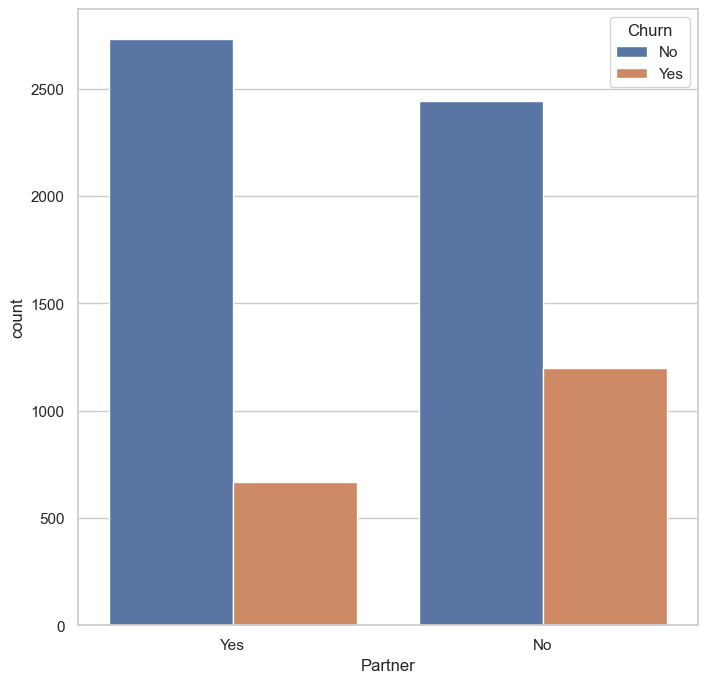

In [61]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(x=df.Partner, hue = df.Churn)

<Axes: xlabel='Partner', ylabel='TotalCharges'>

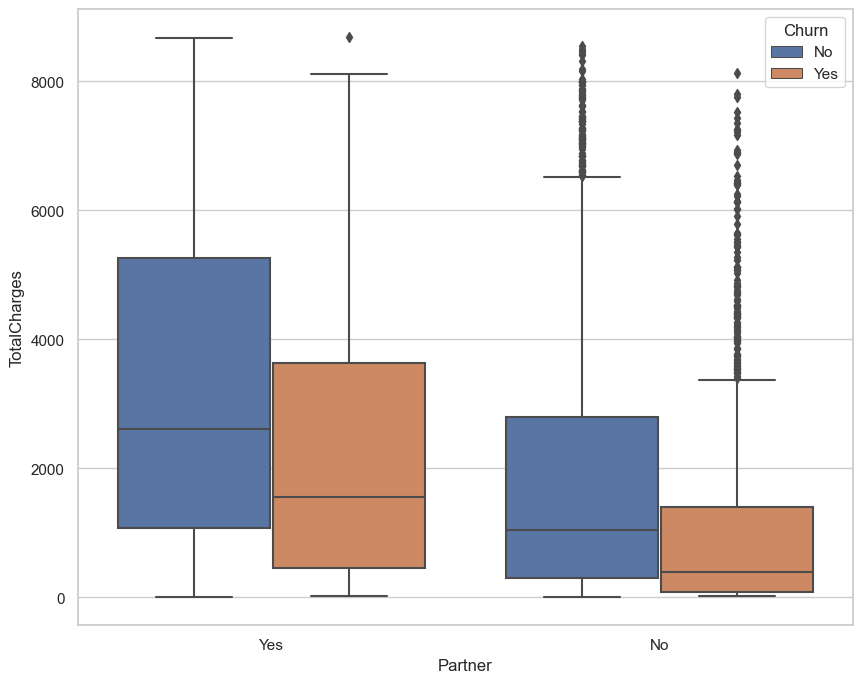

In [62]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df.Partner, y = df.TotalCharges, hue = df.Churn)

Theres is great diference between people with partners and without it. People with partner(married ones) spent much more money in the company and stay much more time. That may be because they have family, and talks more. They may have children and busy, so have less time to think about churning.

Let's confirm that possibility!

<Axes: xlabel='Partner'>

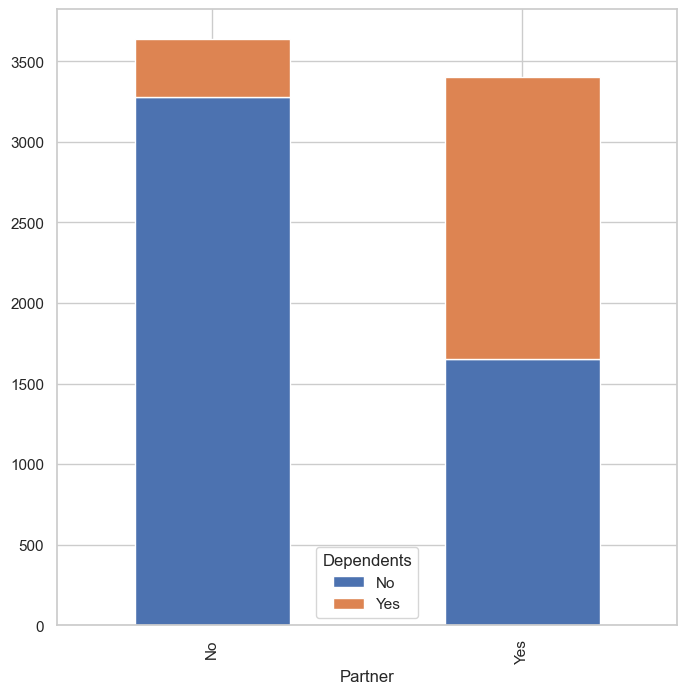

In [63]:
pd.crosstab(df.Partner, df.Dependents).plot(kind = 'bar', stacked = True, figsize = (8,8))

That's right, people who has partners, has more dependents(children) than the single ones.

<Axes: xlabel='tenure', ylabel='count'>

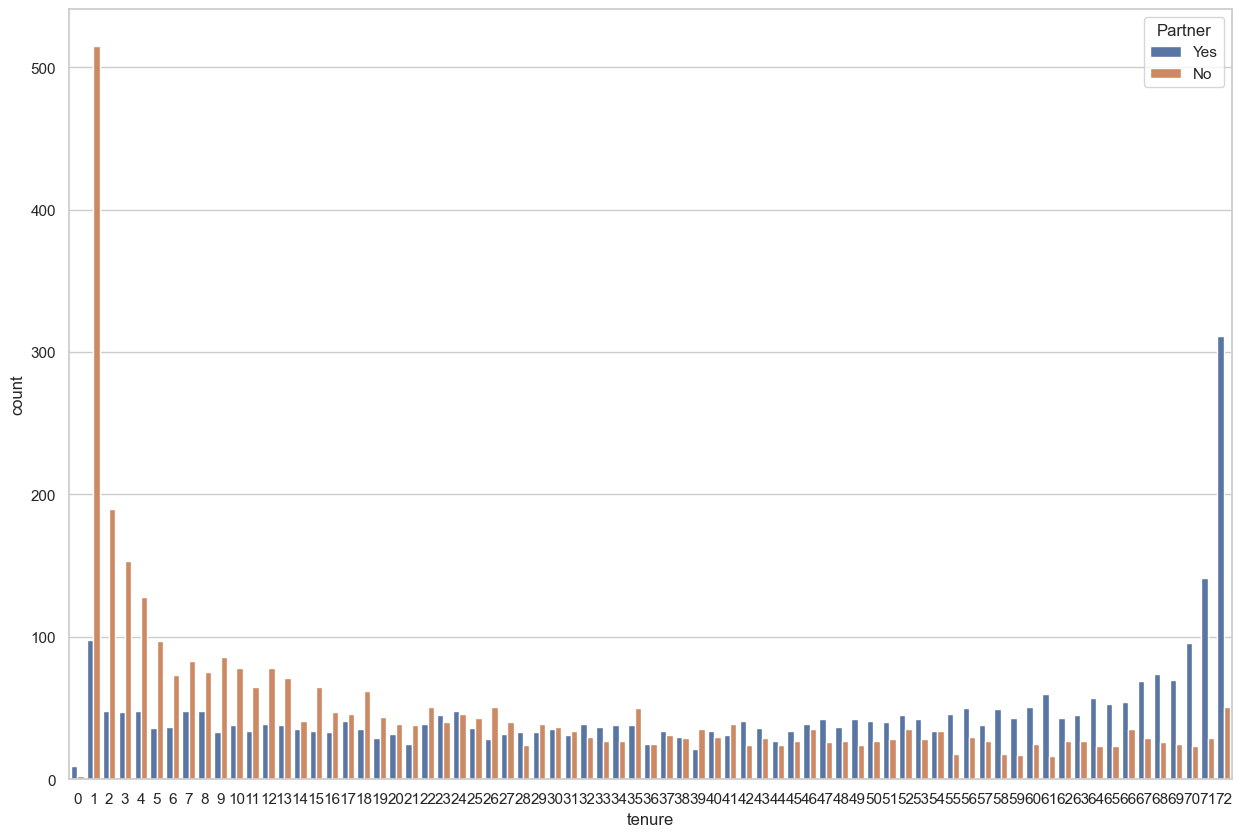

In [64]:
plt.figure(figsize = (15,10))
sns.countplot(x=df.tenure, hue = df.Partner)

Tha above chart, confirm that people who has partner stay more time in the company.

So, that's the insights of this analysis:

* People with partner are very lucrative to the company, cause they stay more time and spent more money.


***OK, we've got some good insights exploring the demographics atributes of our clients. Lets take a look on our products ! Which one is the most lucrative ? Is that the same with the higher fidelity ?***

In [65]:
df.InternetService.value_counts(normalize = True)

InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

21% of clients don't use internet services. Would be a nice idea explore some ways to making they use our internet services. Maybe using some clustering algorithm to discover especific characteristics to use to our favor....

From here, think that is time to slice our dataset, lets focus on clients that use internet services, but before that, lets take a closer look:

In [ ]:
pd.crosstab(df.InternetService, df.PhoneService, margins = True)

Clients that dont use phone services, use the DSL internet service. Which means that Fiber Optic is avaliable only for those who has phone services.

For those Who use phone service, DSL still an option.

We are starting to understanding the company's product strategy...

In [66]:
inter_no = df[df['InternetService']!='No']
inter_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='InternetService', ylabel='count'>

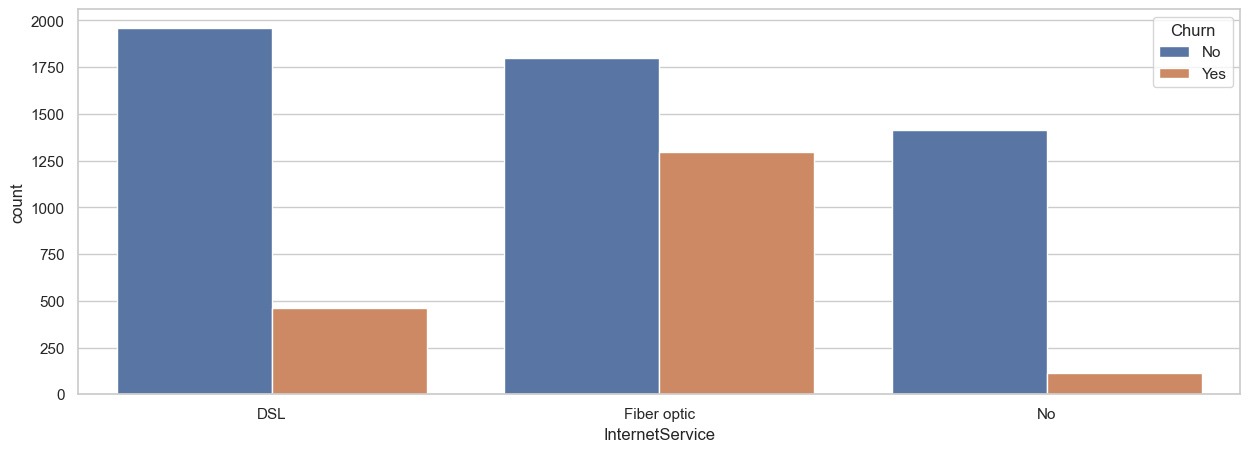

In [67]:
plt.figure(figsize = (15,5))
sns.countplot(x=df.InternetService, hue = df.Churn)

There is a huge churn tendency in Fiber Optic Services. That mighty show a great insatisfaction with this service.

In [68]:
df.groupby('InternetService')['TotalCharges'].mean()

InternetService
DSL            2115.411338
Fiber optic    3205.304570
No              662.604784
Name: TotalCharges, dtype: float64

Of course, the fiber optics services are expensive.

It might be interesting to know the average number of months for those who churn

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(16.819444444444443, 0.5, 'Number of months in average')

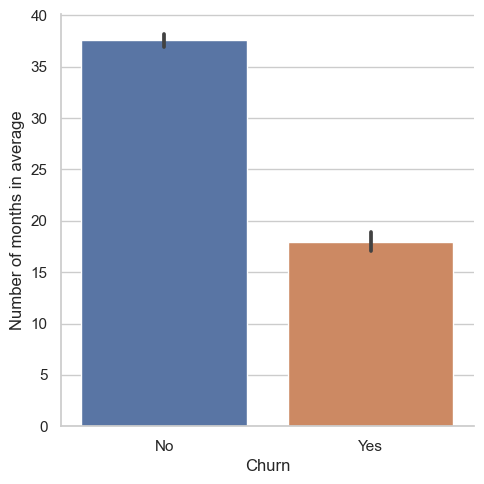

In [69]:
sns.catplot(x='Churn', y='tenure',
               kind='bar', data=df)
plt.ylabel('Number of months in average')

In [70]:
df.groupby('Churn').mean()

TypeError: Could not convert 7590-VHVEG5575-GNVDE7795-CFOCW1452-KIOVK6713-OKOMC6388-TABGU9763-GRSKD7469-LKBCI8091-TTVAX5129-JLPIS3655-SNQYZ8191-XWSZG9959-WOFKT4183-MYFRB1680-VDCWW3638-WEABW6322-HRPFA6865-JZNKO5248-YGIJN3841-NFECX4929-XIHVW6827-IEAUQ7310-EGVHZ3413-BMNZE6234-RAAPL6572-ADKRS8865-TNMNX9489-DEDVP9867-JCZSP4671-VJLCL4080-IIARD3714-NTNFO5948-UJZLF7639-LIAYI2954-PIBKO8012-SOUDQ6575-SUVOI4667-QONEA8769-KKTPH5067-XJQFU3957-SQXML5954-BDFSG0434-CSFON1215-FIGMP0526-SXDJP0557-ASKVU5122-CYFXA8627-ZYGSZ3410-YOQBQ3170-NMYVV7410-OIEDU2273-QCKXA0731-EBJQB1891-QRQSA8028-PNXHQ5630-AHZIL2673-CXQEU6416-JNVRK5590-ZSKRV0191-ZHSKZ3887-PBQAO8108-UXRQN9919-YLNNG0318-ZOPWS4445-ZJNMU4808-YNLEU1862-QRWPE2796-NNUFI3016-KSVCP4767-HZZHQ2424-WVHPL7233-PAHHL6067-NGCEU9848-JQJTX9803-FTJCG3212-KXOCR6380-ARCEH3679-XASPY7123-WQUHX5386-THSLQ6180-YBIQI6728-DKUCO9750-BOOHV8597-CWYHH2848-YXSMW4549-ZDQYY5712-AHQNN5256-SKJGO3071-VBYPO9560-BBZXK8402-OOOHJ9445-ZUEQE1091-SOZGA2928-HLDBA6497-TILVL7219-TLZHO4622-YNKIJ6734-PSBAW3930-ZGWVE2639-UGMAZ2876-GZYZC8587-XYZSF7799-LGRDP7850-VWJUU3774-VBNXY6217-KDYWC3146-MSEGF1095-WGNGG2636-SJDOU1131-QQZEB5716-EZXZN6837-BJYDQ6440-DKQGE3466-BYAVD3780-YVMFA1679-JRFBR9073-ZZIAY3077-RSNTJ6551-GNYDG9167-APMXZ2749-CTKAJ6371-NZYEG7554-NEWDD8992-VONJD4482-EWFMI4648-YPBTM2907-ILJBN6345-FZOQH5997-OPVFA1159-WFSGR7654-YWJUF6727-IOTLZ5918-VUKWP1744-JHKYS5947-SGKCL3712-PKXZA6582-OIVSP5524-KHNJP4827-USJHP8167-GJLRN0956-SYCWG8017-UVSZU7100-FQPRV2984-RGEYA9680-NIAUV2146-EGVDT2604-IJPDU9178-JHUVJ6168-YBYNP7255-SSFBC3645-DEYGF9323-HGFWY8544-GOQSH3363-DTIVD7018-WBJNK9142-KZXOP7674-YTAFD6348-SNFUS1347-KTTTA4195-NZGTA7157-SMCFK4709-LKHYG2504-DSHIH0699-NDKJM9286-BHDQG0230-WEQUW2040-LDIWQ6496-JDSSB4443-EMBNA6469-MRVET5961-VUSRV6778-JFCMK6341-JVQGF4811-JBUVU0945-TSONX2651-ZCBXV3316-UWXUY7083-MIOPC1984-GPTEH0621-JFHOL9903-LYSAB9227-UAQFT7301-ABVAD6614-FHDBO7576-ASEJU9058-HRZSV4522-AKYLR0221-WMXNQ0303-UNCIP0959-WHOKV4075-JFPGR3282-ZISZV3675-YDUPJ4111-BNXIF7017-VFHAY6655-LHBYW5046-NUHWD7529-ZDFXI7605-BDWDC1950-KSVVJ0123-CRBRT6292-TOSSS3197-ARFOY7014-ZZXAW7633-MVPUY4716-HHKQH3179-GBRWV8645-KWHJO4130-MZLCC0314-TKOSI8229-MYEJZ2080-SRCDE9577-WJVCQ6202-DYYFX3808-HFKDE3727-OWVYD2294-SALNE4847-TAJYI1563-IWQEX8203-XJZRC6556-DBKZF6851-WEFYX2985-JUUBZ0895-LMRSF8266-VBFQL8181-YHCMF2240-HSJQD1248-DYXUB4115-BNPJY3167-SNQPL4091-TVOCN1098-TDVUQ7277-OZCGZ1557-EMYVT2799-ARNLO5027-YOCXN3973-SKMLN6745-JEFZB9880-TDQAC8705-WZCYL7102-JJVTX8626-PTQGE4983-CLMLV5701-YVSVF5697-GOMBF2739-CACDQ9385-EHGDO9498-FIMXL2379-GYFLQ2088-IEBAU7982-VCELR6035-BXTTY6885-PKOAM7520-HQWJU9639-BUJXT5924-SNGKP0021-IKXGC8966-SNIZF6243-OZGFH4654-DLAMQ0513-RBGPE5160-UXJED4115-NZRKS3351-NGXYI8984-EYLLL9833-TGFHX9294-TDIPC5229-DTFYB0104-PPXDV5176-LMJXE3583-KRKMD9069-LGEUL7302-ZHMHP9571-EDEBV3520-FJGCV6563-VRERX6122-EFVKN2805-EDJPQ6862-CQUMB7156-MXBJE6158-HDPXZ2863-IMQDR5686-CMAWK5651-CRHKQ8204-YJCLA6583-SZVGP1708-PBBOA8782-LKFPK5522-JBWMO3597-MVHJT9774-NRNAU0224-RLWWD9967-ATRFS3951-NJCVI2977-CEBSX0177-PXBAT2519-ERQOJ5876-QMYLD2277-AXSDC9442-JTWDL3067-SVMTC5495-GPSRW7606-BPHHN4742-DRORA0111-KLBQG4163-NCJAK5233-AOZUF5973-EJGDP1996-DBMUS7916-VCCPB4686-GEFRM5249-QYHEX2233-FAGXV5605-IYGFG7663-ZTEGJ3935-TBRZZ8111-BKVDS2055-SIFSS2806-MLNTI8734-DKSTZ4360-PNRQB6152-ONASV7781-HVGMK2181-UAESM6048-NJXHX2320-SLKMB4980-URKXC4376-KFVRS5886-VLQVU3577-AMVUX0771-WLCLA5628-RKIFK0206-TBWLC2937-FTHUR1910-FMXJM0732-OCQOC5168-MSWXT1090-ESELR8592-PLTMQ5760-WRAHC8847-GEOOQ4785-FCIFB8313-NDOIA5149-CUZUJ0942-KOWSM4237-CLSMM1452-VOQCH4719-UMSIY6614-VBEGU1480-BKXGA2996-XAUVF9076-AXYIK5968-XQIVE8896-RAZCR4933-IKULF1304-BCCFO4104-PVRPS3780-DDGSE4431-EDMIQ0486-LGCCH4612-SSVHJ5168-MQQCA7971-HLVXI9094-AZPHK3649-JPUGY4472-LVYGI3552-CTCYF6778-YSNIH5756-OZRIO6579-JPICP4134-BSXLX0505-SPOOW4374-YMUSQ4513-CXYIX3957-HHLMR7803-XOCCZ5736-YEJAX8981-FJGLA1135-LMECX4332-MUOEZ8535-SFUTN8677-HDZEE2475-MROZF3482-ABPKK6705-LXORM7531-GQHME5174-ITUMV4109-CYRBD0913-XWSCN0750-EBAIU8606-CIQUL3571-DPYUH7601-GNDYK0356-OBMAC8067-NIOYM1403-GYAFU4234-XTNEA1297-VQDRP5348-CAGXB0621-HJWXJ5844-QVTAT8905-IAZPF5394-MEITZ6859-QNXIQ2782-LFZVW2866-IKBTM7129-AZJDE2560-PPCHE4676-MQUEA8138-EALND3580-HYCSP1352-HNSAW2075-PUEPR1982-FEBTD5791-KAJFD2654-VBVPB1154-HYWWO2501-XWWTZ3716-UVSPD6815-ABQFQ7343-EOBEU3701-SFMUH6103-LIANB7319-VENRZ5846-NEQVZ6967-QIQRV5781-RFZRP0308-IVGOK7293-LSCDV7025-WCBNE5756-JYOJT6030-REHUX9548-LIGTA5150-LJNSR8270-RKSAP6522-YRBXD2640-LYMOV1423-BMPBQ2393-DIVAI4568-KNYWR8752-IMQOS0742-LAFQK0795-LAFGP0619-OLYUR5512-IDZEI0459-SPZHJ0215-BQKGS9244-ZVAPM8208-EUMTE5172-MIGPM1710-RCXUS0374-FIUCA5839-SUYVZ5173-ZXXXL1096-ADRUX2001-MCUUW2731-GJRDG4723-BEGSG6516-NKQBO8672-OAUPW8207-DMRVL2804-ETQDK6689-VRRTK7138-GIRSH9396-ZSFLL6464-KEXXH7134-MJPDY5240-CAOYT4059-IIEBK4881-JVQOD0516-UXRMT4851-BQDNX5148-HKFIR3003-CMDUU5016-IBERQ6797-UCJHZ2469-DTSGX9931-KGHOA1775-KWJKQ7665-VIGUD9411-TPQQV7954-MLBUN2077-DDHJK9574-BOSMD4908-XAXAY8404-VLQFB2391-IPLOP3509-GWQGF5845-BZZIB1140-UKVZG5183-SNMJQ8100-PNJMH7838-LAZFO2085-JVGAD8095-WANWK3030-ZKIWL9565-FLVCG8755-OGKNA2800-VEQXM5533-RJFTJ0214-JHPFW5642-MHDQT3088-FVYWK9092-GDZKO3729-OWRVL2324-AALNO5760-IFJOZ2826-UWHIS7501-IWUNG4957-TREIR7251-LJBQN8040-MNRTF1536-HBSWP5313-FPXWG0946-FKYTX5076-YVXCM8262-COGGB6663-JOCQO9620-QJREV2682-KEVRP2480-JZOSN0078-XZMHT9978-HYCIN8338-QIUNR1525-LNLOJ9450-TRJUU1766-GKNMI6942-LBFDP1456-TWCGB7596-ZYWBB8329-UTMVM3014-WJKSM3347-YJZZE7929-DMBCV9661-JALZV5433-KYGHE4312-KFRXN5575-TPIZQ0114-IGABW9944-AEXBM1853-ARAAQ6952-OMNWB4697-LUPSU8434-VGEQQ6549-YMFAW4950-HKQTE6786-OBWQR2753-JMMCV6621-YOBKI1216-JWVUX7564-GHCVB1173-NOEYG7595-EHCDL6647-ZEDXT2521-NPUZR1307-TVUFB7503-MIOGA4381-MHQDC6923-JHPMP4018-PPNDW1635-FJFCC2499-AJYUA6919-ELBGL3966-HRMZA6425-JWTDV8405-IGQFX8224-IVVPA9477-LGWQI1410-RSCMR3115-CZMZD0139-IVFJG5730-DBDSI0030-FNXPP5684-FJVYR4013-GUXND1266-NZYUI7969-FFOWG4718-DHSMV5175-WLYXL7817-OMJNA8728-SKJLR3137-NYQQI7706-DZNKK8823-RLPWL9505-SQFSW3758-CKOQL5676-CFLYY7521-AFHAB0285-INHLN5125-CNDSP4992-LTJNE2202-OUTMO0810-BDHAW0229-LFJAF7131-ZQZNK3442-ZHHCC5726-CVNYA9871-ELEYA4257-GAESD5173-WXOQV2040-OBMLJ6286-ZHAOK3807-XHCJH5671-RQRLP8859-AXJZP3174-AKMAS9926-PJHDQ7382-DFJTU2798-NYLMZ8098-TDCBU3551-GAEGL4785-NKHCX3196-NVXLZ0036-IHMOT4178-EGMON4220-TINQT5318-YKDPV7975-TZMLR0295-QVKPB4335-BSMJS9146-JRIOX5337-IIWKZ9650-VBUOG3487-EARAT2672-TGEFF4250-WAROZ8184-WMOFI6092-QZVPP4625-LAMOB0392-BZIUW6549-NNDYT0422-OHQHQ6916-HIJSE2316-ESMLS9778-OGKQZ7408-OFWXJ6007-TCTST2252-NKNSI8713-IGZSO7905-TVXTA7695-PKLCZ8374-UULRV3224-DFQNQ5275-PMFUT4795-UXVCJ9777-IQHWP0979-MOZQI2732-ISEZX0323-XWWTN1937-OTUKY1573-LGXBA1764-VUUMT4713-ZBURT3050-GBUSH7876-AEHIG7945-HLKEA9342-VNIMQ3523-BRGUW3199-NPKCN5170-PTRKA4661-NJEUX2123-AGEEN1258-YMZNM0048-LUMLS5898-IGSLP6259-WJQLC7997-EASSD0730-KOAVE8975-SKGRX0678-RLHVP2267-FPIMA1051-GEJLJ5285-MVEHD0379-DJQHR5543-QDCRY0297-RBCSG4694-PHWFW0835-JKADZ7508-SMHXL3865-YIOTT5993-BQHEA6024-RUGGH3956-CJUST4079-WWQQQ6103-BOCOU5149-TGWDZ7471-WNSUF8942-DBMHZ4301-VVZKA9199-PWQVC4824-GUCBY5393-HJZSM0862-PRCBS8812-ZRHFP5146-CBVOE0454-OKRCT5787-KXGIY4198-VFOEA6630-UJZMY5709-LVOEQ2692-AQCPF0347-UBKUZ0835-DUUIQ0811-GSDTP7567-ECMCM6115-ZTBFQ6353-BRMMA6231-WFGFH9904-EHEVJ6169-PPETC8584-KMVXD8467-WYNSR0851-DFJKB5382-SOYZL3261-CQXOL8388-FYNPZ4002-BQWPQ5651-YLPRD2826-DXLQO4378-BZYFP9489-UTFKA4849-PYRLQ7764-BDPEE3429-IFLEM5002-GCQFH0556-FJEGU0604-THJFP5879-SESNB6461-PPAXN3318-ISQFQ1106-HRLKZ2483-XSSMZ8165-ZJRNM2604-XVDAM3717-OFRTN9046-JBFWA3280-NMUVX1206-EHBDD8361-LBRDI4883-KCPZJ9108-EQPNQ7277-KAMWT2545-LXYVJ3234-VKACU8120-JDCAM8917-FAEMR7047-YXDMZ2858-EIMXH6419-ZTTLE0929-HYQEW6614-YOLAC7426-RHZGU4065-JJAVA7649-SIJJF9361-YNQWJ3748-FVMZZ9391-TTOYH1452-XRSJV3422-WJOYD8242-SOQUO7460-ITWWP7147-AYBAA7868-TMWMZ6732-FZUGP8329-GWVPJ1352-VHKAJ2632-TACXW8146-QQKZH1767-CJKBA6445-TNRXS4581-LNWUM4869-EPIUS1915-OAKWD7296-PIXQY3354-OADJP3524-WQDSG0810-DHDBD4026-SKKHW2829-HYVZP3845-JHAMY7013-PSXHK3486-NPGST6100-FJZDG4829-ZLJTK1730-VFMWO7143-BQIBA3800-LYTRK9646-NMHXE7030-NJVDP8883-GRDWQ7771-ZONAT2111-DWYHN4194-WHFCB4121-AGSIN9845-PEEKO0455-XFASS0301-KOBTQ1751-NCDLI4367-NUYAO9170-ARBTB7241-AJHFS4546-FOKWR9036-CSKBW5832-TRLPB8590-YFFQO8659-IOOPU1338-CECEE7439-DKZTW4646-QZXTF9742-XOKTS6921-OZMFH9578-FOMUK4712-UYOOI7722-CVFXN8717-VCTXJ7363-QTBIW4159-NAAIX0971-QIFJK9397-TZSHA3391-JSQEW0343-QLUZP2176-LVPNX3312-UUMZW1271-UODNO8461-EFQYM6900-RBKER6891-JPYFF1459-QNFQT1047-NNCBF3696-XRIEN0074-HDKDG8791-GFXLZ9330-DHBFL0098-BOWSO3452-ABWRL5859-HZYLF3156-QLHBO2208-NQBCT1779-PWPMG6621-NRZAK0831-JNISG0774-IFUVM3082-WQRVY9553-DLCLU1641-BYBTK2460-NGXBJ2446-ZKVAF3522-CDKHF1430-SFQSA0411-EZJZE8807-ARQET8992-CEUEN4320-QMLLA8777-PVYGU8292-ITGYJ6870-ZWMNX0621-CXBKL5268-DSMNQ5334-JLAXU6242-MBHPK9359-UGBTK4782-OSFXZ6479-OAUSD7129-ACFOG4189-NAKJS5562-BETPV1282-IHQAC9127-FHJBZ1641-RQDAY6994-ORCWG1346-UFHAX2933-XEUJM5461-QKNTN4835-YSJMR3164-YAXFY0887-WBJVH4660-IRIBM7670-ZBPOQ8089-UZWLX0080-OROZO3916-NRPAP6807-SIWJI8221-HVAYI5232-NXPAY8967-SZQAS4468-KAZHE0455-ENTCR8944-AILEF5542-NKVRU7126-RBHSD5370-IIVVL6789-HJBWG9087-EYCPR6791-YBNAK6077-BDPXA0013-MHZWF8268-YDIXR4291-SHSBH6980-IMXXE0040-HALCW0784-GTUUK2294-DMMUS0872-JCPIB3055-MJDSB9091-WTUUY7115-IRDHS8496-DMZUK2040-VZIKE9068-VPWQQ0178-SZBHO0384-RVBPI1299-AURJA4525-VZCZG1543-LLLFT2788-CJQAQ0319-QZTCO2120-SMPEX0096-FCPUF0668-OGMHD6507-ZJSUR9408-HRXRK5593-SUAOO6766-HFKLA7617-EYGLW9220-ZNKJI2226-ICFDO0723-VSOBE5529-GIBVH9992-UJOEL4741-WWJQZ6625-UTXEW6244-BESBM1004-NOZNR1251-STYSZ2612-PHGOX8480-PPONV8780-IHCRN4598-ZADCK1257-SXUXQ9681-KYGYB7182-OVLBJ5095-ETBRJ7005-CYUIL4821-WQOYN4730-AWNAU3452-FLHYD2388-LAESQ9531-NSBMR6260-ONULR4389-UEFCZ8711-LOBKY8985-OOPOS8800-ZKRFW2616-FLVQC9968-FFVVH3108-PCCGG8390-FESFV3022-BEXHZ6248-TKCQV6729-GDNGC6198-ZFIOJ5989-OMNJE1291-CUOCY9795-SHUHB3230-IUALN0042-RLHYP4945-RVMTE1866-NXPSP3941-XTSKM1661-CZBAU5158-RIVOP9788-YTFGE9277-JOOMO1907-YLNYW8947-YRTDV3161-ONRWK0114-RSRRW4565-NLZBV6682-VCIXC6475-VHUIZ3910-MRQOY0661-WCQNQ7537-RBWEA4656-CAURT0121-SNYRK3733-LSYCE6265-FRMTQ1371-DWPAZ2017-CCBLH7690-KPNCU0536-BGFMZ2293-IJWPS5469-NUJUR2625-TRCZQ4102-HLENU7266-GSSJX7722-VJRQD7073-QETQY5624-RYAMH0196-JTUQI7130-YXBRO9272-LSVYH3084-DOWLE1084-MNSMJ4238-HFHSN6250-CGGUN5478-JJVZK7596-IIWYC9793-WECQC4291-HPAXL8999-YPYBV1839-FBNFR3071-MVJCD1697-BCSHV0562-KBDVM1131-SUEKT3717-OEAUQ4538-WNTMJ9432-RUVSL8060-HIWJJ7684-XSZIY9089-UOWJG8039-ACLPL9885-AIBVB1934-MKPXS2592-YKDIF2272-JKMSI8714-CTZJW3569-EDBPQ3131-NWVFJ7521-YXVZY2373-NTKOD1970-KKFWL9337-SRRNI0895-UADGO5678-VFNEQ5977-CKHON2692-BUCFV1830-GGFNM5302-BDJNT5223-UZAVK4859-ZSRDZ5651-WYIPH9350-VLHMB3498-LZGQZ8785-CJSHH3870-SPZSI7560-QRBXH7077-XJMET8752-GHJFU6896-SRVYQ4652-ODEVH6510-UPNKS6718-BDGHG9046-DQMTP6439-LAJXL9052-VKDUW1666-JZPZT5777-KJIRB7677-SJJJK2480-EJWYP3253-HKOKL7055-HNEOJ5514-YQENT3211-AAPKX8445-DNBAE2958-NHPPS6806-YDEUL1735-XMJVH6890-PFRQX0222-CNVPT5899-OUVKV8681-ICONS1621-YNCJH6362-QHAFM3070-BDOQC6234-PFPXL9824-QCJPK4283-IVYCI1866-OBPNR8205-MQUGY8970-ANWXO9480-BQJEI6979-TNDEU9777-WJJPR9495-SKLKD6048-UWKAL5067-DGXLL6281-FKEWS8898-KASCD9242-TKFSV9290-SHCMB0743-HNPFG2277-BKJKN5035-PGZXH8695-WDYEA6543-JXSOO8016-ZMGMO8605-ITULD6416-YJTTB4472-VESGY3195-TQDZX3128-YOVTD1728-CXQBE7041-TXQJH5014-GSOUQ5724-BIDBU0481-SUMCB1769-GRUIK8819-WFGGJ7427-AUFPY2811-POVEX7898-PDWQE9972-EWRJS9314-IJWSQ5799-JRCZO1921-KYSAY6198-RTPMF2924-KHUVI1925-GMVBW6184-DYUOB9207-ZPANB9327-QSDED1656-DRSMG3012-VFFMN2984-AFWNC0640-YJTPY8096-LOIST9764-REAFF7107-UBYKY4881-GQJTW7876-DNYAP7905-NJMXS2882-WDTBA2091-GPPIQ5071-FBJFS2796-UUZZO2429-AYKKO9798-OPFEM3794-NFNCH5193-QLVZB7114-AEOZE5522-NYKPB9957-YODKZ6518-KZXCB2245-ADZFJ7776-QGYJC9313-QOLTZ4672-FOTSD9818-XQCUV7338-ERIVA8259-NFJTV3223-DWFIO6968-GMKPR4751-ERMAN1436-ZMJAN3292-PBZEJ0799-DDIHE3070-FNFZQ2812-SFXMJ5014-WUQMG5312-TSZVC0993-OSGPT7108-DGVUU2782-JEEBU5127-BZENZ2720-FVBQP9906-NHHVC4522-XRWWI3766-EJLFL5939-SXWHM8152-UOBNY7351-KYHQH7643-RCHXS8246-SHFGA0620-XEFWH6485-QXWWE7321-VGNKU5327-CNLUQ7552-KEYGT5816-JMLGY2927-QRRQV6265-SXWBU7941-RCJOW6374-NTQLP2387-KDZQY3584-WKTTW3399-BMLVW1971-DTCZB3374-PZLXD3813-DHBBB2812-REYAT6518-PPLMZ4939-KYYPY5930-GBIWP6022-KOUQO2361-UPSND6035-RIIOM9504-DSHWM5035-BVCXS6267-DCFFZ3533-UVMOM2439-LYPMQ1478-VPOAD9995-HOTOH2988-PLAHS1371-OJCEK4999-IEZLT8883-ANODQ2351-RRBUE5980-BDHPY1498-DQNRX9469-WEJBT2581-VKIRT7426-WEIJX2851-MMUTZ3307-TLCUD6625-FLENO2967-MXRAV8189-HBVRW4163-KIUHY3500-NSDOA1171-TYKUR3761-FLYZI1219-NNDDO8388-DMKAE4403-BWPAY9659-QEQSY5405-ZMYXQ1442-OKRJE4737-AQCPU2808-CHTDM0793-TWELN3283-WCWXT1060-ENTOF0999-QXNSA5451-MHQOF4836-WNFNO9225-BZLNZ0354-VXMJC4422-QVIJA9365-SRSZE8332-OSJDW4735-BJKOU0274-JKUJR5740-YHGTW8917-SZTTJ1696-MZVAU7359-WWYJV4906-ZHGPK3795-GWTRD1298-PHBTI6223-DHJGV6961-MJKBO8158-WPEZG4918-FYJNT0727-BNRLG4854-CIDCF3280-MRDOF6435-SRWBJ9964-WBQDJ6303-KFWSL1702-CCFNJ8932-CZHRQ0386-CWRGM5515-RUGKN0404-AHASP7279-NMVJC2081-VEYEH6407-UTSLV9060-HJJRW2587-YNLES7398-SKNQZ5935-FCCNB1958-RNRKS5136-RGMZO8345-MVDYC8226-BXGES9705-IOVQQ1015-OWJKI2040-XBAVJ8887-IPQNC8646-JCOMS1222-KJNZD0106-GHRQR3768-VHXQO8952-WCVCD2418-TPEUN3963-RYFNS8540-ZQGEA1320-REHCS4137-JOPHL7801-CEDNV2057-BOYKM3658-QQJYD1803-BGNBD0134-XWXCE6950-TWMYB5848-FHRFC2243-FNMMI2511-MORQY5356-KZCKT9470-XCCEM6519-CFDBX3902-MIVLE0409-WTMPL8763-KIAFH3669-WHAFY3055-VTCGS3144-KMTWZ2007-QVGAW5207-PLSTK2307-FYNNL5605-XNWEN2155-AMQRX6181-AXXYF5091-HFAZW2519-LBNQL8623-ULFNQ1568-LJSZU7789-HKSBS7416-CKTEP2586-CWXVV2348-KCJLT8401-EMUWF4193-IBKSW5377-NDTOU2474-LCNUE0839-QNXME3506-OVLKD6650-VJONK2178-PMGCJ7492-TAFJD2773-MADBQ6016-LVTJQ7860-KSUGX8966-KZXXA5149-QYTTU2070-XYMFH2085-BOJKI0817-HSUSE5442-PPTJY1927-QEWMY1663-MHLHE5663-QBGIS4450-MDZFX6701-DHKWQ7554-AKDQF0794-YVSGE5423-BHIXO6908-VVYHM2959-EEXWB1839-UMACK3030-YDNRM7321-KKSDU3402-XRIUO8286-AFUYI8356-WUAOJ8058-DMYRU9350-ZXYJC8958-JPTRR6959-GQEGV3173-WSSUE1265-HVPZB4115-UMJFQ7369-TRPFD1098-KFQEC7190-XHTWJ3537-RYBHH5296-BFCYD9359-JANWS3279-DYZQM0523-VNGTF9575-IWCAZ7105-MXJLL7064-FRRSW7940-UQQUG3961-SXAXY7010-BRBUU3566-HJGPK3062-ICYZQ9938-PRCVK0973-KYVNF5129-HHMZC9637-CDTKZ3946-JEWRQ7873-CVMAW0463-WZZKO4524-QCSSM5832-EXGTT2039-JONDJ7217-JYHOQ6695-FRVEC9894-QMIMJ8069-YQQAJ1636-NTNCO3466-WAESX9281-PKKZE3638-VBZTA7459-IMVYU8563-OYMQY0754-EEBDC5777-ZPQNC1951-IEYXM3318-NMQXL1022-RKXDR2361-FJWNO2272-UOINI8232-UTFOZ3750-YHRYO6637-KYRCV5668-MEISB0129-QMPDR7188-CBBBA5356-CSVSQ3221-CJMSG3219-JQRSL2801-NISEI4623-ZKHLY6732-VAILE8201-AAXCB7696-CFTAT1845-CSBRZ2123-VSCOT2018-QKYGT2792-VPPET7409-JURKQ3247-MHJKM1964-SVLEA7297-DVYGA2239-CGBUZ0854-UYHZD7243-LCGGZ8267-KFGYD4890-VMUAV9261-WDCAF3764-MNMOI7442-YGZFK8229-BUJHX7449-HVPIV5504-WSIUR8466-PZBLH8735-IJJEG0564-MUUQK0701-RFGFI0019-EFAEP5619-PTMIK3737-XBQDD5882-CMAZQ5846-QFDFI4445-KWOKW3511-APPBJ7967-HYCDE2430-RRYUW3723-BFBGR5447-WZAFP5110-CHOPY4425-OWHWB7892-QVYKW9675-ICXCT4703-MQYKT5692-ICXLW0602-DDUML2208-MPXIO1960-UYCNN3190-FZATL7336-RLLRH7710-JSYOA9885-MFVSU0607-MVMGC3365-SAIGS8022-BECSI9993-LHIEB0266-CLZKZ7020-OZKXZ3977-QCRSL0017-DINOC7639-OPLNG1492-QGCLU7328-OWMOM4418-LZMSV5155-AZQPB1087-GRUYI2546-KZAAT0181-RITDD5989-PGKJB8272-ONJLV1488-PBLJN0308-GIQJT3778-FOAQW4452-ROHMO3090-LETTY5349-AZPEW9720-JJJOR8100-HZZLJ8775-ERLNB8309-IEYJD7398-HPYZQ3546-GHEAE7361-YPXFS6557-BZXLQ2550-QHZGP7519-JTWQH2538-OIMXF8543-MSDMF1170-SASML4872-JCVCA5346-BZCHP2038-LLMLM1216-BGTSP4138-NAXED0744-BIKKF7483-IQWIB5248-KWLAR7996-MHXLW7833-PKIHD7061-OVMIM5153-RTHKF1852-QSWCD4832-VRBMR9079-LWTFD3392-EHMNK5986-WWXDV3061-BCKYI7901-TBKJX7228-PAQPD7746-QYVCO5804-HYIEZ9919-FZDED5934-TSSAU3486-KHMLI6784-XYJAE3933-DQPWX6661-EIPZC8957-THMOA2251-PYLPB5555-RNPGT1057-FOGLZ8087-LGYHQ4137-BTIKL2190-BCXEC6227-FBDXH2911-WDXMV7206-PQBBZ4547-FZJWE7422-WNBTY0842-IWYCP3521-HTQTV3744-ZBHON3373-DIUUN8383-SGHJU7607-QKKTJ7707-PYBBH8984-HPEMB4139-DETXS9779-DPNEJ9805-FILKB5793-YOLJN0673-IGUQO4123-FCVCB8819-IMISP8311-UEUAB5858-EAFCZ1163-ONYEY5656-MJEFC6082-OQFBA8974-OVACP4010-YLMVT1379-FRVEB8612-GXIDD6288-CHQJB8160-HOWOX6648-INWPS4223-BKEOR4079-VTGLK1763-WQFUK1391-UBDAR8894-JVDCV2023-VQFDL1345-GKDZZ2014-MKGMH5628-FCGYG2560-WBWXF0248-IPDFW7978-DKUQH4335-UPJSI1784-EZDKJ9297-FVVDH8007-YYPWD7101-HRBLJ6635-CPNUN5453-YBTWV5039-LZRQT2931-VUVJN6418-PIQSP8220-OCUFY3995-WFCSM1895-QTKDO2038-OEQZH1178-PZGAB2626-VEEWG2878-RMWXY1657-DYMBM7311-MQJCH7375-WMVMT1136-XGEQU2530-FMFXO6844-DZKRF5970-GHJAW8879-XUAHX3689-MOZGR4195-PNGZS5003-XZWWO7622-FWGEW6922-NCEDI9891-NQDBD6131-IUNXN8548-AWOFC9798-DRYDS8532-UEFWH6296-DDOOR7951-VRDVK4815-YOSUK0380-NEAVX4365-MSDYN7036-TYDEC5802-ADBRC8076-FEZKJ5197-YPYBZ4312-GVYNH8495-LJDFO0839-JTCUD5494-WOZRZ1302-UHBDD2234-EOFPT8619-IJNDK8378-LKJAF1153-GNOLC3298-QEICA0788-DXBFY3597-YASZG3496-LFSZU5242-UOWHD6479-SZPLM8097-VBQTZ4500-HKANN9917-KWRBE3420-ZDBMA2212-LYASK1393-IMKZG8069-RHUXK3398-GCPMU2908-WGAXL3378-AJRAO1013-QCWAM6050-FFXES0362-RAOQO9554-DFKIC5527-ACHSO0829-DDVLK1399-UBQIU1813-JLKWR0336-PIKEI7322-OCWHC9537-VHDTA4957-TIALW2054-PJOCK9150-HEPMB9030-QGZNL3126-WQMGH7176-WRTNX5732-IKGQH9239-GZHZE7205-BAIAD0093-EXYQL8064-RAVOH0219-QAERP9168-INPSZ0015-UOCOJ5334-AFQJB2754-SDJRD8963-JLGJT1465-LNTLJ2135-DQWAQ4056-QHXHZ7401-JIXNM9339-FIIJL4706-DGAHW6670-MFRPK6177-PEVRA4813-HQMGZ7579-KKLOE8402-EIVQS4947-DSMXK7245-NIIWQ0002-ORFBO3324-OIRTO5414-OFQCB4967-WPNCF8552-OBVRU8499-BRXTD9154-QDGTH8197-BFWVU2577-GVSIL9367-OIUXP6770-UAYGJ6463-HHXJR7928-VJYAB1187-WILMM9776-OJUZI1306-RPWXZ3097-PYWXL2266-SJNAT0869-PAPRP4238-JSSWH2972-YDYUW1104-FEJAM2809-ILCYT5499-ECUTN4981-FLTMF9121-PHQSR3113-IWHLC4277-BWBML0234-TEVTT4304-TSPVK1552-AAGRX2637-FKFSY9796-MVYXX7874-ECPQJ0020-INWCK7089-RKVSZ2683-JXWQQ9548-ZMVTX8739-XNIKG9755-JHNMN3981-QSVQI2789-HQBOU9424-CMPOG5067-WJEUN3450-WXOAT9251-WNSOD6974-DAFLI2616-UUTFK7064-JHXCE7989-AWGEH4373-VVHQL4559-UWIHT7268-IGMFD6650-BWFRT9570-KYEUA6993-YGFJV2712-SYWAY0730-BGQGF5498-IBWPI9101-NTIXF0013-SMEOE9314-QDMDW9308-ANMVE3413-DHLPB7649-PHJVR6114-TCFID3787-TRIAL2573-GYRUU5156-UMKOW1247-QBVSH6734-GMPVK9822-OAOVB6161-ERDGD1226-JZNKR7318-EIVKO3771-PZOBW8231-BSWXX6486-LHTMA4083-BFNYK7389-KBFIT7176-WIONM5141-ZUVBH1089-HDMKP7623-HKYRK0310-SUCIN5197-PYEPU6619-RPLQZ3275-RHRNE3503-TYDAY6901-GOGZG7021-XSNYE9621-OUPYD8982-NHAVY4307-KWMXE0141-YEAYS2450-ZKEED3694-DELSO3893-JRNFS9603-OAIHC1133-KXCGE0142-GVYSN1049-FYSYG8406-LNMHF1821-BUCWY0023-UYUPN8314-DPQHL1465-WCZVT9481-SFCQY6360-SVNWV0567-GGCAC8884-MRNSU2171-UDMFD9050-IKDZA9802-CAQUT0187-WZNAB1475-VWVDO1357-MVDOZ7602-MVRMB1197-BVMVG5406-KGRMX5968-HYJRZ5198-EFNBM7516-GMHUV7140-ADSMJ2230-XTUWL7706-YLMQA2585-KTFRE7994-UYIVZ7717-BICXI6559-RAKOZ4716-MRVEN2143-LJULT3200-MNQTF6164-HXUGH5630-IXDXV0320-DWVTU9135-MGVPY1212-GLHMD7878-JGDKK1088-AUUZZ6614-YWYSC9588-OZDMQ6476-EPYZR1174-FGIFN6620-HVDUJ1032-MAELW7641-TQFHN1552-TKMXS8622-ZLFKO6188-UXBBR2333-KWEWW5702-SKUOB1134-YWTYF6061-GWWAV0679-TDGAK6585-WCEWR9067-YGSCA9067-SQTNS1776-SPBWV8735-SDUFN9668-PUGNU9405-GPBBG1926-QUZNN7016-NVRIC5829-NVSQN9565-AXSMR8869-LIHMK0447-RXSGD4927-WWOOZ5788-YPOEG0661-KBKPA9081-WWXKP0784-ZQJZX3133-PZNSR0722-SVSFK3612-YVGSJ9825-YCXWZ5397-NSKQG8565-HBFNN2000-DHJUY8670-ERCJH7758-UJWYS2050-ONYDQ7055-JCGNI0739-UUAJR4826-DXMUP7285-KLOTR0654-PQKDW7175-NTIXE7963-SHNDT9796-BPKIW0188-GWFLE8129-GMVGI2882-DDZPG3547-LQRIK9137-NOQKA5843-TTHGI1849-RJYIG8868-GAGIO4061-UKJWL5380-XPJNZ8263-QMNTJ3230-JCNZS0277-ORXQS7996-BPXHY3227-WLKLI2266-FUBDZ8237-ULIXL8216-AZUUZ9153-BTBVV5186-PEIZU1074-AMIOH4361-FEBGN7748-UMTRK0380-ZCSBI7145-FEJWU6463-MVYRY3969-JQABI9624-EGDEQ1051-EQPZR5849-ASHZJ5780-INQIK4526-ZJJTM8384-FZBJK3750-RNQKR0962-CQPWQ3096-YXENJ1265-BCFEO5837-LXSDN5945-AZYHT8325-QRPZR6384-VMJHP2262-SLNVK7730-CLDSV1135-HIORI0164-APGRB6481-ESCNL1790-NESIO1550-EENBN8198-RKSZG9297-EONCV1069-QJOEE7799-DSEWS8766-PAFNE5315-CKEQK3130-ICDUP0820-FNRNX0880-FVFWF4611-ANLQC4213-HKBJO2792-LSHWX0014-BMAQU9018-PCIOK4837-QUSFT9953-ZMKSM0907-HQNTS7665-NKLAV4391-LNRXK8250-ZNGGW8562-GHPPI5893-PYOLZ4986-MXSFP6131-FOYAS3027-YNWZU5609-IMCGG4727-MCYZG9481-WHGWY4328-VUFWD3301-LSLWQ7473-ZBDSN3166-PNEOF5639-NTUPK8780-YRMTT5140-FOMCQ6242-SGYTS8166-ORCHU8414-OOEEL8454-AATJP4531-AUZNK4191-XOVOM2150-OEGBV1855-CFULU4878-BUNFV1872-EBWSC7026-YMSBE6997-UVGOX9674-EHPPG5440-VHLUL5781-BKHOP5213-TWWJU8628-MFKAX7629-WIXZF5445-GLVOT3976-HXHCE2466-NEJOJ0254-KCJGT5472-CVMDX6461-SZMCV8150-QUDFX9508-ILZDG2346-DJQTB1697-LYYYX1942-OQFRW9640-ZSLDC4231-LZUYM6128-AQBMT3594-BDSOA5133-VRSAB5996-DAOQL6838-YAUVY0484-JPBRU7883-ROJOC0244-LGNFY7274-CGTOD4295-YURET4635-EJYPD1866-ZSLJM4636-TVXVG4236-UJPWO9392-XBGTD6402-SSEJG1169-SAOCL1110-KYLGQ9929-PLVPA3518-PZXZQ2371-JUNGC7693-QPEFS0924-BJCRC5074-FBGHB2351-BKRZW4455-BFSPD3948-KXDUF2323-ARSVR0815-MFZGM5480-XTFFL8295-FHIVV9086-YJYXS1179-INLAT7909-FIOIY6351-SCJKT5468-BPMMO0197-PNKNK2439-QKJUL1194-SPVSP9534-NSXEM8929-KSWIH2250-IVBWA1810-MVMAI9506-UXUSK1229-RCALF3572-UOLYZ1429-UYJSV6366-XIVKZ3470-OBUET2770-NSVDG9375-MHRRS4860-YZGZM6599-GZWCM5533-NHFRF7037-MTYVW4760-THGOT4016-BJKTZ6584-VQMYT9838-BFCQT2790-XUYMV0581-MDMPW1023-BQXZE9163-GHAYE3904-UKFRE5353-WILCI0058-EVZWM7009-PCARS0519-DRGTI1017-FBQMM1985-MBRYP9372-TXXPS3259-QMXUN1015-JPFYW6645-MXQJT4360-QRAVE8433-WPJTV5804-JMYIO6484-LATFU7599-NTMDP0536-ACXIP0936-NQLJU1575-KRZZE3251-YMVWZ4884-LEVMQ8857-CUPFQ7610-TVOPG3638-DIMPH1845-ZLLIG8559-WNQZS1699-UOTXU0635-WKOLD5993-JSUWV4518-FZBSX5387-ASZNZ6988-CJEYV3097-FQTVJ5465-BUBFA7299-GNVPL9743-DQKQW1215-VFYVK9371-BITHB9093-FPDLG0541-FITGH6985-HAYWX7508-KBIMB6838-HVLXG2277-DJJDL1897-OKVMW5485-ITNPC0233-FTHAV4644-PIZRT8922-NPKBJ2740-TVLFN7771-CFQRQ9512-PHSMG6963-EZQEE2452-KDRRH4146-SVFUD1564-HJUVY3617-XLSGQ7517-LDMPS7244-KXYZN5226-NOZFC1400-WIVLL8148-NLEGT8347-GDTMP6746-WAUWT0428-IKYCP2187-PKZAY4003-OCTMP6652-YFFJO7225-IILWY5248-RPYWW7923-IYJWY3170-GWYKC9830-ECLEN2668-TZSPS7446-SFAOA9522-ZSINC8234-GSZYK6505-OZNPG6164-HAQTX7765-LWVVH1658-TJVOA0953-LGOVU4692-NNQRU7742-MYPGI9619-GSATL5622-UEJFI0674-DGMAQ6203-HBZPA0484-FFVBJ0301-FIDRB4139-JPIAM2181-TIDSV2761-XECQW1936-CZAKF9453-PATOS4402-FTBXC2931-XIQBR0106-UGRDO5542-TBBWB1930-QPBVZ2606-PKWJB5322-ZSMZY8059-UDZFY7740-BTPUX5220-AGAAX0208-BPQEJ9435-JMLSX3352-ALMCK5312-IRCFR5294-IMHHT6176-YJWAS5310-NOOVA4526-EXKKN5311-IHLEI3987-KQDDU3404-JNXAX5131-PONJI3489-VSFRD3345-JHUEO5815-HGGHV5260-UMPWX5649-RXQTV2674-MIAHT2576-HXMPA7587-AOVVU6898-MDLZW4707-YNOQA9357-UJRUN8648-PFRMP7663-CUXZB0258-NOKBL1163-VIPRI9348-ROUAI9443-JUBUO3043-TYBNO4830-FAXFM5906-BFOZT2960-NKRSO8996-ZROXE5598-IKHQQ0397-ZXWQF5266-PFRQK4674-HGNUA6765-MBQNU9786-IJYDL1303-SRDOK3769-MHZNV6295-OSINB3308-MHOOC2207-QPJED4177-JPDFU2239-CFOUJ8046-DNVTL2209-XADXF6620-JDYNW4770-UEZOX1038-RQOST4568-TTZRT9513-DXHDA0516-QREYC8084-OIVBS8896-BQTTI3865-QBWSJ3352-RICWQ2160-GPFXD2065-MMKGR5857-TYBCJ1498-NHTLT1402-PTHGN4176-RELJR5199-FPUSP6377-KSLXC1796-JANOW0238-WHBIQ8735-NBLWT6651-RLGGM1614-JBEBI5696-EXCYS5795-KTGUD7924-GJZFI4702-HDRKD8512-WIWYV5897-ZYEKH5456-ITGIC1406-PUQVY9114-AAFQH8715-KKTFG1728-BQDMA5117-ZSMHQ5151-HQRDG0960-HUWBM6465-GSRCL0263-FJTQO7319-ZNRTR7503-EPSZW7089-XXAYG8070-AAWZP1666-JXLKU7855-DIWPO5133-POWUA5652-MSDEY1810-BOHSY1784-BXEFA7351-MHQVU9224-VTYID9500-IWPXQ5762-TJXGK4504-YOULA5569-IDSEY7284-ZZLOH1777-JYQPJ3401-URHDA1599-EAHXY8631-XVRZL3853-LYGAM5751-USDBL5680-LQOGP8189-DUKMV9931-DCEZH1898-JSNDC0315-LVCRK3911-RSNHI2410-CIYFZ5505-OVWQW7271-AJDTL1867-TJHTS6860-YRJZP4429-WYGFR2817-LVCPP5038-ETMLM5056-FIMPT4521-WFJAI6569-KTMDU8809-XKHMD0396-YCHWO0867-LDTTC9391-DXGGG9844-FELAJ2122-SZZZD3148-AOIQT8395-ETZKQ6692-YQHXC3889-VWBID5222-JCXZT9754-CLVZW2739-CCZMB7080-TNUWP0496-AHOOK8336-TAVKX2468-SJFLM3181-VTHOE7168-HDQHG4567-AKPIA7901-HXJVA5924-IFQTT7968-QUXNS8903-WMRNW2452-SNHFZ3629-WEAAM6029-CSMJE7993-NQLJE9909-DFRJA9099-FTUHS0581-BXBUB4962-CHQPW9467-ROOLM5150-ITWWB2253-KPMNB1345-ZUKID6429-SHBCB9281-OFDMF2603-HVKCG1834-WULEG9097-ZUBYC5148-ORICT4893-GYUJU4578-PHJYZ7272-QDCKA8908-SLFCJ9766-HGEDE6968-MHOMU5044-XDPYX1814-WFGVS3721-WKIIL6734-CKRSM1265-ZFOSD6568-POCUI5197-LQXXH3457-PQBYH7682-AZNDK5384-ZTTWP3745-HRPHI7636-OWBPG1231-YNDEK1407-DIGZV0570-BFQHT4393-OBCRR8564-LDKFL3696-DFHHB4717-GHADL5501-TVMGM5879-HMFFH6772-WFQRD3810-DVDQQ6972-SNKKW3694-GLTJM8550-XSXUQ9055-MOJJJ4359-INNWN0585-EGDDA4032-RMHCI0549-CYCQN3481-JHUZH3594-IVHJZ6869-FGJJC3896-ZVNET8205-VSLRB5960-MVTUK6817-WTYHE3082-VQXNH4931-TRZWN0750-EKNGL7669-LCRSD3567-PQTSO8043-PNYSD9938-EKRGF2703-AMTUL0928-JMXNP8173-RXAYP4825-XJGDM5402-HTOTQ6734-JDTTV7850-THJMU3890-RTCMS3717-FDJFU3665-JATSN7966-YOTQW8853-TZDGH4324-BZCKL6924-TDGMT1536-YHDOE8123-QBNAZ3629-ZNKXA4827-LTQRJ7711-YIJWC5482-VXSXJ7365-BVCJH9620-ENEJV2378-YIZKA0689-DSXGL6818-DJXAA0464-WJTKO8902-ZEOVF6778-EICRF2662-NNTDK4132-KALRO2874-YXVVA1245-HARPS4323-ELYYB4293-ETKAP6064-PUPMC6504-VBLFL6322-PJJDJ0330-BGYZE1085-LDWAM7586-ZATGZ7197-VOJMM1843-TLSGD9626-VFRGG7075-BNDVQ9143-CANJF7284-BUYEC2041-JIJCI4900-MSOMT2229-VWQJH9194-GFVOI1336-EZFZY4282-MSACW1403-LKLIK0136-IFMYD5144-TVGLP9643-AVVWI0253-ZTEOB2706-QZIHY6061-PQHMK6137-MFAJN9122-UMROB4232-JGKIY2402-TAIRZ9659-ZTWSM9139-TWBAS6685-GBWJZ2195-VVRJF3913-RDSJZ4203-QGNZA5043-TRZWM9494-BDNNC1640-PLFMP5366-OBVMR7644-OMVMY4573-JKNAE9817-APLHW8380-MQINP0840-DFEZH8690-ZVLCL1125-SNVCK0384-LPITE4616-EWBNJ1335-HQMKX2545-EBUPK6923-AQONU2172-EJXVF4536-PLEQY7029-IJEJK8871-JLMHM5447-VYTKW3623-FQBOX8659-HDIYE3474-BAFSJ3865-ZFZIB1855-AGAWH7109-CQYUZ1370-GGAWX4680-KUTAJ5307-UVGNB2883-ILGWO3642-BYHDO9629-NHXFW2696-RZVZW5766-FTRTS0396-HUJBP8879-ZKJOF6285-FTQBF1474-JUWSM3530-CRZSB8498-XXGWA9617-INGJY0621-TSSMU7234-KMNRQ7636-PEPNS4683-WYDOU9052-DHNKM6794-HKIAJ5578-NKCXI1642-HMARX3096-WPXBT8434-PNQZX5950-AAAGJ4299-OPXEJ9618-LFJRU6693-DJWTY0744-GKNGE6447-EGDIV1167-OYZJF4806-DXQCE4854-SSLTN5294-DMSFH4837-PZTIC0603-OLQDC3272-VUHPV4176-FXYBO1063-DHQJF8663-UPDGF6719-FGEDO1837-YQUCE0369-ZGOVK9919-KNPOO7872-BAAZR9391-LMANN8174-TBVCF1698-XFZCI1877-HKBQX4450-DLLMH0428-AXXLJ2746-DIJLO3508-VLHCZ4086-ATNFV0468-YRPXN5996-NRVXR3739-YBWAB7047-FWEYA2000-MPKCA9762-YAQAA5473-KHBPS0100-DUVFC5397-TUPSH8950-MTZNV0326-VDYXE6773-LQTVT0436-TWFFZ8566-YPRGL6609-MXJHJ2669-OIDSD8400-WZICQ9576-SYUHJ0410-IPFTY2831-EBWRN9430-NKQLY0247-SLUJI9402-ORRAH6483-OATDN1293-HHSHJ4840-ORQXB3982-DQLUS8610-ZIKJJ3756-VNWDH7801-KICAO7673-LPRNY6060-QBMGV7339-POGZN2828-SLQPF4465-VDKIQ2921-XWDJH2558-BUOZZ9257-AZMTZ0003-MKNFE0975-UYDTX4682-BLBUC0975-VOOVL5968-VXZLG5201-FRKKS9799-CAYJJ5443-SCMKX8295-KMENE6738-ISCBM9821-BESNZ3678-MNGZX1335-NTIUC2916-BQZLN4558-CGYCZ2368-GAKKQ8710-YGLWG3199-XGZCY3785-KTYSH6814-ZPWFQ4063-EIKNQ6993-YCOBK5206-HPJKM8393-JMVMB5019-GQVCR6036-TTFYU2550-AEVRU0969-RGKCU0378-CJKPV2880-FPNAE1703-MGIAB4311-QTTAI4318-RAJVY3612-YUNGG2254-DLXRI5062-CJJKH9028-LIHRP1053-MXTTK1530-ZTDOZ1301-LOPVR0853-TWRVK6212-ATMLK8200-LGKSR1568-BEKZM0670-ANMUU6897-RWMUB6999-CHVCF6134-KWTBV1077-HUUJM0895-LNKRC2045-BMBTJ8417-GSODA5171-EPLKN4452-QIIEB6741-EGCBI7820-ZYGNY9677-AVKED2227-JRSJX9847-HNVGP6696-YDAYZ8980-WQFWL1730-ZMAME6506-EYCNH4634-JLRJT9501-UKKNL2560-QTSBS4795-WRNVT6080-TCMYC7860-UXCRM6357-JJPQT2292-XQWSV9552-TGUZV5913-INRQV9643-YBLUR8734-FNWVH9447-YPTBX9026-LHEVG7011-CVEUC6185-TASNN7925-PNRGI1552-CZCLL3038-PQIUY9313-CDOGY8148-BPLZQ2623-DRYAM9987-LUTYD4488-KQFDT5693-PIPCS0491-KAPQG1925-LFCZZ8039-EQPIM8707-RMEZH3209-ZPKFI6479-VDGRK9373-WSLOY3569-JFODW9819-FBNSV9544-PYPSJ1591-XWLGB0396-UKGAI3243-ZHOHY5186-EJEGL7527-QNRUS2203-GHNWN3878-AVSOQ3258-SYSWS5296-PSYVW6319-QSUSR0512-FLFDW0487-CRLZF2107-FBPTK9451-WLYRI8219-VYBVI1991-VOPLL9738-QLWTP1016-DJTSV9419-IPPBE0174-QRVVY5699-BNCAS2900-PHPLN8106-GWQOK8751-EDEKA6878-GGDWG4039-PIMHX8450-LUGUK3604-WLABM0795-GMVQO2259-OUUSZ1142-IHLOO4633-MKHYU6257-RJOHI1545-JFUML7826-VVKWT1353-GHZOS2587-EKXTS5442-BXVND9753-OYLBX2364-UFROM6656-JWRQX6473-ULUHT7688-AWMDX2842-BCQGE7244-QWYHG5312-UXESG2150-WLKUW7159-FVYPK7032-LMBHI6088-BXMRG4821-SJHJV7346-MEDWM1137-DGOWI3812-LRZIR9483-GCPWE4227-OJHAL9220-CXRSC4993-JCRGJ9537-JALFH6698-OXETB2103-ZRXFN3724-BSCVH4877-TSOFF9209-NWPGU7306-YDSOI5288-AHOUP0655-YDGFJ8468-EHYJA6823-SIDFQ1097-FSPVW8328-SKJNO7010-ZMVBF5201-CBWYG6352-GIGGQ3635-QQRQD2897-DOVND3082-YVEKW0191-EQUUH7134-HBPBS3489-HHPFY2926-JEJJC4950-BDEUX5789-LDFXO0508-OOLTO2984-TBYKU9822-WMWVG9040-KZVWO1548-ARAGG6339-RZCBJ4415-WNGVR2522-AHJXR0412-UCCNP1816-FLZDK7096-UCLNH4615-PIVVU8885-QSQBX8617-ENBDS9385-NXKDA0430-IHCDJ6674-KVJHG1814-DKOLC9351-HXDMR3537-HPKQT2129-ALKBS5821-MMEIL1309-XGFSN6968-URWQU4742-TXUEX9631-XEYKE1335-MXCSE8873-TMKGR8800-JOOCF1469-LBJQJ0064-YIJGF2386-OWURY0310-VQXAM3453-RTHJQ6278-FEPBZ4280-DLSHD1508-DFXCU7868-BGSZA2800-QQUSO7973-DZRKH7698-YFGEZ9773-PEQBZ0650-BWOZN7785-RDVIG9602-WCXPI2903-YYTBW3620-MWJNE8573-JGCZW6837-HAEVO6701-YVNQG4304-XUMGI9504-YAZWB8819-ZBYNA6174-NRBTZ9481-IEBZY6137-NICCO9065-ZCPQX6402-EJMWF3620-EHIMZ3213-VVOLG6870-ECSHE8747-UDCOI4626-OZDTJ9169-BSVIN8194-PEEBY6872-HXFNF7714-YXSMB8387-UGUSU1080-BWSYE1194-HVAIF1767-TGTKO8439-LTUGF8805-JNRAZ6418-HNFED0206-OYVOC7291-CDTMJ7128-GGCNO0237-YFUTL7691-KGKGP6710-HSJRD3675-EQOZA0840-DCNZE1732-FEKLD9862-KJTYK0479-HMSWA5854-KSRBJ0365-BZUWY5701-SVCWR3129-AAQOU4922-CVPDX1357-BIJKI1099-BTKWT2018-PZKMU7340-KEFQE4570-QHXHL7392-YYPYJ2223-GDSHL9470-RTWDV2176-OSJUV9348-YVOMK8104-OSKWT4521-YEEHE4090-KPJIP3786-WOVKF2592-HODOV7995-ZHHNZ3824-RHKVR5816-SCGFC5989-AXPUC4979-HPRFL8590-OHDIW8015-IHCGW2332-TODQS9278-VZKCD8008-OTEZX2773-OVBPK5999-LCXAO5206-XZZQI4803-LBYPN2139-FQHLM8261-GWDBQ1093-YSWCA3882-IYOIJ8749-TZYEC1755-FZQEC3115-JPJDD5600-KTXFM6339-TBELP7964-YESJC6173-GOLSU9938-ZREHM7950-XWOVN4647-MUZON9702-AIUJO8849-PRIQJ8851-RAGOV5396-IZEPB1729-VLAZJ8285-ABVLB0701-TJSEF5712-VBOXD6629-LADHQ1559-DTODC4797-MIWUM8720-RQSBJ4537-CIBHB4324-AHJKS4355-CVPVS4495-LHSSK5915-ANOEI9861-PDSZP7225-CBZPL6704-UTUKK2019-HDCZY8788-DOXSU7404-JLKQG7421-ZLUPA3274-NSDWE2632-IVXVF3692-JHONH8915-NNTRC5914-GXMDA7463-IFMQU2920-RNCEZ2541-YGPKE5382-TEMLV3441-CGZJH9592-ERDKV4778-IZARL0432-CAJZV7008-LZVOZ1200-TUZHR9365-CSLBQ5884-FBCTL7130-CTCUS6242-FEGFD6194-HBGQN7634-WSWDB6986-IXNDM2987-BJXIK9769-TSBZE1395-WSWXR6023-GSSXW6752-APNJL0420-HLGXF7446-KQISO9823-EALYC0582-AVCLN5803-NQJZO2607-DHDAK1073-XXCZD0743-HRVFF4006-HKYHO3727-JEZTU8143-ETQTI9667-TKTVZ3657-COGMW8570-KLJYJ7754-IXRMC9473-CBZOP2969-WGHQO4334-HOWRP5863-OOKCL1686-STUHN1329-VHWNP0266-GMEAO5574-NXZIU0019-GFNTW4256-ZWTZI8309-PPCED4098-NAUKP5196-WPYOW4608-LCIMN1485-YDHMM4054-CUMIA0603-TPMIB2525-GVKQU8161-QYMTT9581-GVBXT5862-BRIXZ5404-GGUKR3308-JSGML2126-GSEGL0440-QEXBZ2434-EEVDB6762-QVYJO6199-IWKGC2675-DHUTR8152-VETUR7446-YPODE9522-BNTHX4676-WLUHT7980-MHFLQ0757-WCUUZ1629-DQQVB0374-AACSZ4872-VXRIL9140-CZQZZ3423-HHXAO9938-TKDGL0531-ZZJWQ6537-QLGEX2688-BHGOG3160-TYXLT1325-USMEC0916-QOFDP5606-AMZBO6199-IPCAO5640-CAXOA2235-EZAIK3847-BAERP1453-RZFON8263-OKETD0670-KDOMA2476-YGEFM8687-BAFGU0641-EVBOJ0829-XXPLX9974-JFBHQ6624-JDRDS0608-JDVEC9780-FKVVF1919-RTPQD5214-NLTIT3345-PBBFH5055-BRMNE2190-PHBHR2650-GYRYL5208-FVQKB7184-LRUUR6627-CFOSN3982-JGSFD1574-DYCWE7247-XOZPB2466-FCCPT6211-WWLTF4826-TZEVA6016-NXBNJ9138-EFSMO4632-XJMEX8910-LEDAG3452-GWUIN2716-GFZOR3724-UCSHY8626-XHBIE3192-LNKRK4439-YRNVD2208-UGTGR3005-TYFRD8670-MEFCP3079-BCHLN7777-UNYHB7278-CKDNC8450-UYIBU2969-VAPYH7181-OQCUT8474-UMLNT3836-FZSDJ9142-XMYJH0187-QSXOE7733-UDMTP2649-HWLYB5214-CHIWJ6904-JLBGY2465-BLLEU1685-VAYJF8874-EJNSR6917-YACBP5049-MUBWG4223-WOZCM0769-MURVM9253-VIFJQ7030-FZTFM9741-YLNTD5917-RYRMG5120-ZBLAI1194-BHJYC0906-QVPMS1905-OEILC7858-GTZSP6248-BSHKG4685-TFLLS3470-BTGQO1209-VFFOC8224-DWCKX4553-DVPZG6917-IAYHD8620-RJPZN7572-KPVKK2642-MAWLJ7103-ZGVNT2027-WKXMW7137-NAXML2428-ZMCTB2961-VNFKL1768-HNVGJ6963-KQYQB5934-RMPOV1207-BLKSA8316-BBQAY1166-PQLGG3146-JTQHR4291-YZODP4395-PZMSN6427-FEFIG0017-IUDMW8706-HRADD9955-QOPOY4385-ZKVNW5446-DKWYW9031-ZVQPT2990-IAJSV8107-KNCIM9027-YFHQJ5176-LDKUH4644-OBGFZ7926-IJOOU6480-YAGIY4029-HPFVY7602-DBTOU5345-BMKWB5457-COLHT5451-YHYPW7998-WNZEM4664-NJCMS0307-BCOPK7629-WFGLW2542-HYGIQ5016-LIPDW6481-LXPWL6124-ACRHJ9362-MWODR9975-GPKZU9625-RZFUK5153-LXKDT5161-UBZXI1020-JPQOW7919-ZODZZ0565-JUPYD6867-ACCZI5939-XAIXZ9054-FOWNV8207-VVMYB9732-EQMWY5269-NRGDP6195-MELTI2121-JAFOM8818-DOPVL1227-UDMZR5198-HQAEN2167-FQSTQ2819-GWENI3572-UUHRS2692-PFYTJ5955-EPOAZ6821-JPCDC8815-LMFLX9135-HSWOC8582-KRHPJ5811-IWXYM7044-YAACC8189-XRIKE1506-YJTYT4123-DVHPH2228-BZDEE2789-CZANW7596-LDUXP3740-RLMVT2192-OZITF5651-CPDND2186-QZEYA1131-ALZWV7729-XBTWX9134-WYRVP3284-SVCRO9732-OUYRN0559-CKHUS2931-SVLTV7504-UWHNB2582-FFFZR8908-NMQTX1431-AIDJQ6288-LBEAR8413-YNHNV5808-TOTXO4369-NYSCF6333-YDVLT5324-KTGCG5599-HVLTW7394-LWLYN6873-UDNLD2700-LUEVA0958-YHXGP1101-SSWAG5743-KHMNA4194-FJARJ5325-UWTWJ3969-GYXEL9208-OLGAQ3244-CQPHU2674-MLXMN9708-HPXWZ6992-TKNYO4468-YDOVK5792-JALQC2200-DSAAL4302-ZYFEL9351-LZYGF4366-CTOUZ1518-OMDIK6671-NGWON0595-ITUDF1955-IBMMB0096-BXERS3806-YAZOV7998-ZLXWN6253-WRFHY9133-AYJZG2675-OTVVJ8680-CGLTP8430-TWCBX5018-GWURO6741-QRLUP4737-HOBAX0537-QYZZN3340-QBBFM8200-KLNYW3372-CDXFJ4781-ZXYGU7632-YUTXB2718-YSKCS9896-UYMIE0853-NWIFK8212-CRQXP6980-CDGFC7691-XVTZH2520-SGTTA2277-VWCNI1088-CNNKB1930-BZLHI5868-YTYKS3525-DVKFN1482-OXZSY0377-JBKKT5778-BVOFB3373-YZZYM0228-MAUWC7663-YJHSN4915-BFSXL3086-RUCRN5215-LNLDJ7576-JMYWV0257-KXZGU1307-ATKGB3714-XPXBW1850-AKQEP2824-DXNKN5227-JSCFE0848-ZGQIJ3621-CHYVB8042-RNLKO5372-FBKBN0420-TXVSG6217-TOWGS1045-LTCYT1544-JJMYL4636-JGAAI6874-SGLHU5951-AOFIH3059-NGMXB8652-YHIYU5278-PNYOX3486-HOOGQ5061-PBXFW8630-FJLIB3891-NLXJB4749-OJKQU0577-WHMEV5453-AXEPF3639-XJHKQ3716-LRGXK2263-SFSQZ9950-MTGYX3397-AVTKU4825-FUREZ2672-OJQZP3134-DSHVC7821-DPRQE2001-EWBQU1608-GMEWB6695-AMZUF8410-BGQXN1619-YWUBB7611-YKYTC0365-GXEZS0082-OQIQY3606-SBKRY0667-NSRGI6893-ODYYE8242-JSVBO9541-ZPSEA2665-NPTGL1139-WUOAH4693-VWVBO6937-GCDGQ0988-JRWWP5075-JSDKI8644-XYTSV3873-WOSBC7465-ZZRVX7975-JMZNT7251-XFOIL4116-IQRFR8259-DZLIZ0442-ZXKVS7853-WNZSY3120-FAZKD8606-OEGQZ0225-ZORZP9489-JMTTN0575-CUQOV0967-BMLBD2830-LEWOA5006-MXVRN8327-WKMIE6917-FIJHC5329-KRDTM7797-EJMDP3530-VWVGU6368-NWMCE3633-CDBUW0707-HOVVN3956-MGXOG9274-UARKJ4077-HWUYD0103-CSITQ8671-KKKOS7305-ZWMAJ9518-XXBXE6578-KRMAW4860-IJUDE9688-YGXVR0423-UDIJQ1945-XISKS5360-LJCNJ2607-FBDFF1100-DDVRV6728-WYQBC9029-FEGVJ7216-KAOID6145-NNPNO5339-TJFEK2074-GUHPQ4625-XMOYM5827-MWCZK1385-TQOZW5914-XRFQB4329-YPDDQ4804-NCPET5944-UGLLK7787-BNTZM2252-ISRNH9415-TPKRV5322-TEUJK1866-DIOQZ8375-KVTHK2697-NQBPF3709-OIJEA1386-ZIKUV0599-XNYDO6377-WHAOX6855-VLGOS8999-XXGNS8746-OQQRW3181-MIZBN0471-ARVMX7766-CLTIC5650-YLIBA0825-CPPQH9084-OAYKL6122-LJADA2400-XIWIO7524-VRLPL7569-NMZYQ5201-USSQZ2105-PHWON1494-EJZDW4884-TVUQF8003-EWNDZ1897-RCFUM9256-JTBNZ2211-RMNHO2432-TFSMK4929-ROART1834-ABKHQ1741-WTPON3932-IJWDZ1240-HCBOH3594-KADLU8065-BVEPF3796-ENZGF1734-ZMNTZ2853-CWQFQ0813-TAXXS2519-TWKFS0626-QXNGV6723-CEGQI4732-RRJZC9499-XPZXM4338-EYCER3007-FDPEA6350-XFYGW8513-OLYGY0311-QYWSS8705-DWKTI8755-IWJHN4480-QQRHC0929-PECLO3680-CTHUH1202-KKGFU6112-KTHFQ1852-XEMDW1820-DJFPH9426-SXNHE9068-FHQHD1269-FOYWN9470-YFUYI7402-EYFXX9895-VFOXH1230-QAJDW5701-ZIKJE5032-MIYKT7396-VJUZB9717-QEBGU5172-RKOCB6509-TSGWN3178-CIFOT4530-NDRKU5985-TBABQ9800-ONTFE6743-HHQPF8455-HIRAQ6616-AALSR9415-ZNBSX4018-KJYUY3884-UEBXB8780-RSYYU5537-UXXVS1791-PQHBB8701-DGLVH8741-LQOBK8082-GHXOP0980-FEXWF3011-WQKSZ8218-FFJDS1986-PHGZF9360-OMDZZ0345-XMMUG8024-XNAFQ2988-GBIVW2832-SCUCO7036-ZZKBD0265-PSUAE0463-TXOAK0594-UFTUL9509-MPYOD9128-CPXKI0129-KPTWJ5855-EIBDE5365-LLFYV5956-YHHRX6008-NAIXK1928-BXYIV5760-FXFVO0961-ZWLVI5181-OABFK4007-NHVHI7816-VGHTO5871-DGTXZ7550-WIQVA7544-ZVIKX0016-QLJIS7508-DQAKK5176-OLSKT9356-AXGMP3556-BVQGL8979-CAMGB7581-EBBOU5073-RZGBK2192-CKRLV3154-HMWUU6119-SPUDB6522-OIQSX7813-ZGGAW8748-HFWBO1052-QJIBV1319-YLZJG0723-FDLAY3050-RLLXC9298-WGMRW3088-LHEFH6583-KQJLK8544-JNBOX6681-ZSEXG6139-ZZRBQ6116-RFVHN8884-FEEWR3125-RAHBV0373-AIVNJ1682-VCOIO2072-ZVJJX8849-AYPTR9518-IMLHK3646-ITDGM3569-VLDHH8224-KDLKN7594-LZNWR4001-TSBTV8727-XDPUD1043-UXOVO1064-FBXNK3996-ZNWYK2878-DHMIN7762-ONLJY5795-BKOYE7402-PWYJJ0018-NYROU7501-VTYLJ7608-RGIRO0480-BIXDE5895-QSXOD9814-AOUDH6175-IRFIT8760-ZRHKE1622-HSHSF6749-UTDVX5542-DHSXL9102-OXKFY5216-WASFJ7808-DVWEP2284-VFLKH0366-NQSHS3807-BPOMJ3892-NXAZG4948-WBBKL4182-BGSIQ0988-AADSA9972-NKTFD3717-LNXKW5734-EJKXG2207-RYYRL6729-FZWSY9695-IDRZR8144-DGHXP7814-LEEVE8631-WUXGY5906-DVAPM6654-QGBZZ8348-JLBUG5641-DMBFJ9200-NLNPD2664-XJZNO3339-EAQNV0921-OHLVP8350-NYMVI1600-DILPE0536-ESJEP4654-GGUII6478-HRRCZ8510-BBWMU6857-TKDJV2360-RDGRO0584-BJQGZ1360-XFJMR5730-RIITO9058-MJLZC0902-XKXPN5177-RVZNU0056-EPFBG8993-IZEUX8190-ZTQFB0931-MHTEM7515-LODFU0440-UEDAI1337-BOZWO0868-VJRDR6344-SFJVH3950-VPYJB8041-TMEID7321-ZNSLA6941-KXRRV8727-JQFHV9475-NNDGC1355-KUSBG3688-FTHLT0899-LIIBW1384-RCUXW5825-XJOCM6848-YLDFR8125-QPFJD2320-YKQBO4973-RLZVI7869-ZYDST4501-UYKBC1215-EXRMO2305-MRGLV8404-VIOMB2359-KLTEK5304-EFJLP2673-ZALNP9184-GALIL4393-RYCRE9746-MDMBK3162-ZJZFU8404-GFGCZ8875-AKBYH0533-UCAAU1394-SUIUH3521-MNKLV2533-TIBIX5092-STPKP0114-PEGZZ3359-DSRKA8639-NHQEI7161-DFHUF3720-DBRWL8565-WUXZU4994-OBRSZ0562-FGDCR2436-QBZFP3420-YJLQT6040-CGACY6582-PLFUU8242-PDSGJ0264-CNITK0089-IIQKO7839-NUIAA6075-QMNRR5966-EMAZU0440-EKDCF4774-HHGGS2055-BFOCC8180-AKMJV4298-OYIFC5566-SOEZD9842-EFSYY2272-WUSPA4584-LBNMK3898-GUYTS0930-EHUZA9975-SKRNR3703-KBKZP4973-MGTON3682-YEUWS1223-UNPKS3446-QDSZF5117-IFGPS7379-FNIUJ1627-AFWVJ4486-EFAEB0060-FUALY6954-OOYZZ7088-FBAWU8313-AFGBW3097-IDVPU2197-OMWGI2303-PJYHN9795-VOWON1237-WIYYZ1987-AUELQ7852-LECYP4822-LPTYJ8165-CBKXO6527-PZFPV9593-CVZKR8595-SIZNC5236-XMZJY4827-DPADN2694-CIUMO5846-ABOBJ1439-LCGVL0909-SDHNU4647-XXZAM7740-KKCXF5360-XGYAZ3557-HTYWR8920-NAVAY1699-TLDLZ5600-PDUJF0567-XRHCU2067-QYTCF7407-SUJIZ9150-KPBJQ0052-DCKON3654-ARMGP9699-UBQFS9367-TCUYN1261-FWTTE3528-HFRIQ0708-SJDIS2073-QBVBI6928-ONTRW3320-VEOYC5231-FIQPA6617-WLBQC2599-CIPQE8774-GSBUN7326-RIGQZ1401-FTHFQ0254-FNMCI1848-LBZHY8118-TJAFG5429-LWCMV7298-IZWLY9758-MFWGD3955-JBZZM4815-TUMEQ9909-IDLEK4092-OFQZS1561-BWHIN9927-DSWDF9500-LTVBP7252-NTGSS8149-AIQCG1360-JYXKQ0899-WZRSD3255-GRXMG4828-FAZPK6094-ZIVKX6925-BAYGL3262-EIDHV7354-OIJLX1376-HHBDV6133-OZILE4135-FRWKJ6551-ZCOTS7191-ADRGF5018-LXQQG6892-BOGQE1746-TGTWV5995-SNNEW8050-WYBND2821-WARNZ4879-GZLFH8314-HTWVE9402-ROUMJ2507-QZPQS7159-NOKYQ5707-ZMDJP8779-YIQQA7136-IHZJA8966-OIQHG7074-STDCN8739-QOTTN1399-OUPJN0277-BKSQP5774-XZTQC2676-SSLTO6266-QHOJZ7269-JISCY0363-SVHYR8547-NSBBO6591-QGOYB9070-BCKQP6421-SZVEM1328-EUZHC8878-RYUKI9633-DENPU7811-JIVPF7113-HIPFI8541-QVFKM9258-CNWAC5371-VYLSX6374-AFWOX5317-FLPJF7621-VPNET6034-YMTOB4903-CNOZC4353-HYOJD7267-FRMJW4188-FRABG4128-ETESU0620-DLSLK3850-OKINF1156-ZFYDO3295-YVUSR8016-NCFVO4119-ZYPZY5549-ZGHFB7577-SWIFR0303-WMMRN6408-OTUBZ5204-HMGYF1078-TDCRN3727-OVPRY3797-FKOGQ7622-NXQZR6196-HBOBZ3970-XGJDU7017-VFULY5562-YJQGT8807-OPMBM5439-WIKXB8294-UIMBA8109-YUOHE5840-NVDCG8092-NLTGF5928-QLDHB9840-EFJQB0696-UKTOX4801-KFYKL3472-OAOOR6135-OZQVA2252-JHJGE4188-PCPIG7105-BENQF7721-DVEKZ3566-VVORZ9507-HSMMZ2480-SQIOB7813-TKCVO0128-MKWSG4350-ZTLPI0361-HJRDX5727-MYATE3823-KYNQY7570-WELNY3021-VLNRJ2080-CAZNM1028-FFNJK6907-FLBER3001-UNBTL5982-PSMKW3507-GASNP7096-ZNBZI1676-MQAOA0786-IVLAW7566-DSRLQ7245-JMTTQ6050-IJRHS6202-JVYEU8591-TKMZH0734-OXWBT4282-ACRXS0365-TRTPY7349-ALMUX6502-KUGLL1841-YSJGV3511-BFTJW7668-XCFYV5018-HEKFO2923-ARZLG3976-NLDEZ2282-YGNOR5336-UFNZP6854-EXGSF1241-EZFMJ9233-PSYHO5376-PCKNB8044-BGWPI4060-LDNLU3589-PPVKW5887-IKKYO1755-RMCXH3858-XHYJO4299-SIMNS7025-IWFHT6261-LHRTG7841-FCRQD2056-EVGZL8777-MBMTS7753-USQYQ7661-CPURM6233-HXJMX5902-WBLSE3239-TPHPZ5115-GZDEL3338-CVVEH2615-YVMYX2851-STERV4393-GEADV8486-AYEQH5419-JKZNQ2495-KZNFB1409-PHXTF4560-WQAQW9591-YVTEB9309-BZGNT4274-DRSQT2027-DNKIV8075-GXIUB2885-HIJDH5424-RLQLC6507-DTJZV7673-BQGKU6723-WSNTY2725-IWWBA1061-PNTHC0394-YONDK6574-MCOEH7399-QHBJS0997-YTLNY9479-HYNYL9708-KFDBY3642-GKTCT0774-RMNUW1334-PDUKM0756-MPZRL2242-MFOTG2927-CVULT2144-BFDSO8745-PVESG7647-GYYKX5647-FXOTP9700-ISPUP9839-ETQOE6078-VESFR9027-TMATR1941-HOSAM9110-HSGTV0704-VCUMB6171-ZTVYB1935-IMVBB2535-PBCGC1470-PSXNM2498-XLDZR9866-OCCKE5338-YHWYT7718-UPSKJ8731-WBBMB1448-CYWKC7901-IIDQV2690-DVRVK1270-XKUCC0334-ZFJSR5583-EJXRD4565-EVZMJ3327-YBAKM9441-QHEVC6705-LNMDD2580-ASVVY3370-GQEAL5032-USPKF4254-QPEDE6283-GITPX0771-CHWSK9788-HNGUT9495-REDIY5375-XLDOF1172-VIYBP6559-PDZLR8992-OBVDG4273-MBHYA4724-WXVWF5701-GUXDC1460-UZPRJ6082-GLJIX2495-TTHBQ0485-ZBSLN3810-PJUHR0847-HGRML8232-CTLKO9227-YBAXE9860-LISIZ0112-QAWRZ2786-GCDPI4043-MKDTV9229-RQABD8313-KTIHG5320-BRKGK6284-KMNUF6229-UOLQL3137-LUPIX6143-JQKEA8676-OOQEJ9701-CDXHR8124-NZVGJ2162-FRZAA5118-MUEYH5627-TVBPP3936-QQFLL2589-AYCRP4067-HLYQI5124-EOGYE5057-RKGLH0292-WEGCH8910-ICHIU4097-YODCF9715-WZCLW9786-YWNHU6407-GSJNL4049-ZPALD3733-UOCWF6833-JMZYP1310-QRITU8961-QDZZJ9715-SBVSU8490-BXHEO7173-TETGO7929-SKFGK2300-RQGOI3563-SVYLG6435-VWCCY4998-IKFSE8630-QSGXK2455-USLMV9488-FVZCC5995-WWKKG7879-CGSFV9921-EZKBY7432-FFVAR7246-ZGQDF4456-RHSNB2481-SBOYW7109-MFBYV1833-TCXKK1832-PEUTS8660-BUETV0580-PIQHM5696-CEIQJ1696-HXOWK3026-ATZYV4012-YCFAI9970-QBCDA9496-IVVRP2657-VPXTA6551-VLJMV1221-GHZEP9289-LBQVU3458-IDMFK6933-FHBZC0221-NAUXK9770-KXGQU6538-POCHL6726-NNFWD3002-WQZWT4277-UDIEF1208-NBVFH4912-PIGUY2725-TTRIQ3374-TTZTK8990-ZXLSU2275-RBYQS4419-UJMUS7794-JASDG7609-YBPXG5519-TEEUH7856-GANIL0804-XBFBV2676-OXPPQ3703-TTEPD2799-TSLAG2208-NKVVH7139-JZFVG4987-GQWPO1757-TCATG4776-XSKYQ8048-DSDFQ5753-QQWPW6010-DDPPW6693-FRIRW6586-MYGKD3173-NVMPX0248-PGHBZ0623-GDISB2892-GESUL7472-EQOAV2043-WVTQJ8034-RYTVV3863-QSTYI5044-LRQAQ1716-LSAMB1333-PBMXB6546-OPBBH5985-BEHZK9127-QRZMH5919-VCZYM9644-KVCNC2137-DQMEV8174-LNWMW9279-CJEOJ7964-VEXDG2404-JIBFC8029-XYPWT4632-PAOYU2990-OGYTD6646-JPPHA7658-UYUQS7880-XSOJX4589-IUAJB8746-BFOAJ8457-XIGKN6072-NUQCB8838-GPHZP8750-QWZAJ6918-UMQCG0675-NCDYU6339-DKLMK1346-PJWTK5088-QZLRL8023-QHAIO4397-FRLTA3057-VJJQE2302-OUZXB8133-ANHHJ2270-CHBFN5982-FPVQN9107-UKCKY4654-ULTTN5546-BYZSM1492-KGETH4163-HFTUK8215-NGSPE8859-YSTWS7601-DHFWZ1998-VHJHK1707-HABPF0487-VVUVK5063-IUOKK4508-OEBEY0027-KWYKW2308-STERM5982-XMDEX6051-PTVNS2877-VDUER9152-AMKAK9432-VOFYX8049-WJCLQ6586-PSJOX9705-ZJBCG6847-KJLTS9670-BPNXF3913-FCUUW3301-VKTGC9555-SAHUZ0816-TSPHQ9932-WBWIK4619-EVPHY5286-YHCVC9115-YQHGA4462-CYWMH8963-MQVYN2458-EOMRE9334-GWGOW6542-LWGXJ5567-GZKQY1222-LRYKO2087-QAREY4423-JWZJN6490-FGZAT7452-FOLON2320-TZRRH4942-VZZOM7502-BNYGS4291-HYEBC6147-CBCRA6047-SUHPR9752-ZNQUT1576-PFZIW5666-MBJPT7312-XSBAT3096-GKWEB2371-JQHZZ0674-GCDXG1121-QSIVB4396-KLSEH2824-MYYBN6345-HOVES8318-LCNBW6469-QJKZW0147-ESWWR1217-VASWC6370-ZVHDV5915-DGNVC6260-XLACS3566-CAAYU4983-CCWMC9103-CXVOK2896-TBNBE2522-WLNSF3841-CONLJ4475-NVTLU9386-LDCZR9585-KKMFD5399-ZIMKF0336-KXKFK5619-XZZKR3948-FVVRP5327-XOKKY0983-TATYJ1813-JYWTO6719-OXYBR3312-ZWLGF6476-YHMGA0795-XCCTE0168-XZKBB3785-NRHYR4537-DKTAL7072-MBHEV5602-BVFMK6297-NOOPG8204-TIFGJ8050-DVOJX8903-XEBGX8169-SAEJD1089-XZWHH2325-WINES6064-ZATLR7824-PANSQ9648-BCHKM2888-ADFAO8707-HOEDG4072-IPYLT7167-PCEYD4936-YPJNK1580-BMCMR4817-KEQSP6408-WHTEF9251-AWQGT8749-CLJXC7989-VCQOH4199-QHJNM8882-TLVRW5135-GRQJV2384-OVPSA1371-WEPDS3580-GICBM9730-DRTMJ4686-UXDML3349-ANQNH0932-YIXYU7480-SPLEF7636-XUHWW1431-CYWMH5937-EORGB6349-JDHQP5539-HIVAK5847-MXBEO4583-PARNH1116-FRYVH1421-HCERK9633-XQABV0716-BQNDX1183-CANVH1972-XMUWV8679-LZBMD3407-JMJQQ6252-DFGTK1539-LNKHM8645-KOMJQ0289-IVARM9761-XUJWD4057-FKCZK4291-TPNFG6087-YPWHO3090-QFUVD1722-LDZJS1818-ESQMW7401-RUBNK0506-YLVKJ8661-BOYNW4815-GBTCD2805-AUFQN0980-PVMRC7233-DRTRF3873-NFTGI1162-ECVII7048-GXDAY8571-ZCMCX1169-WCVAK7129-CAKJW8695-ARGXZ3570-YUEKJ1555-HAPSU1697-NVVGY8464-EETCQ2419-FSORS8132-YPVBX6754-LZUKA8099-MZPUJ0787-LHDYT0374-IOEGQ3197-NNYNB3396-DKDEL1752-OZXFY9066-QRSDU9112-WSNPU9867-NNXLC5321-NTRKC3161-GETRM0402-OAMEN6933-VLYFX6754-WKSHP4976-LNFVV5055-MGMGF4641-FROLU2862-JVEOY2969-QWUBZ9822-BIIGN2077-MPJQO1534-OULXE2971-SGAFL1480-IVEVR2905-KFQUV3370-HXOPH9391-YZEJW9958-MEKUC0281-CNTZX4118-CEVPF9114-VEPUF7876-BEUTG2338-BQEZT9873-MNDKV8241-JUIQO2194-IIQOF9631-RXVJM9584-EXCDZ5093-FEGLU2621-UDNLU7526-IVLYU2428-HYUNX9214-EKVXR3410-MHHUM2122-YWVYA2296-DKZFP8909-BOLNL6603-YRDCJ3229-USWAR2138-VFAPZ6131-JLWZM0269-XFESX1709-EJDOX4316-XCSLJ9693-XMUOB0383-CLDDA2709-UQGNP3549-ZTMNH8033-ATFAS1635-NZATJ0562-HKHML8277-RVRSV9943-VSZUV7054-ENNGU1455-HFBXA9402-CXWPL1628-BIZYP0082-LDZUE5343-SGUBI0856-NAOES1976-AZZPJ6156-UZDLF3099-OONVS9500-WBGRP5183-KLYEM5144-PQCDZ8514-VZHEB6625-IUTTT9355-NPPFS0068-FIGTF5965-GGPRW8035-PWSEV2236-HILPA1840-BIUOG1356-MKYSK6080-LNESI1830-IPXVJ5828-DWPIL8398-TBIYD2931-FSOHN9418-RUKPH9971-ZWPBF4712-AUQZO9711-FJTBX2908-ZTPNF8421-WZOOW1414-YADCW8756-RDDLT2862-PFNIK5816-QVHRX4430-YHXGG6888-SBYAI7395-XWZOY7169-YWAMK6859-RKMZJ2729-VNVAP2957-JIRMN2049-BAFNW3842-QTGDL7163-OCEQI9782-LGXMC5975-BAICR4673-KKSLS4853-OITSN9800-OUIGR2324-EFHVG7094-MSZAO6907-CQGPN0780-XNZFN0239-OXEXL2675-IJRGJ7049-GKVZY8577-QSOCG3721-CNZHX0212-ISBBF3585-YNADK5271-DBYSJ1099-GODLO6828-HMKWP1472-TNCWL2080-GKCWQ2193-SFWQW5656-JAMLX3462-BJQQA0442-TDYUO6733-LRIZX9503-XJUME4367-NHWMM3779-OSWCF6736-DHUQI3915-ODIYG1360-RCYRT2724-FJDYW4451-RWASJ3460-TJBWI5917-HBSDW5671-UUNXD0956-ACVZC2325-NBPZG4482-FTFFX8859-DZTGQ0440-MOGPM0020-JDNXP3752-CQSJI5025-GOOKI4698-KVLLG2887-JPYLU4770-QAZXN4896-CPRPF9714-EDSUC0282-NVSJS7353-YOWFP8008-ESFLK7537-CBQUZ3363-EWLGO4750-UKWJK1689-YQBYY4487-ZYJZK2959-FENLU0708-LGSMF7634-HLQJR0487-RPVUM4079-ULGFR2516-XSJKX0057-QBUQH6599-SFQVE8331-ZXFOE4003-FUSHP0356-ERHVT7325-ENZFI4884-ZTHVF3920-HIHMQ3055-OYMSE0613-WUXUM4458-KVRBJ1397-XKKWR8097-OMULG6013-BHCAW0401-WDBXM3387-PLKUI6096-EGVTU5081-NWSUP2580-ATZSQ8085-MSNLK9691-HKOVS9881-VCZEP8757-TFHHJ1468-DEFNC5119-KEPFY0916-KNFAJ8319-QBEHW9625-QNLUX4024-CSNBY7110-BDTWG7493-GVFIO0690-SRQID9605-WGJVW9114-DPSIA4700-UBQMV7711-GQBZC4627-MIHJH9795-NREXC8573-CGOCC7356-AYNJP6286-SUUWT4819-HJPIW8654-DHAOW5438-QMDDL9812-GHVRI5553-AOINX1228-ZLNBX4226-KKDON3831-YCPUO7445-WMRBW3308-DGHKL9924-JPRMC0080-EMYVY6218-KNUBD7337-CINUD7609-NRNCA0623-EJQEG7153-CHRBV6198-PNNSZ3317-VLGQT4132-POCZS5614-DNZCE3896-RCYYE9638-JIQYA3258-SANFR3726-TBHQT3190-ITQXP4833-QTJNO3039-MJSLN0178-CIIKR5774-QPLTF2322-VCZHZ5010-IPEAQ6383-ZTSIW8990-YOZLV3069-SSVSN5222-IMUKT6685-XSHHU8901-UPRHR0118-JPNOY3845-FXCYS5857-XRECV0725-CXOTM4343-EJVQB9000-PLFUZ3427-GGZZI7779-ORAEL0644-OQMDK3154-CFSZG2220-IAHLS1658-XUHBX2378-HTWFW4377-VDHYI3719-TDVQB0201-MIBOL4937-QPZPO2925-VDZHY6981-TDRFT3413-CSSTH8033-VCZGH0224-NIJLP7542-CYDDM4718-WXBGI8495-PRWFH0439-IFYUN5716-LIBJC2868-LLSKM2988-QRAJY0071-NDAFP7328-ZJAJO6458-CYIDZ1090-PYKCI3058-WQDRE2279-AXJJK0909-SELIE3417-TSCIC1042-HFUCW6537-OTKMY8999-EXMNO6725-TPKJO7162-WPHPM1599-MMYRQ8821-KVZKQ6434-TTGJP0042-JVWOJ0130-SXOUN2330-PQGDQ1452-UZOSF2097-YVPKN8597-CTXVJ6631-HMANX9962-BFPDU6394-HHHZM5995-LFTLE1932-UEDCX5188-HGMLP0665-XHDJU8265-HKSOW3544-FBCAS5331-RGMTT4759-PXTAN7054-DMVAS3428-MMGUB6549-BTYPG7823-JSOAG3705-RHRFR9374-YOLBJ9074-KGVOX6128-DAFVY9933-QRGTX4476-OSWTN5066-GFJMM2661-GKBTK0458-HEUZG7268-WNTCP0824-VWDPO8409-WQJUX2578-JQPHZ3278-FSIXX9746-UGFAC2946-KIQSP0625-AFOHS6726-WEXXK4636-OLWOE4685-ERGHK0885-HMGPY5003-OKNNK7208-PSIHR4012-ZTHBR0489-WMEMG7435-ZNUYY1354-YZFNB2985-FMWYF2812-ENYMO2717-HVIZY3422-GALYP2890-WFBHU0327-WFZSY7977-HXJKU7033-CLAMM4023-RTIQM0864-FVJNJ7356-IWLFW9541-PWTWO3967-VQOGC7872-RDDLZ6308-CQRBU0186-CAERR3043-SUDUA5442-BHQNG2169-RRLFW5872-OEQNH3162-KKZXO8873-GLDMH5696-JVVQY8946-BFWSG0547-HURJB8904-OPDCK8845-LWKGE0691-NIKRI5022-JNQEQ3249-VHRIP3736-BLEPA4701-LKOZD6603-QWSPR9921-QFQUL1929-ZCBHE4378-MYPGO4129-LYCOI7798-JVXYM8647-SDTWQ2696-ECXKC2081-KJSQF3323-CPBWR3384-CTMSF0902-RFHOF6048-QBXKL7718-RXDGG1025-FALIX3451-VAWLI3407-QGWLG2347-WKKAE8735-DCXNF3214-IYUUQ1936-UAFEH3587-PMCOY1027-LKKQQ7148-XZPHA5309-TAIKL6856-RAURS8778-LMWTJ9717-IOAAF2845-KDHVX0848-SOMKO6734-FQAJX1535-VTJOQ6368-TZZDT0943-ZQPXH1293-BSEUN1302-TPUBN2378-VTKDH0927-CNGRH8608-OZTLB2335-GSODA1952-DVVSW6656-GULJQ9853-JFZDU3777-XROBG6994-FGRHH4000-VGMQP3999-WRNGR3466-RITXD2680-XKKNJ2974-GGUXS7994-XIRTR2101-RANCD7921-BEPCI8510-TMWYB3258-ZKPAI1428-IEDPR5298-GSTLM4450-YOOHP6728-CZFEI3653-NCRDJ6121-TNHBO5119-NZPTV6519-ZHPXP3472-QPRCH8224-UAXBZ9610-WCESF2486-WYVVE3865-ZYKAD1422-DGUBX2999-AANRQ8668-KNZTI0480-KYJVA9746-YKGXB3926-YZVVX6000-UKLWI6332-FBZRI2096-XOTMO3266-FTKHB8221-EQDGL2346-LOCWC0298-XACET7560-QJAVJ2995-YWTCD9137-UIYPG2809-ZMYOQ5084-OOVCJ0254-WWRKD7727-SHVZV5339-PXDVH2205-LPVGL8782-NUUOL7601-WFVZV4609-KNNWG4868-AADLV9529-OFXHY2669-QVCRG2478-EEWWM9174-IHETN2233-TXSIU9644-UMGQA3256-EZDBI0419-YAAPX0872-CASZJ4726-DLWQN8164-OCKUJ3094-JOJAI9494-MRNYX2599-CZABP7945-PRBVF4544-RXFMG0859-YGKFW1150-FTQGN7196-LIWRH5448-VWNAM1177-XZBJL3518-FSTWG9330-VOFSZ0939-EREMR9389-ACWBI3644-QXEHN2911-IJORQ5921-NGYRH5998-DZLYR3985-HOYPM9548-LERKT6576-FBXOJ4310-KEDTB4062-HBMOS2676-ISHSF9236-NDUCW4753-PADAS6103-QCKFX7781-EWARA7018-FPXHH0572-ZJKLT5135-RDDQL1353-LJWEM1794-SWWKL6166-YIPFO9332-GYWLO4184-VODJZ1092-WPIVQ7233-IOQNP2834-JKOOW2400-FEQME4957-SREEC0230-UBYPQ4923-ADWXJ1763-KUAAW1104-TNLZA5195-KPUNQ3439-GVUSX5949-HGVJL5203-XEHAX1635-HDGFT8050-XGRVL9828-QHFBK3908-MKIMJ5012-YSPJJ6728-VOIFY4891-NLUBA8969-PRHFK0661-KQHNK8709-KRDVL1427-VERSM9801-NOSHQ6339-YPSAH2159-TURXX1548-FEHVL3795-CAWEX6215-NQCPY5647-URDKA2229-DPMBI9626-WEQRM2188-SXWVT6258-PVZWJ1094-BKOSX6969-MVBAI2978-XXSOG2342-CKIAO6953-PBDIN3898-BSJYF3938-YFPXD7696-AMHOD2453-SAFNS9558-IHEZX9617-UDPEU6340-DACFT4955-VCWBI6813-GZQCG7426-GSWPO3389-KTRXV3118-UHVVQ3205-MXZRA8317-BVKSO5702-KVQRD0083-PIVIK6169-PGNCD4909-JOUPP4657-FWVFY2257-BOVXD7729-JTEEC9696-RMYBA8690-UPCZI9770-LXDBK4086-WITJG8344-WFMFH8822-KNBHV8404-FYDIB2791-SFVEW6762-NSODU9888-ZCUMM1074-WVEVG9979-RGMZT6437-UDQJM1226-IENZN2108-GLPQB5474-LAMUQ3468-DRVQJ1122-YJBCS4990-ALDGW4816-OKWNX3315-IKYZQ4747-LCAQL3411-WLRSQ0898-XCGTF8006-PYCSW8249-THVEC8722-PRFDV2164-SOQXL4020-KIUDI5850-BDWCY2038-YSEZE0827-ITJPH8799-OXZMD1705-GUHPV4779-ZGICK0048-PIHNL3967-KXAPS3704-IEAXF6810-VCAEX0674-EYYZV4480-MBMLB1395-OFUWC0822-QGCXA2832-KJCRD3588-WSTTJ4075-WKNIU5090-EMGTC2346-CZYIL3798-EPWRR6258-NGCNG4186-ZBUEW5274-XHAKY1442-BQPVU3978-YNKDD4940-KHCWD9589-ABEPT9388-ZEYVT0305-SQECB7605-SNLQG4670-TABXH0064-SUDOG8561-NMTBD5161-XEUVX8292-FRFZQ8591-NXRCV7895-VONWT4526-RMTLL6253-GNHWH4566-NECEV8080-POTJR6906-MPARY3662-FXJFO8107-RZLNV0516-OOHAR2027-CWDNU9912-OMZDS3733-ZEECP7878-RTCZG2452-MRMZF7103-IPXPJ4342-HFXWS3545-CNWRG1785-BPHTP4989-LIXVT7315-WYOAW1173-XZPYF2509-TFPJU9530-GRMJG6898-RBTLU5481-NTDOH2068-WWXQZ2061-VVFST0749-IRGQE2380-DAMQP2256-YLYLP1272-ILHFG0164-XAIRP5666-CYCYZ4011-ARPHK6365-HITVU7558-IMLMT9488-FYQAU3590-TCXTB6994-KERXL1960-UOTYM2740-JFBOK6500-JVEGC5245-VDBUR8469-SNFFH2144-ESWKO1241-FPMOF9928-BZVLZ4114-QMKVN2775-SEFEE9003-CPATH1754-GKYPY7956-XQWGU1591-MQJTP2369-FEVNO7471-MQPOS5115-SQAAU9845-QOMAD7672-VFMXZ9739-JLPQJ9916-AYHTC3855-ONCAR1488-SYSFC0970-QXPXW3259-KNMRR6120-RJKLU9572-WUKSB5893-KCLGT0076-LVEPS3640-JQGJG1596-OQSPS9867-XOBQA9546-KDTRB3174-RKMOW1760-CAZHT8441-SHIPE1320-GVNHT1047-RNXZV3541-ZNUHK8725-JEDFD7562-UXTPG8071-SBTRN6668-CNMFP5626-MGTUK5681-LLOEI8212-DJRCH4323-OHFOW4933-BSAIP2030-BTZRO1116-DXXDF6563-VNPMN2267-WTPYD0270-THENM4707-MAXGU2710-WYVXG6300-BWMJX7009-LGECI5022-KVDQT7976-CICYS1036-GUDCL2005-DWQZJ8148-WOCMK7815-PDTHL9173-IVZVP9129-UXERG3635-JBPSG7964-ZRKKG6229-LSCKB1724-IQWNM8217-QYOHV5546-QUERU6897-UUBNU6127-IYJOZ8930-XOTDP5916-QEWPT5060-TQUQN0531-XBKMM8465-SBRXP2408-PSJVE9700-ZCLOT8738-JOKAR4534-WGCIR1930-WNXSB3508-CFVZL0657-DOGUM8792-AOROI5146-YYFRZ3452-SRFEG4070-OKWVH5297-MDOIR6369-MCAKO4926-UMJZD6848-HJTXY6341-AEVKX0682-USIXD6976-BWGLQ7078-NVFAM8065-QBYTO2133-TSRRM2511-ALLCS3191-CSNMG7952-OBOYL7470-DYNOE7853-OETYL1545-ACTAS5126-RCXYW2363-BJLSL1956-YIFGE7921-LMDFQ2925-MXLSX5820-PTRYM9609-BENEA6211-WHMYA4459-BBGHE9945-PSVIP9108-EJFJP0530-IJVDB0508-SQWPL2215-ZAFGX8213-TAZPM1304-SEGFY7242-EDTYC2904-GGUAZ5136-GFPMB2595-KIWPV5243-SAOTC9398-MMQTO7619-PLRLP6508-NJYRO4710-NKCAW5306-BVTKJ0357-NVCRI2371-KFUOG0463-ZSDNT6257-DTAYD4616-ULAOA7746-AWNQW5996-EBTKM2758-RNWXS2314-TNDJQ2405-LBMUW3454-JFUBC9039-ZVJDC9013-AQORL2898-MRKPI2750-BJLSB3648-GZPHF2075-RMJIK9588-YRFHY9364-YKUVW5392-AKEMH2451-YMUXS3914-FDRHP3078-ZKNTS1024-KPRBB4690-PKDQG9547-ITEFG1264-FUHCX7789-CRUVC6598-KELSS9972-VAFJJ0422-UXFAP1904-WAJAA5130-YPIRV2843-CQMEG6439-PKTRR5351-QESIO5568-DMXZS8468-FZTOE6633-SYEUS6447-GORXK6967-PEJLL5981-ZVXOT1684-FLBGS1389-WNUIB0376-OIWME0218-QNVAS0804-YGEQV7164-BPTUT2523-EWWZL0928-XUTSN0052-YNYOT9586-JGQKH4501-VCPFK6075-SLNIL9347-AERRL2274-XUATA6691-CCIHA1685-BQULA9053-EJUNL0666-UXTJO1471-GIQKQ4807-IZYOZ9710-NJERN9837-FWLCH7203-OYKCT1035-IPQPU7398-LXGYX2823-LKABH0550-DCXLH9281-CEDRU2235-DWLJU0871-OPBXW3605-JISKB9767-FFLEM8456-QDAVC7750-EYXWZ2569-WGERO6840-RESVB2234-XADUH4801-JZAZL3186-AJIEK to numeric

## Summary

Those tend to churn are:
* Single
* Old
* Use Fiber optics

And they are in average stay for 18 months until they leave the telco company.
